### Which variables will best predict high programming density "in town"?
In this notebook, we aim to understand how different variables influence the density of programmers in a town. This involves studying the relationship between programming density and various factors such as Gross Domestic Product (GDP), population dynamics, and programming level between the years 2008 - 2020

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import warnings
import numpy as np
import os
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

warnings.filterwarnings("ignore")

In [2]:
# Opening and reading the file
path = os.path.join("FINAL_no_TR.xlsx")
FINAL_no_TR = pd.read_excel(path)

FINAL_no_TR.head()

year nuts3_name country  questioncount  answercount  upvotecount  \
0  2008     Aargau      CH             86          167            0   
1  2009     Aargau      CH            370         2291         4158   
2  2010     Aargau      CH           1658         4073        12602   
3  2011     Aargau      CH           1876         6039        16410   
4  2012     Aargau      CH           3226         6260        24401   

   downvotecount  commentcount nuts3_code  EMP (THS)  GDP (MIO_EUR)  \
0              0            32      CH033    349.067   24942.455371   
1            265          3282      CH033    349.067   25582.147076   
2            474          7459      CH033    349.067   28422.113810   
3           2362         13563      CH033    348.695   32557.042431   
4           4175         18513      CH033    355.344   33443.246005   

   GVA (MIO_EUR)  POP (THS)  
0   23931.324019     586.60  
1   24614.963819     595.84  
2   27311.621095     604.17  
3   31336.257699     614.88  
4   32261.320850     622.82

This is the definition of programmers copied from the notebook "Programming Density in Towns" that we will use here.

In [3]:
#Defining number of programmers in each region based on the assumption made

weeks_in_year = 52
months_in_year = 12

#Experts in Region 
FINAL_no_TR["Experts"] = (FINAL_no_TR["answercount"] / (weeks_in_year*2))

#Innovators in Region
FINAL_no_TR["Innovators"] = FINAL_no_TR["questioncount"] / months_in_year

# Late Adopters in Region
FINAL_no_TR["Late_Adopters"] = ((FINAL_no_TR["upvotecount"] +  FINAL_no_TR["downvotecount"] + FINAL_no_TR["commentcount"])/ (months_in_year*15))

#Delete unnecessary columns and sum up all Developers
FINAL_no_TR.drop(columns = ["answercount", "questioncount", "upvotecount", "downvotecount", "commentcount"])
FINAL_no_TR["Programmers_Total"] = FINAL_no_TR["Experts"] + FINAL_no_TR["Innovators"] + FINAL_no_TR["Late_Adopters"] 

FINAL_no_TR['Programming_Density'] = FINAL_no_TR['Programmers_Total'] / (FINAL_no_TR['POP (THS)'] * 1000)
FINAL_no_TR.drop(columns = ["answercount", "questioncount", "upvotecount", "downvotecount", "commentcount"])

FINAL_no_TR['GDP_per_capita'] = FINAL_no_TR['GDP (MIO_EUR)'] / FINAL_no_TR['POP (THS)']

FINAL_no_TR

year           nuts3_name country  questioncount  answercount  \
0     2008               Aargau      CH             86          167   
1     2009               Aargau      CH            370         2291   
2     2010               Aargau      CH           1658         4073   
3     2011               Aargau      CH           1876         6039   
4     2012               Aargau      CH           3226         6260   
...    ...                  ...     ...            ...          ...   
3947  2016  Östergötland County      SE           4512         3147   
3948  2017  Östergötland County      SE           3633         3263   
3949  2018  Östergötland County      SE           3683         2516   
3950  2019  Östergötland County      SE           2957         2037   
3951  2020  Östergötland County      SE           3442         3686   

      upvotecount  downvotecount  commentcount nuts3_code  EMP (THS)  \
0               0              0            32      CH033    349.067   
1            4158            265          3282      CH033    349.067   
2           12602            474          7459      CH033    349.067   
3           16410           2362         13563      CH033    348.695   
4           24401           4175         18513      CH033    355.344   
...           ...            ...           ...        ...        ...   
3947        18061           1583         14559      SE123    212.000   
3948        16235           1506         11172      SE123    217.000   
3949        19716           1875         14176      SE123    224.000   
3950        19970           1243          9206      SE123    226.000   
3951        23171           1402         12734      SE123    224.000   

      GDP (MIO_EUR)  GVA (MIO_EUR)  POP (THS)    Experts  Innovators  \
0      24942.455371   23931.324019     586.60   1.605769    7.166667   
1      25582.147076   24614.963819     595.84  22.028846   30.833333   
2      28422.113810   27311.621095     604.17  39.163462  138.166667   
3      32557.042431   31336.257699     614.88  58.067308  156.333333   
4      33443.246005   32261.320850     622.82  60.192308  268.833333   
...             ...            ...        ...        ...         ...   
3947   18408.070000   16305.800000     449.00  30.259615  376.000000   
3948   18787.460000   16657.120000     454.99  31.375000  302.750000   
3949   18855.660000   16710.180000     460.01  24.192308  306.916667   
3950   18820.580000   16714.730000     464.00  19.586538  246.416667   
3951   19179.190000   17024.170000     466.02  35.442308  286.833333   

      Late_Adopters  Programmers_Total  Programming_Density  GDP_per_capita  
0          0.177778           8.950214             0.000015       42.520381  
1         42.805556          95.667735             0.000161       42.934592  
2        114.083333         291.413462             0.000482       47.043239  
3        179.638889         394.039530             0.000641       52.948612  
4        261.605556         590.631197             0.000948       53.696487  
...             ...                ...                  ...             ...  
3947     190.016667         596.276282             0.001328       40.997929  
3948     160.627778         494.752778             0.001087       41.292028  
3949     198.705556         529.814530             0.001152       40.989674  
3950     168.994444         434.997650             0.000937       40.561595  
3951     207.261111         529.536752             0.001136       41.155294  

[3952 rows x 19 columns]

### General Regression Analysis

In [4]:
# Correlation Matrix
correlation_matrix = FINAL_no_TR[['Programming_Density', 'GDP (MIO_EUR)', 'GVA (MIO_EUR)', 'EMP (THS)', 'GDP_per_capita']].corr()
print("Correlation Matrix:\n", correlation_matrix)

# Regression Analysis
X = FINAL_no_TR[['GDP (MIO_EUR)', 'GVA (MIO_EUR)', 'EMP (THS)', "GDP_per_capita"]]
y = FINAL_no_TR['Programming_Density']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

Correlation Matrix:
                      Programming_Density  GDP (MIO_EUR)  GVA (MIO_EUR)  \
Programming_Density             1.000000       0.368253       0.372544   
GDP (MIO_EUR)                   0.368253       1.000000       0.999606   
GVA (MIO_EUR)                   0.372544       0.999606       1.000000   
EMP (THS)                       0.216421       0.944043       0.943102   
GDP_per_capita                  0.559412       0.397172       0.405333   

                     EMP (THS)  GDP_per_capita  
Programming_Density   0.216421        0.559412  
GDP (MIO_EUR)         0.944043        0.397172  
GVA (MIO_EUR)         0.943102        0.405333  
EMP (THS)             1.000000        0.196905  
GDP_per_capita        0.196905        1.000000  
                             OLS Regression Results                            
Dep. Variable:     Programming_Density   R-squared:                       0.367
Model:                             OLS   Adj. R-squared:                  0.366


All correlation metrics suggest a correlation, but the relationships are not that significant. R-squared suggests that economic metrics have a low influence on programming density. We are getting worried about multicollinearity, which means that GDP and GVA are highly correlated to each other (which makes sense as they are close metrics). Now, let's analyze the top regions vs. other regions. This might give a better overview of how the economic factors influence those regions.

### Country Specific Regression Analysis

In [5]:
# Identify Unique Countries
unique_countries = FINAL_no_TR['country'].unique()

# Regression Analysis for Each Country
country_specific_results = {}

for country in unique_countries:
    country_data = FINAL_no_TR[FINAL_no_TR['country'] == country]

    X = country_data[['GDP (MIO_EUR)','GVA (MIO_EUR)', 'EMP (THS)', 'GDP_per_capita']]
    y = country_data['Programming_Density']
    X = sm.add_constant(X)

    model = sm.OLS(y, X).fit()
    country_specific_results[country] = model.summary()
    
country_specific_results

{'CH': <class 'statsmodels.iolib.summary.Summary'>
 """
                              OLS Regression Results                            
 Dep. Variable:     Programming_Density   R-squared:                       0.705
 Model:                             OLS   Adj. R-squared:                  0.701
 Method:                  Least Squares   F-statistic:                     198.7
 Date:                 Mon, 27 Nov 2023   Prob (F-statistic):           7.10e-87
 Time:                         14:49:49   Log-Likelihood:                 2159.1
 No. Observations:                  338   AIC:                            -4308.
 Df Residuals:                      333   BIC:                            -4289.
 Df Model:                            4                                         
 Covariance Type:             nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
 -------------------------------------------------

The influence of economic factors on programming density varies significantly across countries. This suggests the need for country specific strategies or policies.
GDP per capita, GDP, GVA, and EMP have different influences in different countries, indicating that the economic context and structure play a significant role.
Model Fit and Reliability: R-squared values vary, showing better model fit in some countries (FR, CH) than others (ES, IT). We have also wee a warning of multicollinearity across all models suggesting that we need to be careful in interpreting the results and possibly revising the model to address these issues.

In [6]:
# Calculating Correlation between Programming Density and GDP per Capita
correlation_gdp_per_capita = FINAL_no_TR[['Programming_Density', 'GDP_per_capita']].corr().iloc[0, 1]
print("Correlation between Programming Density and GDP per Capita:", correlation_gdp_per_capita)

Correlation between Programming Density and GDP per Capita: 0.5594122314858477


### Top regions vs other regions analysis

This chart shows changes in growth for many regions around the same early years, which then stabilizes. The black line representing the average of other regions remains relatively flat compared to the top regions, which suggests that while the top regions have experienced significant fluctuations and growth in programming density, the other regions have not seen such dramatic changes. The steep initial growth followed by stabilization indicates that there might have been a surge in programming interest or industry growth during those years which then matured.

We see a steady increase in programming density for the top regions, with Paris and Stockholm County leading with the highest density towards the latest years observed. The other regions show a much flatter trend over time, which might imply that these regions have a slower growth in programming activity compared to the top regions.

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Divide regions into groups based on population
# Adjust the bin edges as needed
bins = [10, 100, 500, 1000, float('inf')]

# Create a new column 'population_group' based on the bins
FINAL_no_TR['population_group'] = pd.cut(FINAL_no_TR["POP (THS)"], bins, labels=['Small', 'Medium', 'Large', 'Very Large'])

# Encode the 'population_group' column to numerical values
FINAL_no_TR['population_group'] = pd.factorize(FINAL_no_TR['population_group'])[0]

In [8]:
Medium = FINAL_no_TR[FINAL_no_TR['population_group'] == 1]
Medium

year           nuts3_name country  questioncount  answercount  \
13    2008            Agrigento      IT              0            0   
14    2009            Agrigento      IT              3            8   
15    2010            Agrigento      IT             18           15   
16    2011            Agrigento      IT            191           26   
17    2012            Agrigento      IT            311          153   
...    ...                  ...     ...            ...          ...   
3947  2016  Östergötland County      SE           4512         3147   
3948  2017  Östergötland County      SE           3633         3263   
3949  2018  Östergötland County      SE           3683         2516   
3950  2019  Östergötland County      SE           2957         2037   
3951  2020  Östergötland County      SE           3442         3686   

      upvotecount  downvotecount  commentcount nuts3_code  EMP (THS)  \
13              0              0             0      ITG14      127.9   
14             13              0             6      ITG14      128.0   
15             26              0            16      ITG14      127.3   
16            115              0           369      ITG14      127.4   
17           1285             31           726      ITG14      124.8   
...           ...            ...           ...        ...        ...   
3947        18061           1583         14559      SE123      212.0   
3948        16235           1506         11172      SE123      217.0   
3949        19716           1875         14176      SE123      224.0   
3950        19970           1243          9206      SE123      226.0   
3951        23171           1402         12734      SE123      224.0   

      GDP (MIO_EUR)  GVA (MIO_EUR)  POP (THS)    Experts  Innovators  \
13          6568.11        5924.70     449.80   0.000000    0.000000   
14          6504.11        5876.90     450.60   0.076923    0.250000   
15          6479.66        5828.80     451.50   0.144231    1.500000   
16          6577.88        5908.10     452.00   0.250000   15.916667   
17          6629.87        5950.90     451.00   1.471154   25.916667   
...             ...            ...        ...        ...         ...   
3947       18408.07       16305.80     449.00  30.259615  376.000000   
3948       18787.46       16657.12     454.99  31.375000  302.750000   
3949       18855.66       16710.18     460.01  24.192308  306.916667   
3950       18820.58       16714.73     464.00  19.586538  246.416667   
3951       19179.19       17024.17     466.02  35.442308  286.833333   

      Late_Adopters  Programmers_Total  Programming_Density  GDP_per_capita  \
13         0.000000           0.000000         0.000000e+00       14.602290   
14         0.105556           0.432479         9.597839e-07       14.434332   
15         0.233333           1.877564         4.158503e-06       14.351406   
16         2.688889          18.855556         4.171583e-05       14.552832   
17        11.344444          38.732265         8.588085e-05       14.700377   
...             ...                ...                  ...             ...   
3947     190.016667         596.276282         1.328010e-03       40.997929   
3948     160.627778         494.752778         1.087393e-03       41.292028   
3949     198.705556         529.814530         1.151746e-03       40.989674   
3950     168.994444         434.997650         9.374949e-04       40.561595   
3951     207.261111         529.536752         1.136296e-03       41.155294   

      population_group  
13                   1  
14                   1  
15                   1  
16                   1  
17                   1  
...                ...  
3947                 1  
3948                 1  
3949                 1  
3950                 1  
3951                 1  

[2122 rows x 20 columns]

In [9]:
X = Medium[['EMP (THS)', 'POP (THS)', 'Programming_Density', 'Experts', 'Innovators', 'Late_Adopters',]]
y = Medium["GDP_per_capita"]
X = sm.add_constant(X)

model_pop = sm.OLS(y, X).fit()
pop_specific_results = model_pop.summary()
    
pop_specific_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         GDP_per_capita   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     564.4
Date:                Mon, 27 Nov 2023   Prob (F-statistic):               0.00
Time:                        14:49:49   Log-Likelihood:                -7942.6
No. Observations:                2122   AIC:                         1.590e+04
Df Residuals:                    2115   BIC:                         1.594e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  23.4846      0.783     30.011      0.000      21.950      25.019
EMP (THS)               0.3430      0.013     26.555      0.000       0.318       0.368
POP (THS)              -0.1329      0.005    -24.403      0.000      -0.144      -0.122
Programming_Density   3.08e+04   1320.363     23.330      0.000    2.82e+04    3.34e+04
Experts                -0.0777      0.053     -1.457      0.145      -0.182       0.027
Innovators             -0.1476      0.011    -13.575      0.000      -0.169      -0.126
Late_Adopters           0.0878      0.014      6.093      0.000       0.060       0.116
==============================================================================
Omnibus:                     1266.476   Durbin-Watson:                   0.361
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           106319.397
Skew:                           1.956   Prob(JB):                         0.00
Kurtosis:                      37.456   Cond. No.                     1.98e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.98e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
df_cleaned = FINAL_no_TR.copy()

In [11]:
df_cleaned[['EMP (THS)', 'POP (THS)', 'GDP_per_capita', 'GDP (MIO_EUR)', 'nuts3_name', 'year', 'Programming_Density']].corr()

EMP (THS)  POP (THS)  GDP_per_capita  GDP (MIO_EUR)  \
EMP (THS)             1.000000   0.967129        0.196905       0.944043   
POP (THS)             0.967129   1.000000        0.071053       0.860528   
GDP_per_capita        0.196905   0.071053        1.000000       0.397172   
GDP (MIO_EUR)         0.944043   0.860528        0.397172       1.000000   
year                  0.007630   0.009445        0.101515       0.041762   
Programming_Density   0.216421   0.123155        0.559412       0.368253   

                         year  Programming_Density  
EMP (THS)            0.007630             0.216421  
POP (THS)            0.009445             0.123155  
GDP_per_capita       0.101515             0.559412  
GDP (MIO_EUR)        0.041762             0.368253  
year                 1.000000             0.242071  
Programming_Density  0.242071             1.000000

In [12]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Ridge, Lasso 
from sklearn.model_selection import cross_val_score, KFold


# Select features and target variable
features = ['EMP (THS)', 'POP (THS)', 'GDP_per_capita', 'GDP (MIO_EUR)', 'nuts3_name', 'year']
target = 'Programming_Density'

# Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(df_cleaned[features], df_cleaned[target], test_size=0.2, random_state=42)

# Create a linear regression model with one-hot encoding for categorical variables
model = make_pipeline(
    ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), ['EMP (THS)', 'POP (THS)', 'GDP_per_capita', 'GDP (MIO_EUR)']),
            ('cat', OneHotEncoder(), ['nuts3_name', 'year'])
        ],
        remainder='passthrough'
    ),
    Ridge(alpha = 1.0)
)

# Fit the model to the training data
model.fit(X_train, y_train)

# Specify the number of folds for cross-validation
num_folds = 5  

# Create a cross-validation strategy (e.g., KFold)
cv = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(model, df_cleaned[features], df_cleaned[target], scoring='neg_mean_squared_error', cv=cv)

# Convert scores to positive values (as cross_val_score returns negative MSE)
cv_scores_positive = -cv_scores

# Print cross-validation results
print(f'Cross-Validation Mean Squared Error: {cv_scores_positive.mean()}')
print(f'Cross-Validation Standard Deviation: {cv_scores_positive.std()}')

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

Cross-Validation Mean Squared Error: 7.381254523297708e-08
Cross-Validation Standard Deviation: 2.2546863452304618e-08
Mean Squared Error: 1.1593803493466541e-07


**Cross-Validation Mean Squared Error:**

The cross-validation mean squared error is a measure of the average squared difference between the actual and predicted values across multiple folds of the data.
A lower MSE indicates better model performance. In this case, the value is quite small (7.35e-08), suggesting that, on average, our model is making predictions that are very close to the actual values during cross-validation.
Cross-Validation Standard Deviation:

The standard deviation of the cross-validation MSE provides an indication of the variability in model performance across different folds.
A smaller standard deviation suggests that the model is consistently performing well across different subsets of the data. In our case, the value is also quite small (2.26e-08), indicating relatively low variability.
Mean Squared Error on Test Set:

The mean squared error on the test set is a measure of how well the model generalizes to new, unseen data.
Comparing this value to the cross-validation MSE can provide insights into whether the model is overfitting or underfitting. The test set MSE (1.16e-07) is slightly higher than the cross-validation MSE, but the difference is relatively small.
In summary:

The low cross-validation mean squared error and standard deviation are positive indicators, suggesting that our model is performing well on average and consistently across different subsets of the data.
The mean squared error on the test set is also relatively low, indicating good generalization performance.

R-squared (R²) on Test Set: 0.7016740946953874


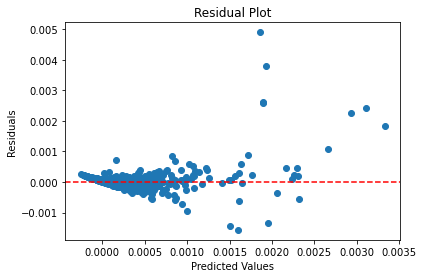

In [13]:
from sklearn.metrics import mean_squared_error, r2_score

residuals = y_test - predictions

r2 = r2_score(y_test, predictions)
print(f'R-squared (R²) on Test Set: {r2}')


plt.scatter(predictions, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [14]:
# Calculate growth rates without randomization
growth_rates = df_cleaned[['GDP_per_capita', 'EMP (THS)', 'GDP (MIO_EUR)', 'POP (THS)', 'nuts3_name', 'year']] \
    .groupby('nuts3_name') \
    .apply(lambda x: x.diff().mean() / x.mean())

# Add randomization factor based on standard deviation
randomization_factors = growth_rates[['GDP_per_capita', 'EMP (THS)', 'GDP (MIO_EUR)', 'POP (THS)', 'year']].std()

# Create a DataFrame of randomization factors based on column names
randomization_factors_df = pd.DataFrame(
    np.random.normal(0, randomization_factors.values, growth_rates.shape),
    index=growth_rates.index,
    columns=growth_rates.columns
)
randomized_growth_rates = growth_rates + randomization_factors_df
randomized_growth_rates

GDP_per_capita  EMP (THS)  GDP (MIO_EUR)  POP (THS)  \
nuts3_name                                                                 
Aargau                     0.036093   0.014258       0.032583   0.011578   
Agrigento                  0.013445  -0.021065       0.011562  -0.005025   
Ain                       -0.002519   0.013758       0.000660   0.007266   
Aisne                      0.014292  -0.016429       0.022037   0.005753   
Albacete                   0.013762  -0.016059       0.011609   0.002015   
...                             ...        ...            ...        ...   
Zug                        0.040645   0.012179       0.048925   0.013262   
Zürich                     0.028703   0.015818       0.057454   0.010368   
Ávila                     -0.018541  -0.010798      -0.004776  -0.004031   
Örebro County             -0.003204   0.016312       0.042278   0.010032   
Östergötland County       -0.004883   0.018427       0.005038   0.006425   

                         year  
nuts3_name                     
Aargau               0.000491  
Agrigento            0.000534  
Ain                  0.000455  
Aisne                0.000504  
Albacete             0.000517  
...                       ...  
Zug                  0.000503  
Zürich               0.000495  
Ávila                0.000457  
Örebro County        0.000504  
Östergötland County  0.000493  

[302 rows x 5 columns]

   GDP_per_capita    EMP (THS)  GDP (MIO_EUR)    POP (THS) nuts3_name  year  \
0       53.993829  2005.715164  172200.132139  3246.307374      Milan  2021   
1       55.046708  2025.422073  172091.432937  3239.130649      Milan  2022   
2       56.120118  2045.322609  171982.802350  3231.969789      Milan  2023   

   Predicted_Programming_Density  
0                       0.001014  
1                       0.000972  
2                       0.000930  


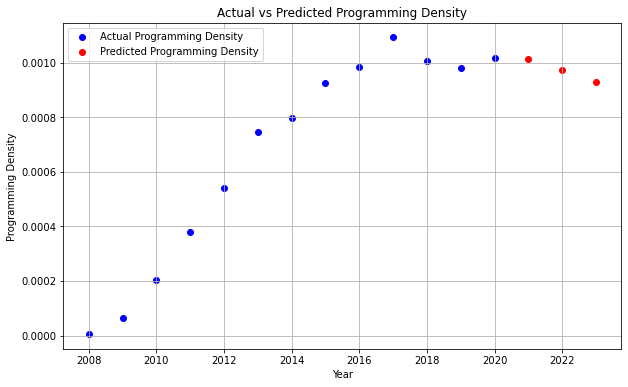

In [15]:
# Group by 'NUTS3' and calculate the mean growth rate for each variable
milan = df_cleaned[df_cleaned["nuts3_name"] == "Milan"]

#Create an empty dataframe
new_data = pd.DataFrame({
    'GDP_per_capita': [np.nan] * 3,
    'EMP (THS)': [np.nan] * 3,
    'GDP (MIO_EUR)': [np.nan] * 3,
    'POP (THS)': [np.nan] * 3,
    'nuts3_name': ['Milan'] * 3,
    'year': [2021, 2022, 2023]
})

for variable in ['GDP_per_capita', 'EMP (THS)','GDP (MIO_EUR)','POP (THS)']:
    current_value = milan[variable].iloc[-1]  
    for i, row in new_data.iterrows():
        if np.isnan(row[variable]):
            current_value *= (1 + randomized_growth_rates.loc[row['nuts3_name'], variable])
            new_data.at[i, variable] = current_value

# Sort the DataFrame by year and region
new_data = new_data.sort_values(by=['year', 'nuts3_name']).reset_index(drop=True)

# Separate features and target variable
features = ['GDP_per_capita', 'EMP (THS)','GDP (MIO_EUR)','POP (THS)', 'nuts3_name', 'year']
target = 'Programming_Density'

# Create a transformer that does not need to be fit separately
transformer = ColumnTransformer(
    transformers=[
        ('num', make_pipeline(StandardScaler()), ['GDP_per_capita', 'EMP (THS)','GDP (MIO_EUR)','POP (THS)']),
        ('cat', make_pipeline(OneHotEncoder(sparse=False, handle_unknown='ignore')), ['nuts3_name', 'year'])
    ],
    remainder='passthrough'
)

X_train, y_train = transformer.fit_transform(milan[features]), milan[target]

# Create a linear regression model
ridge_model = Ridge(alpha=1.0)

# Fit the model to the data
ridge_model.fit(X_train, y_train)

# Use the model to make predictions for the new data
new_data_encoded_scaled = transformer.transform(new_data[features])
new_predictions = ridge_model.predict(new_data_encoded_scaled)
new_data['Predicted_Programming_Density'] = new_predictions
print(new_data)

milan_old = df_cleaned[df_cleaned["nuts3_name"] == "Milan"]

# Plotting
plt.figure(figsize=(10, 6))

# Plot the actual programming density from the training data
plt.scatter(milan_old['year'], milan_old['Programming_Density'], label='Actual Programming Density', color='blue')

# Plot the predicted programming density for the next three years
plt.scatter(new_data['year'], new_data['Predicted_Programming_Density'], label='Predicted Programming Density', color='red')

# Customize the plot
plt.title('Actual vs Predicted Programming Density')
plt.xlabel('Year')
plt.ylabel('Programming Density')
plt.legend()
plt.grid(True)
plt.show()

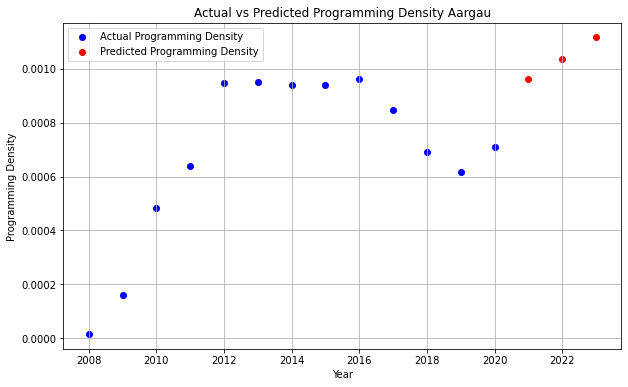

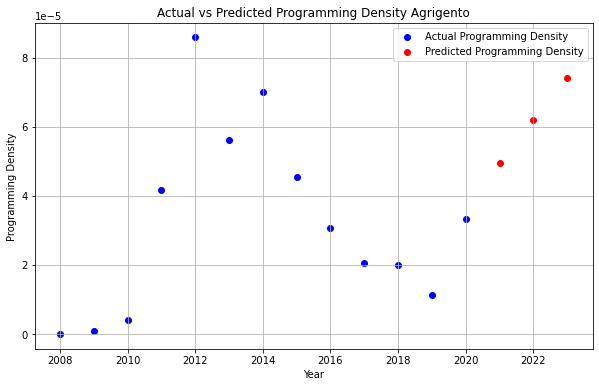

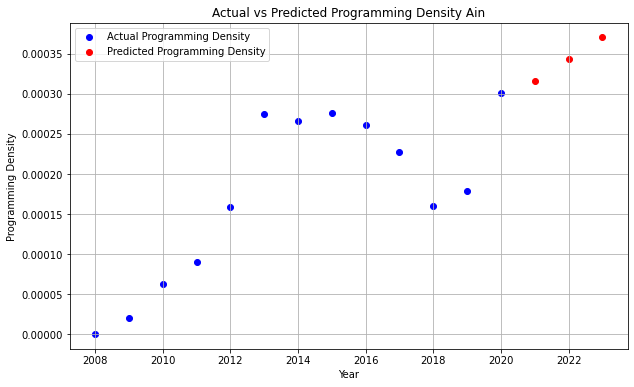

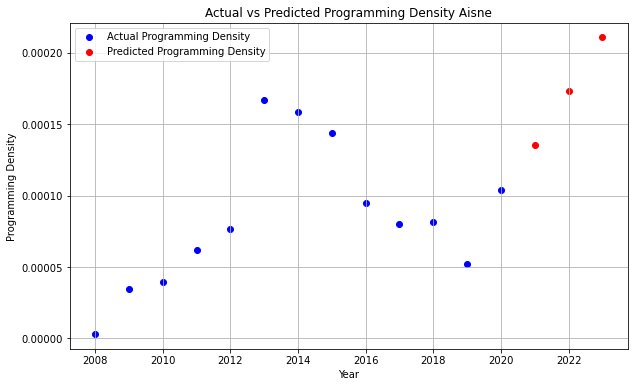

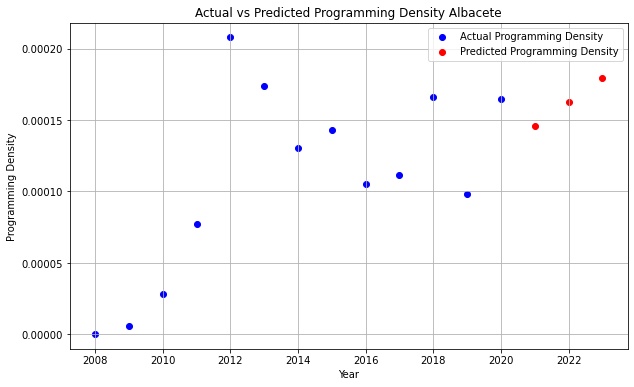

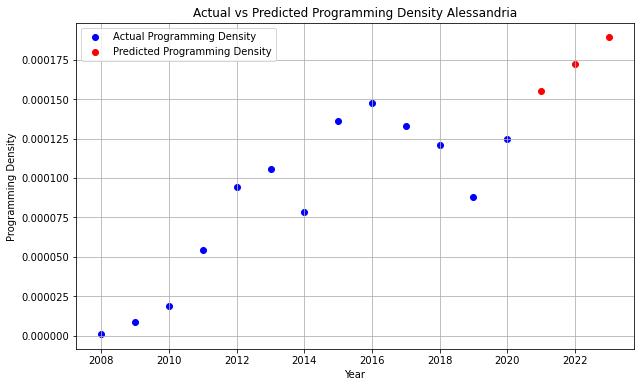

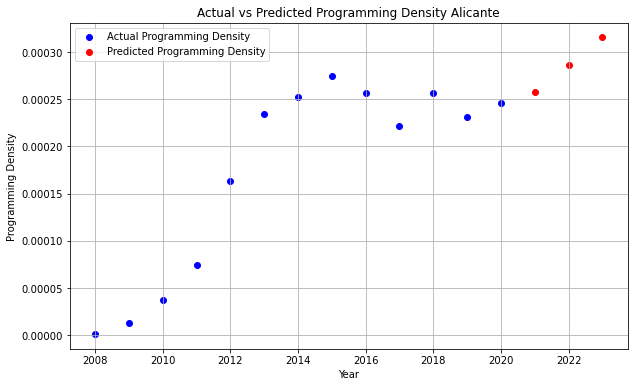

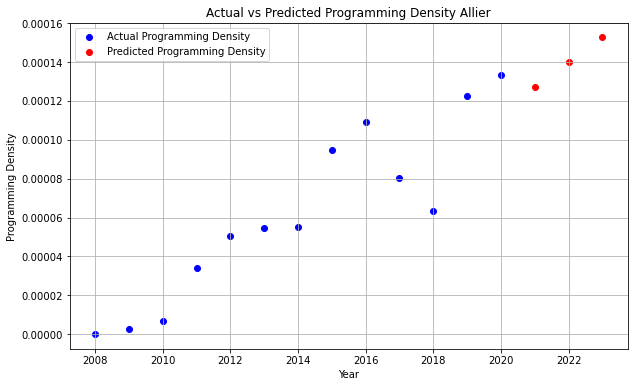

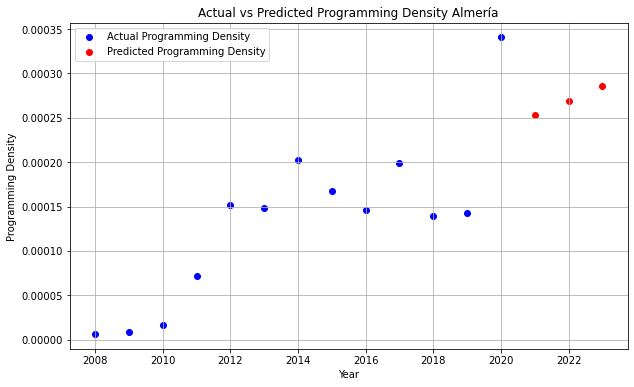

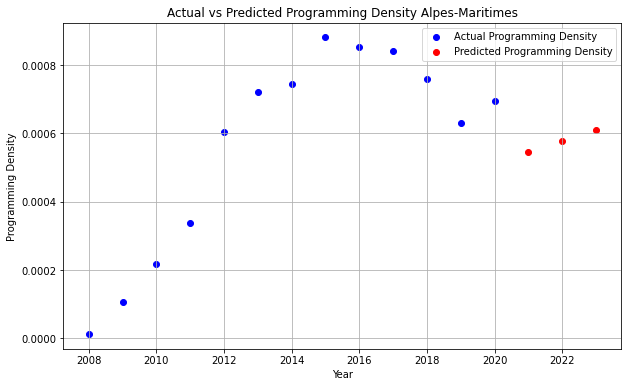

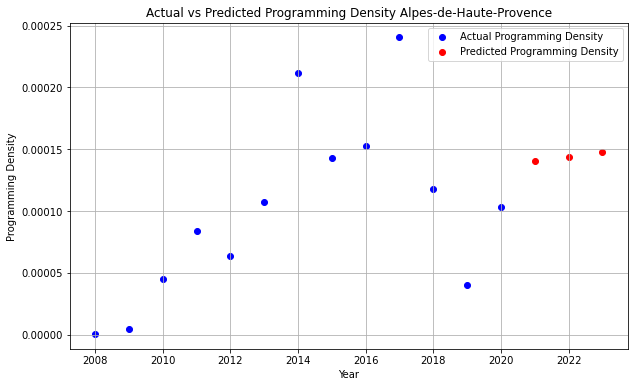

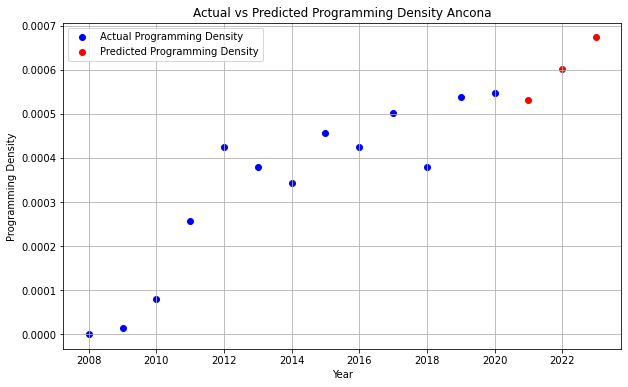

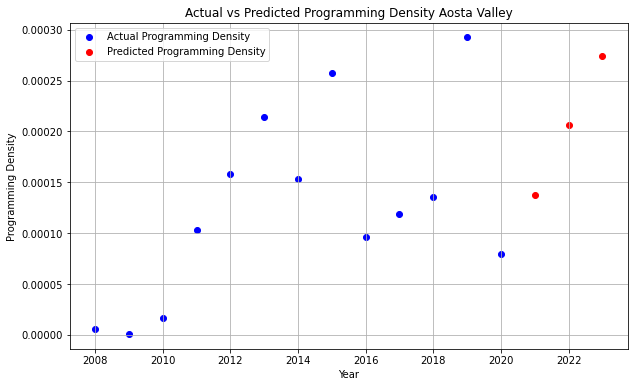

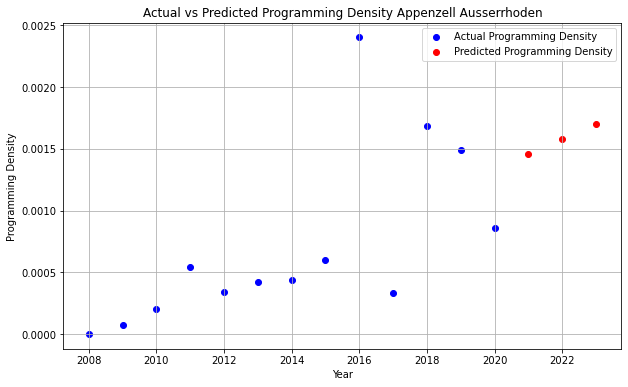

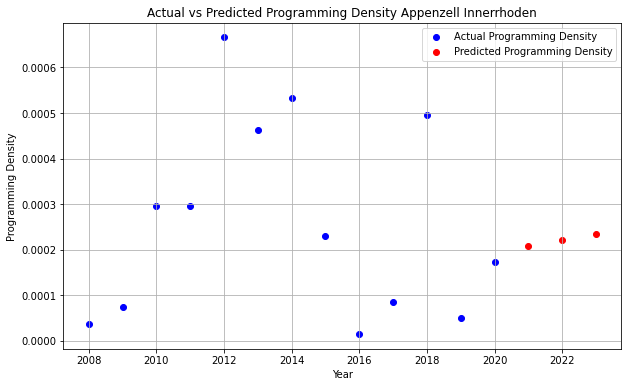

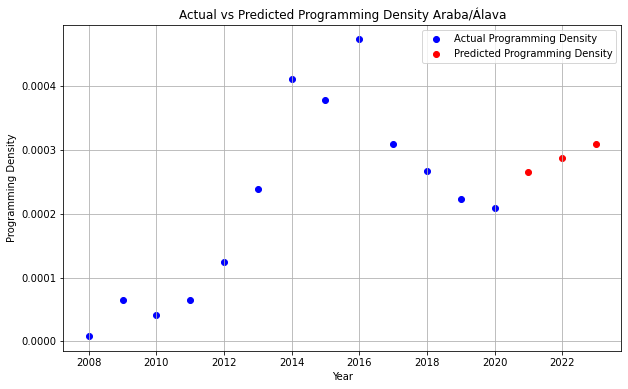

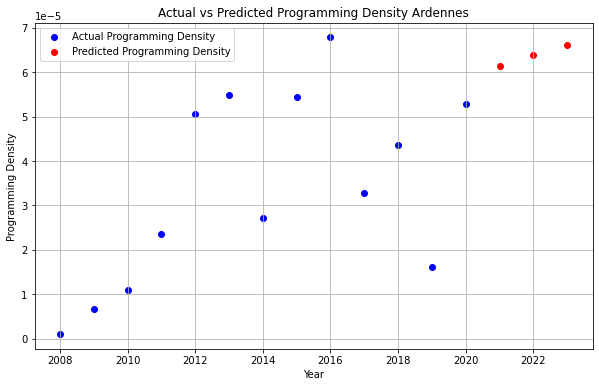

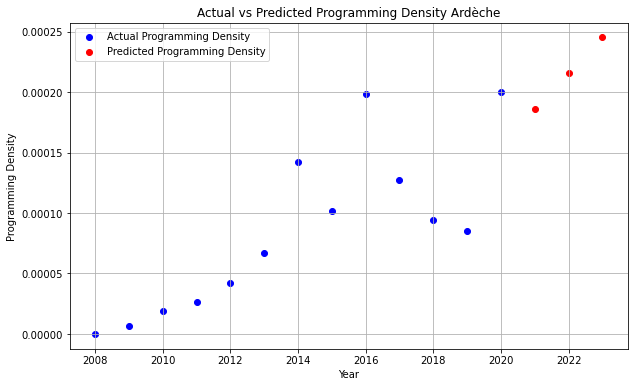

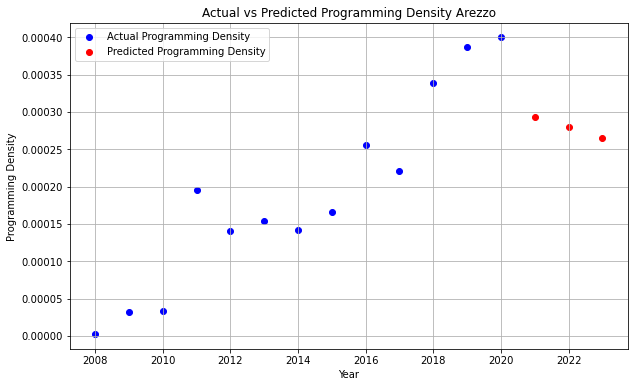

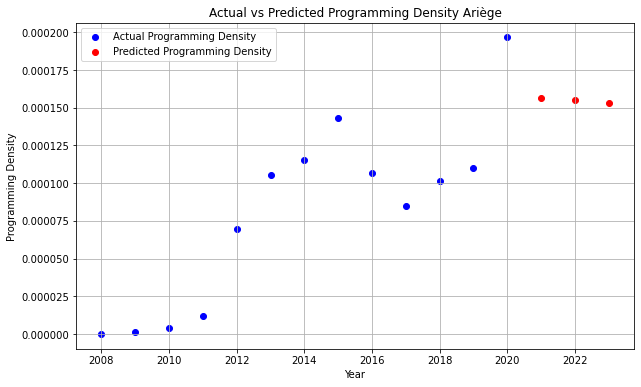

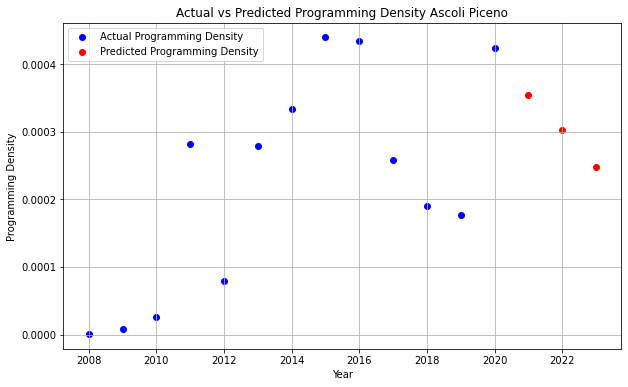

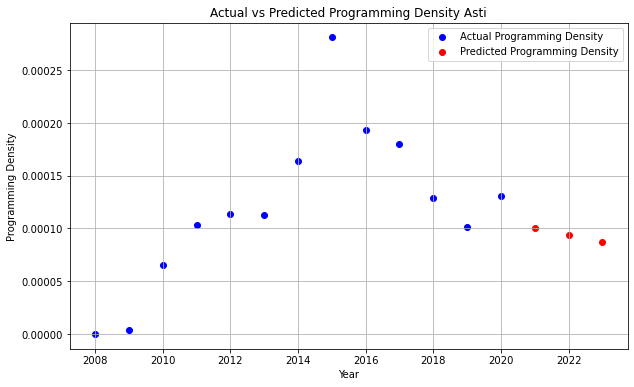

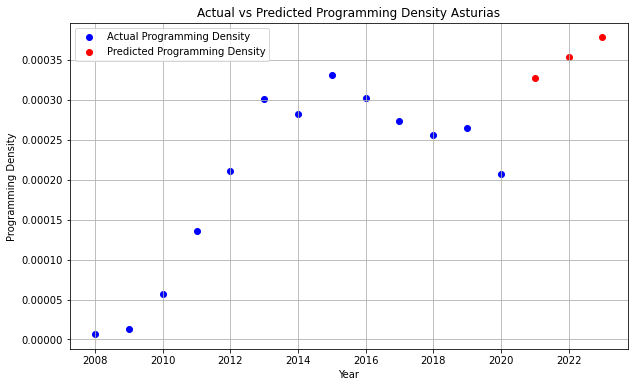

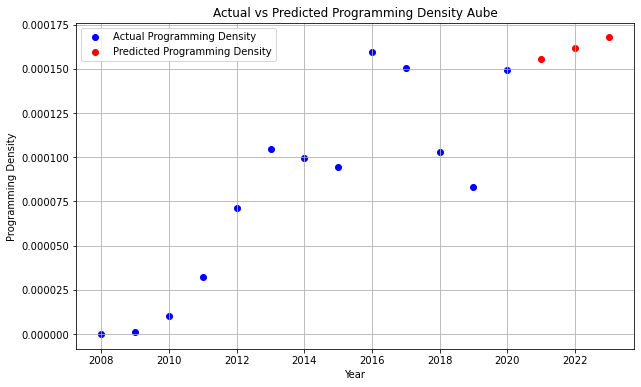

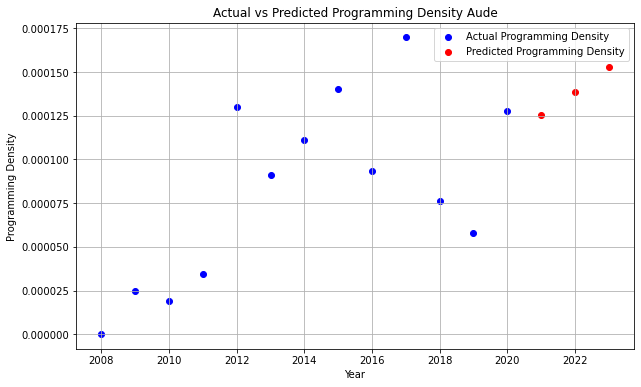

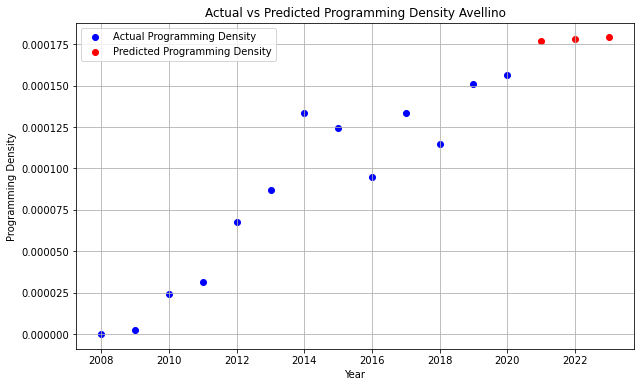

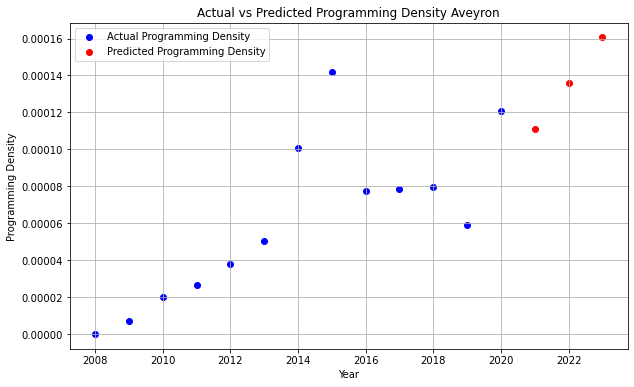

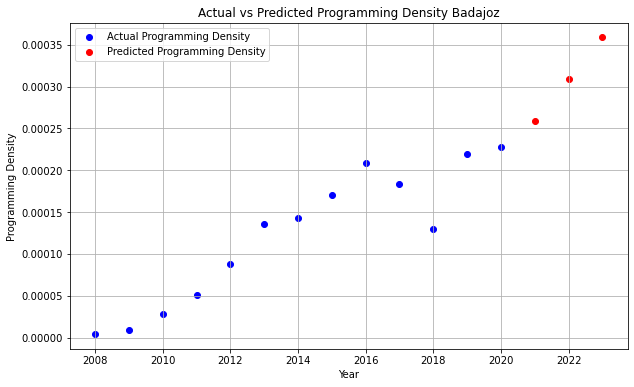

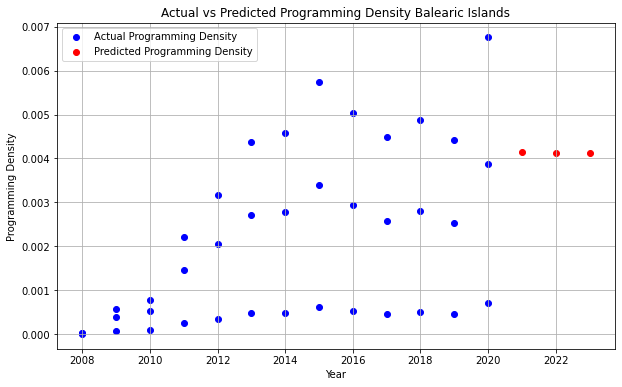

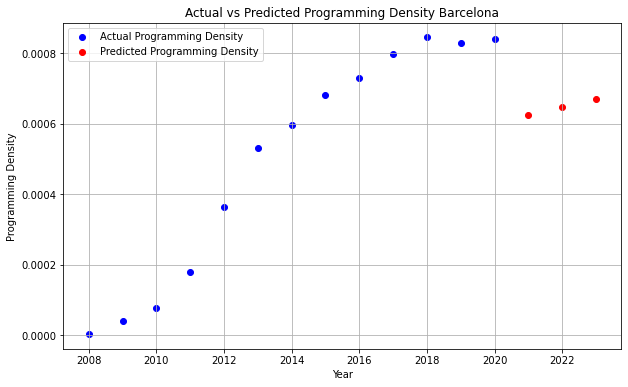

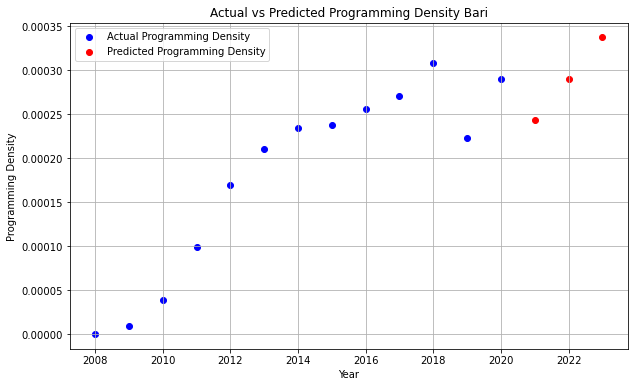

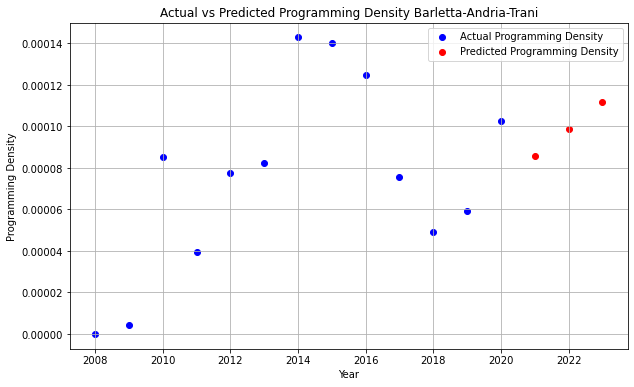

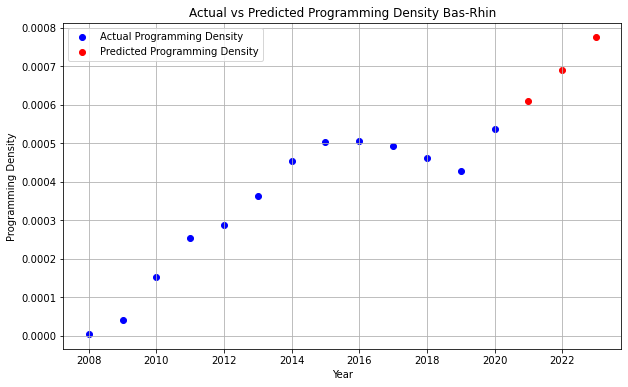

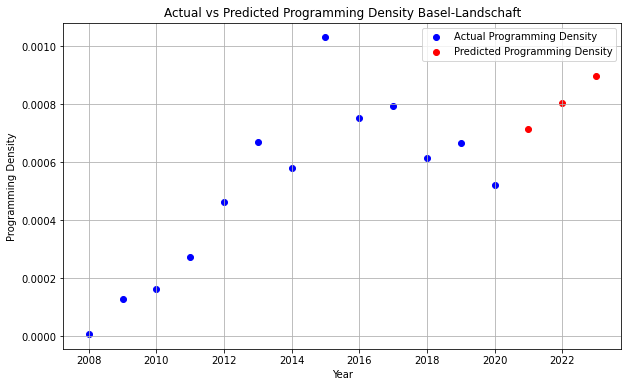

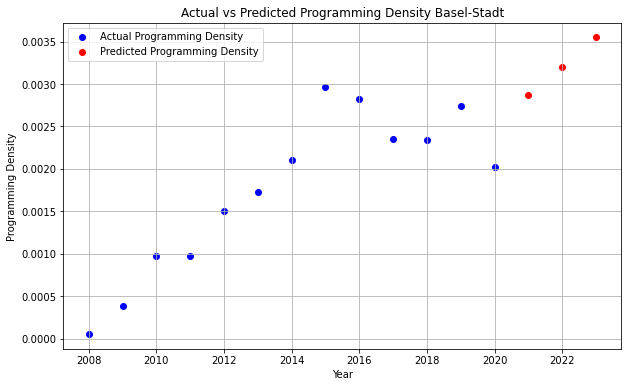

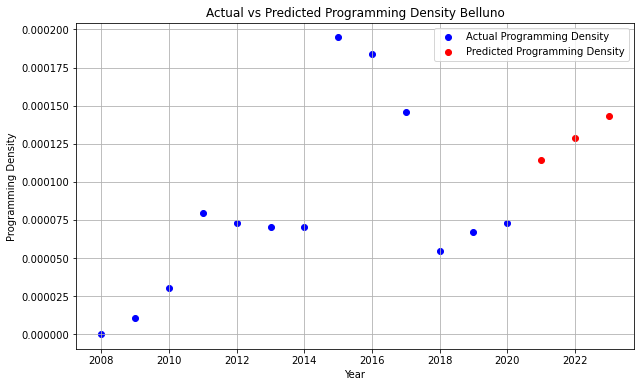

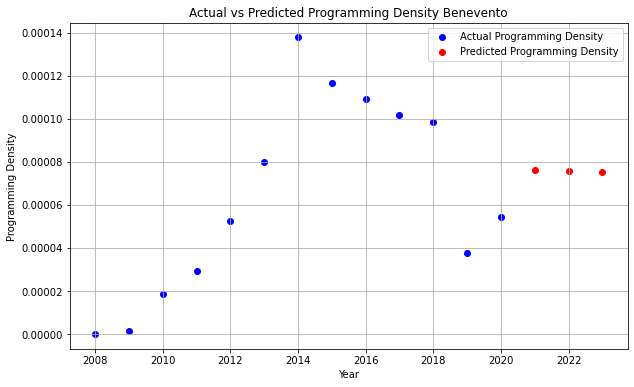

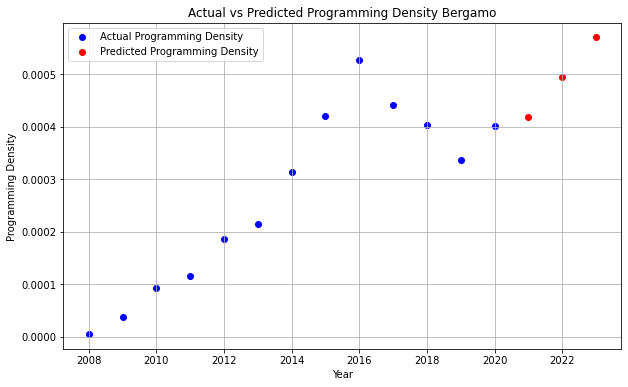

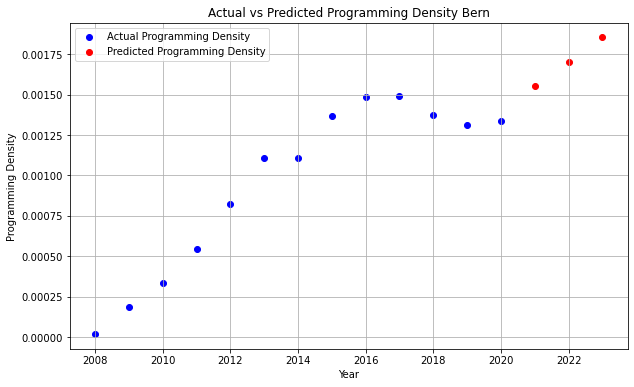

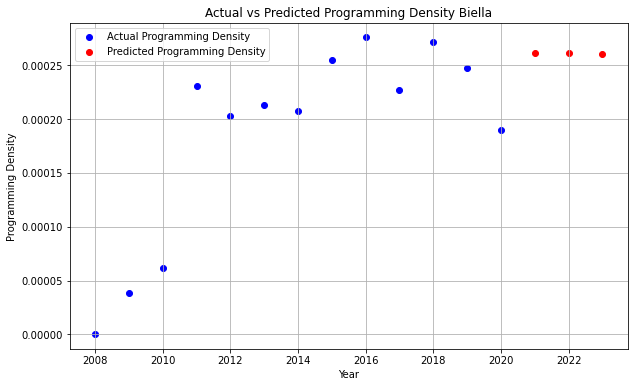

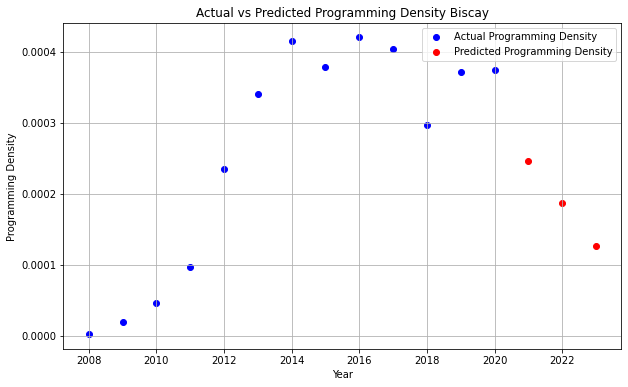

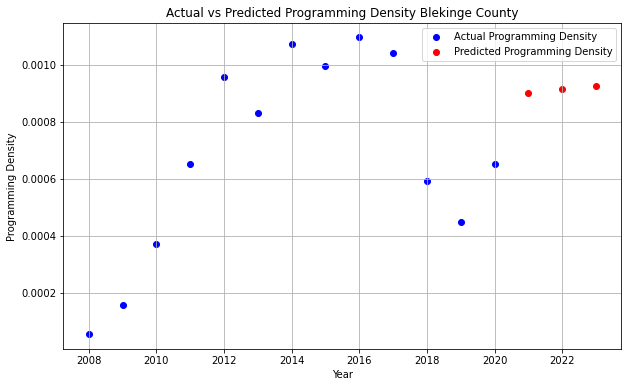

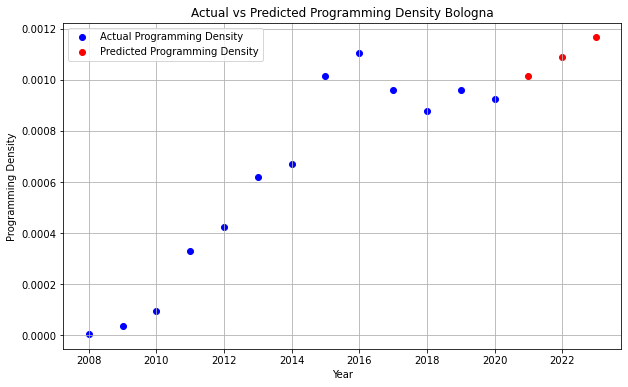

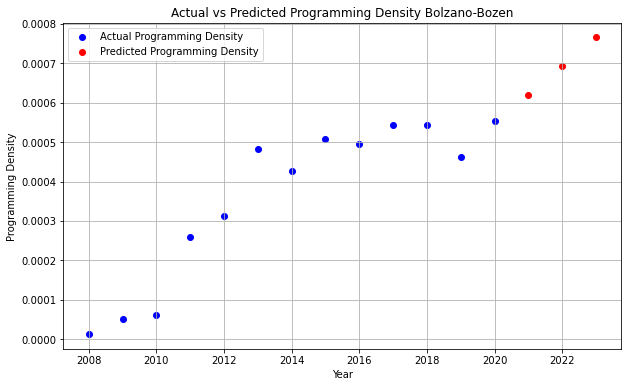

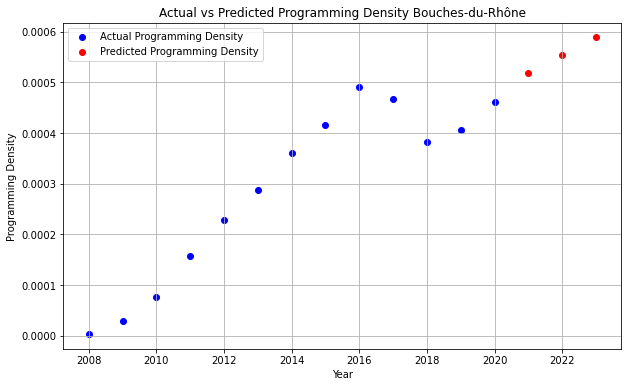

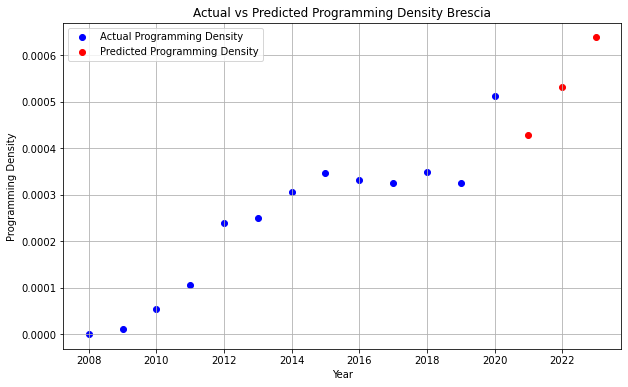

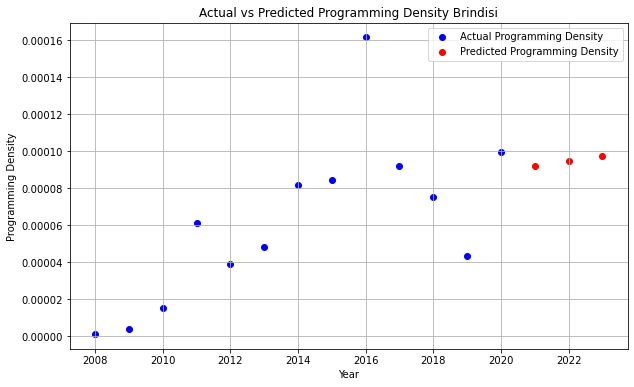

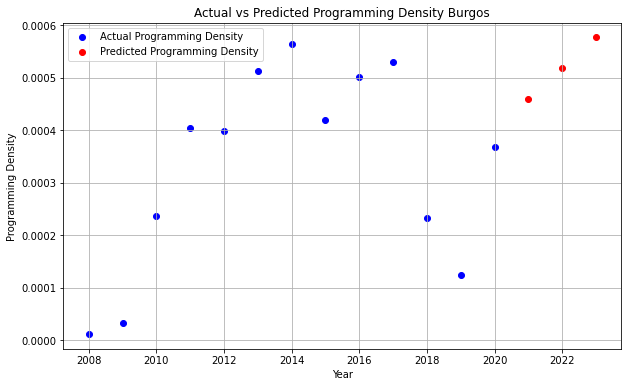

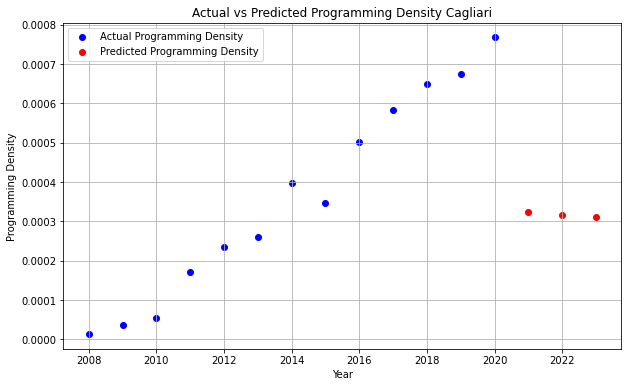

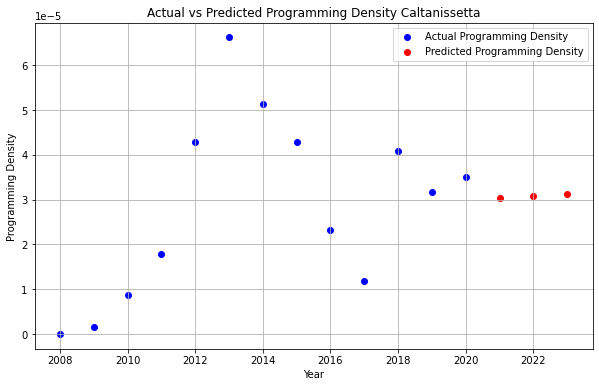

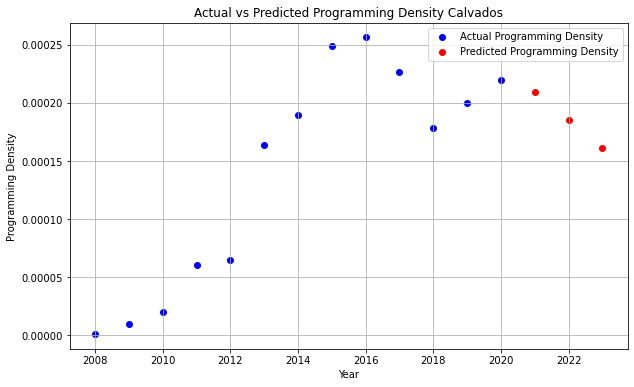

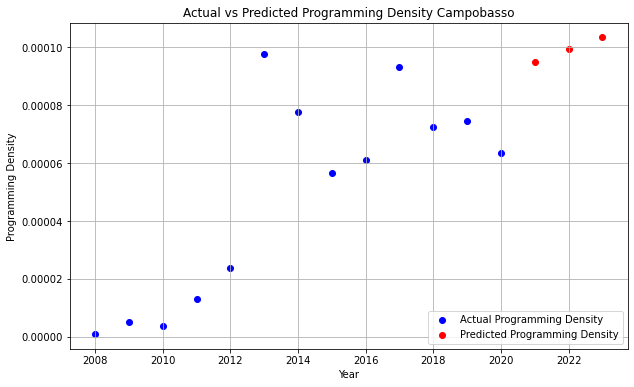

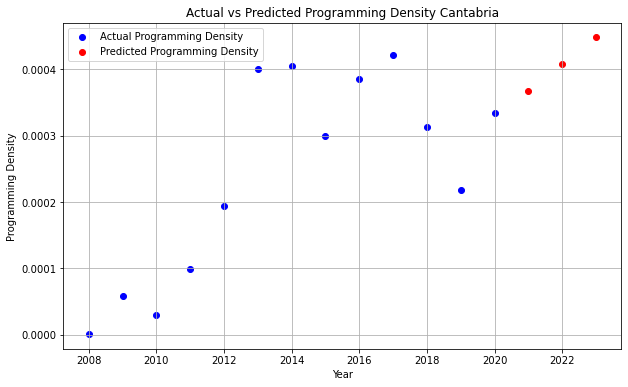

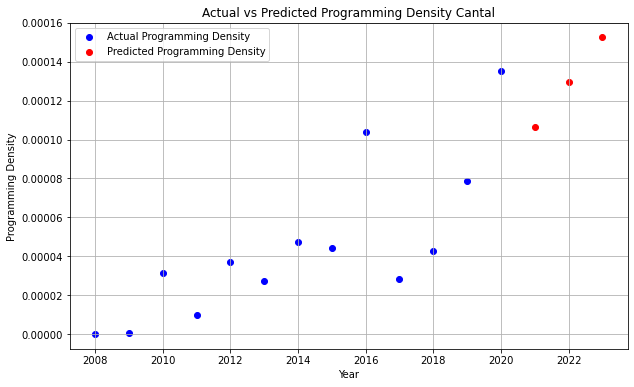

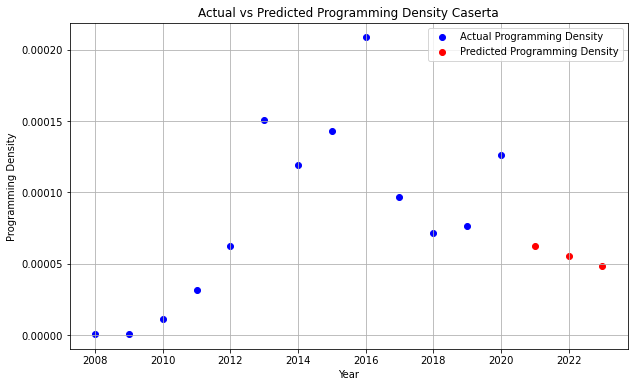

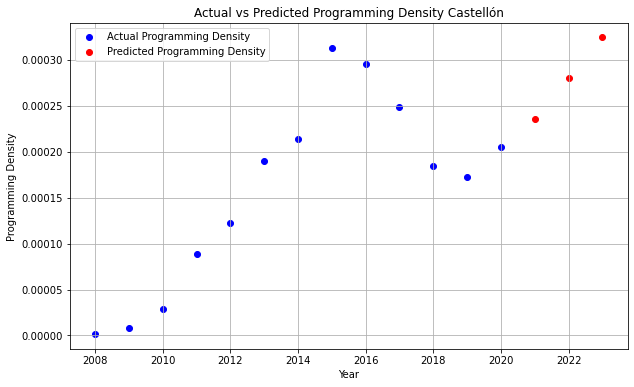

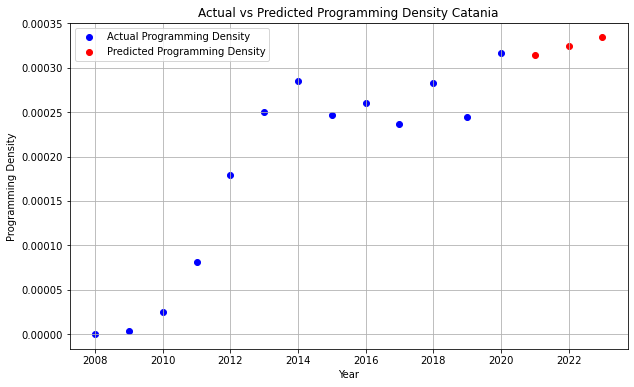

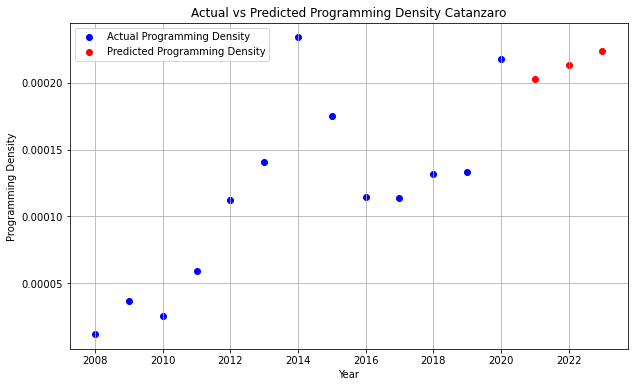

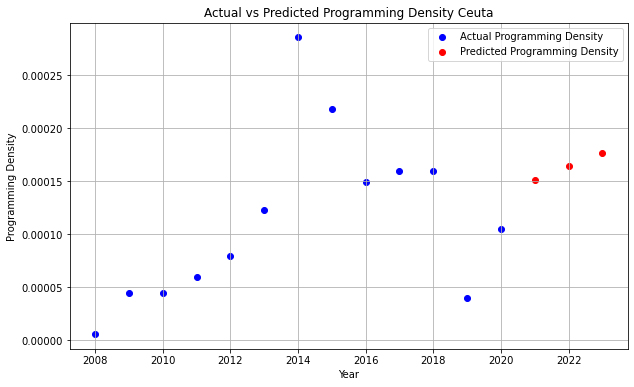

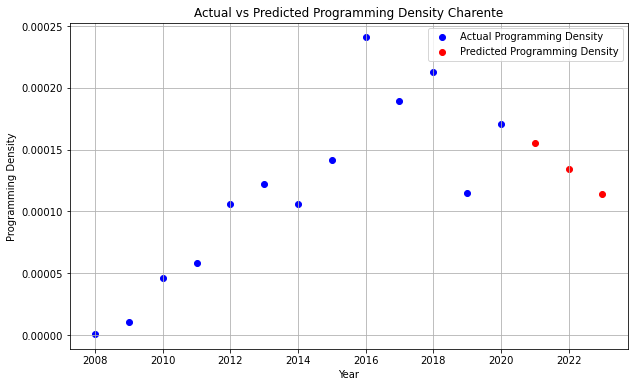

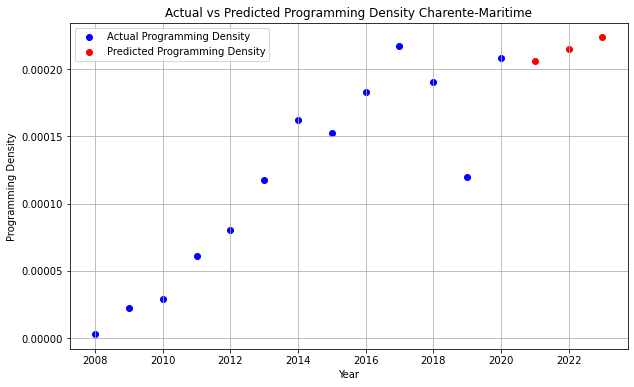

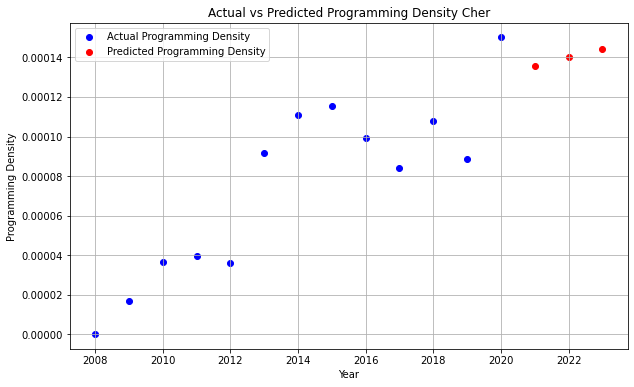

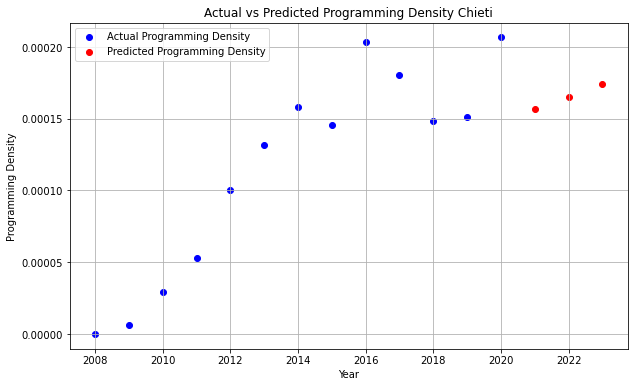

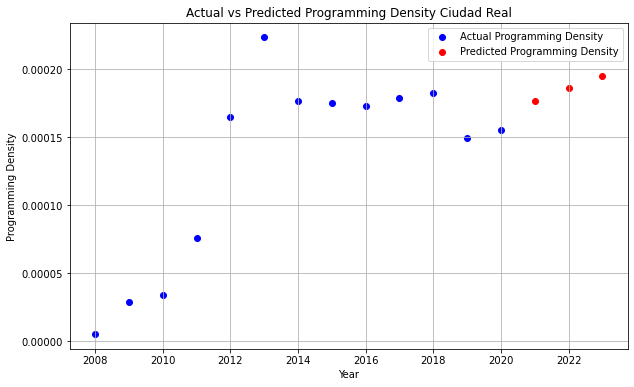

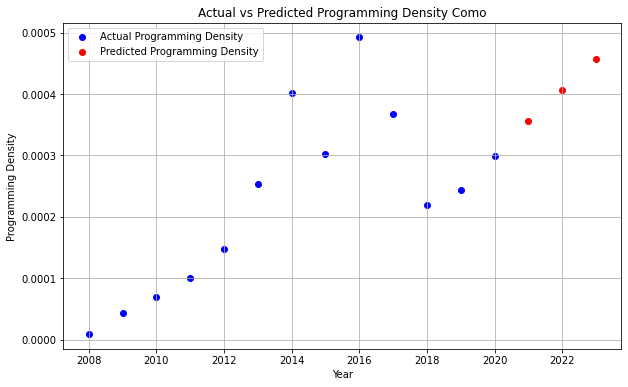

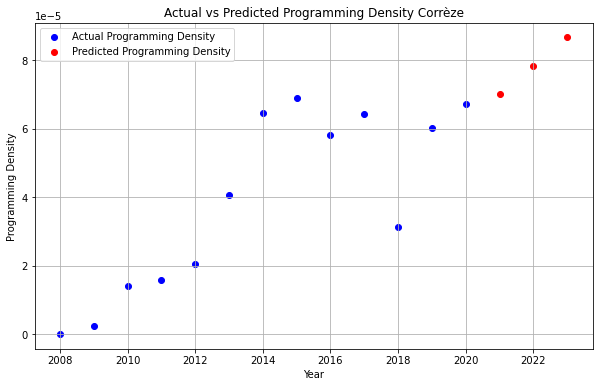

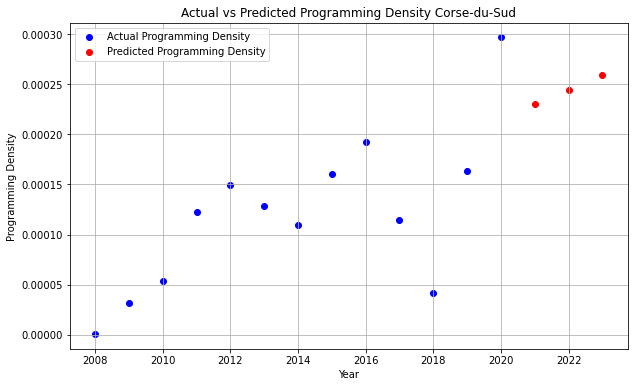

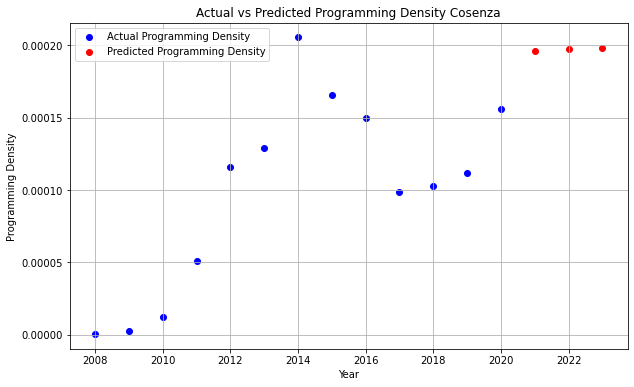

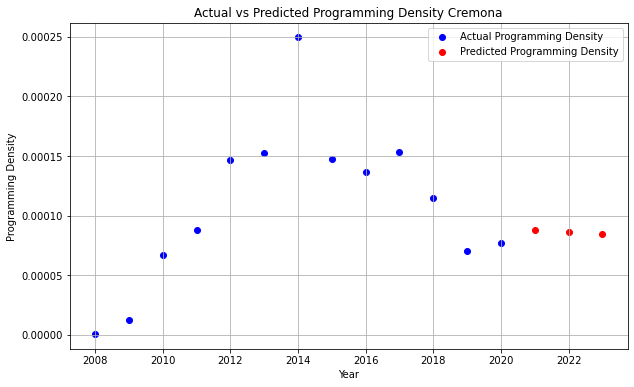

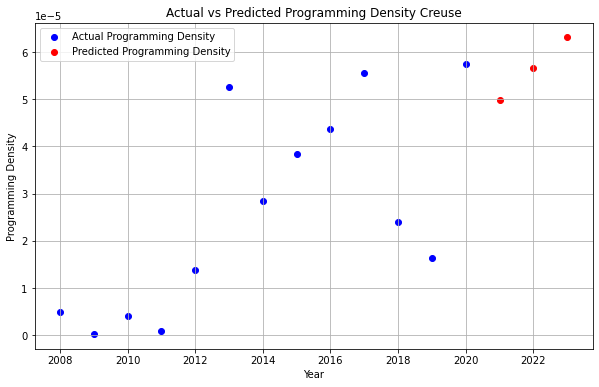

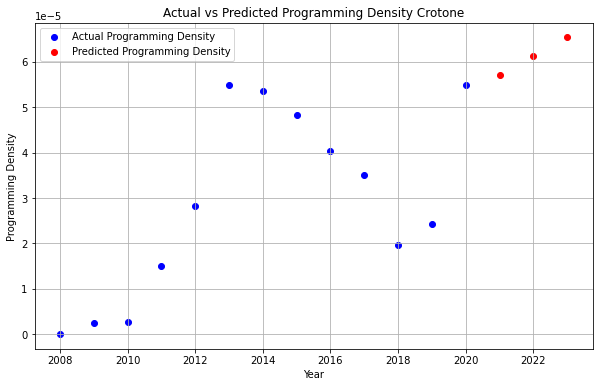

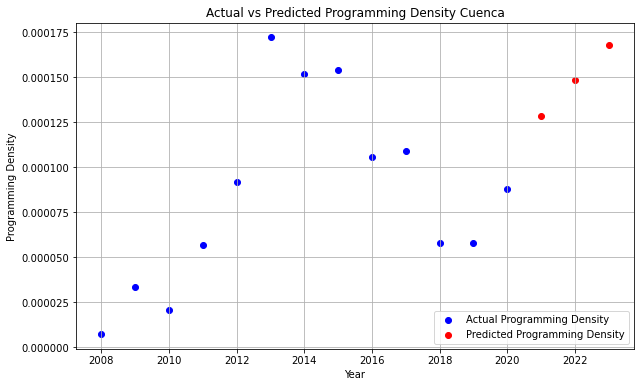

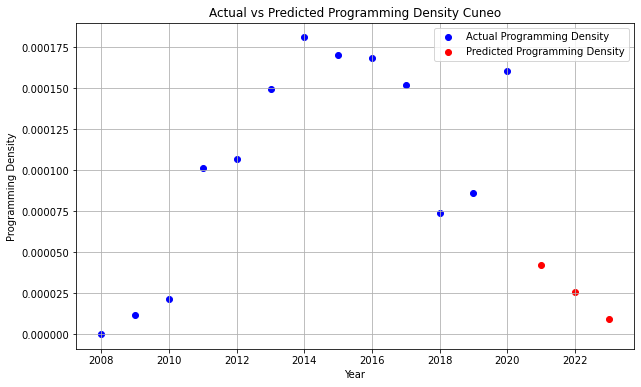

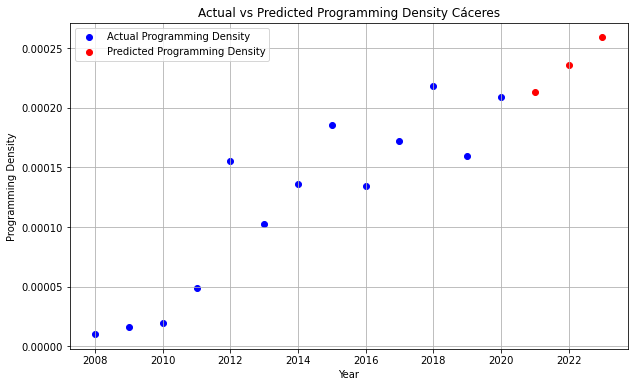

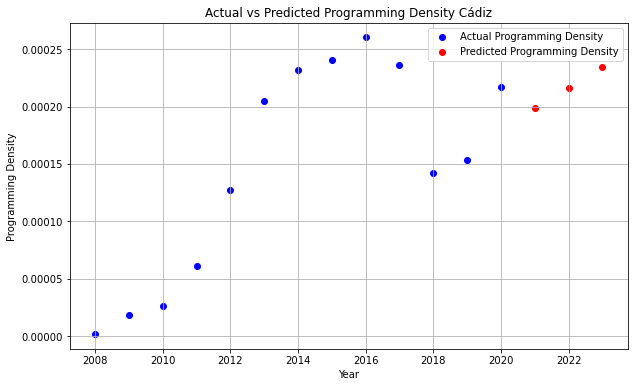

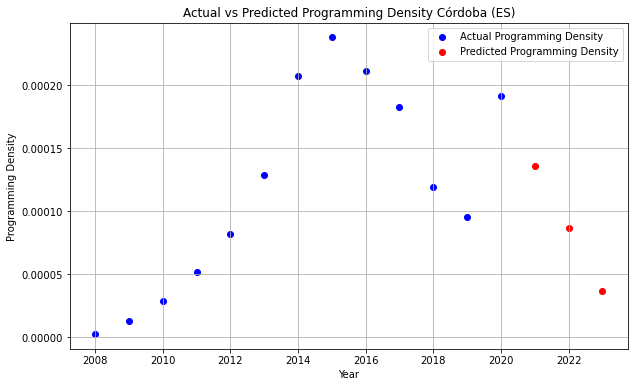

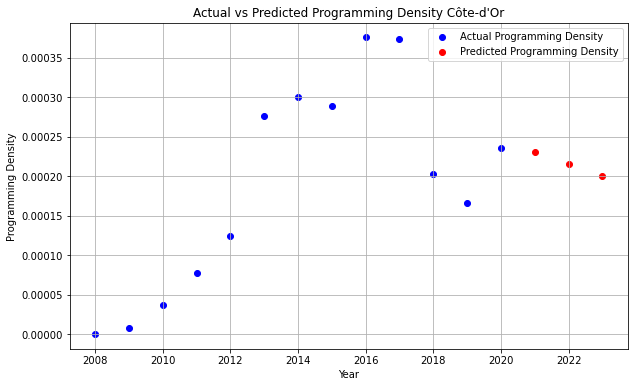

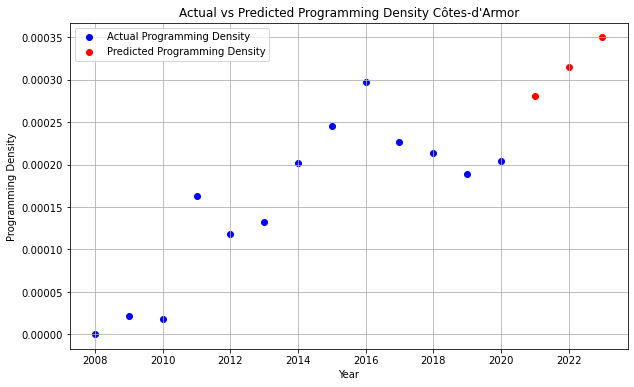

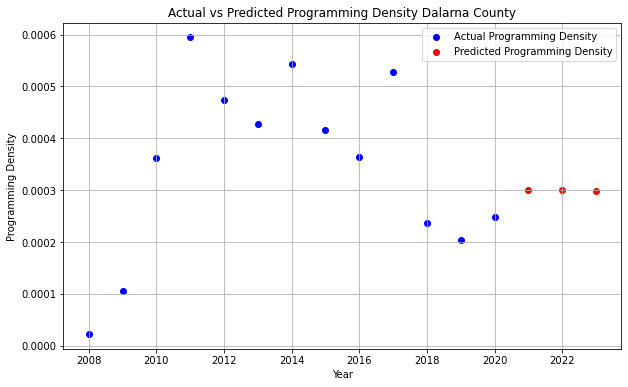

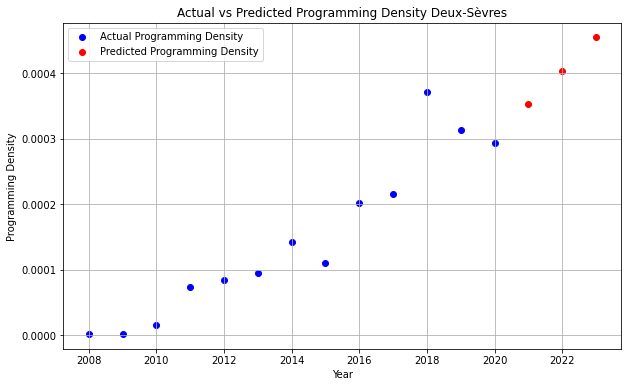

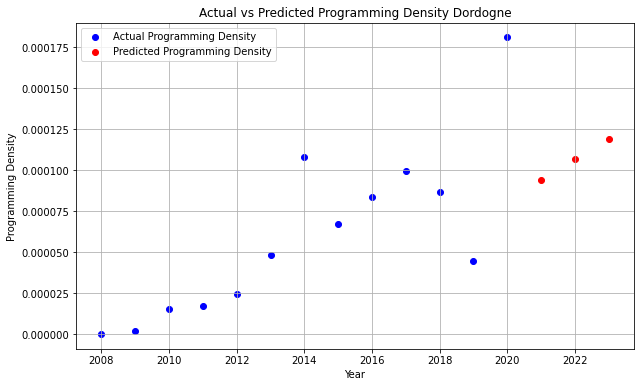

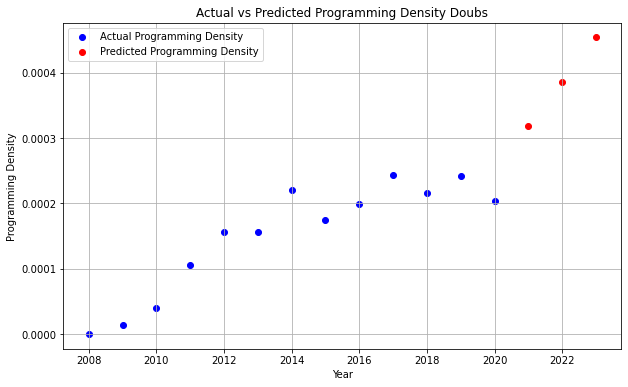

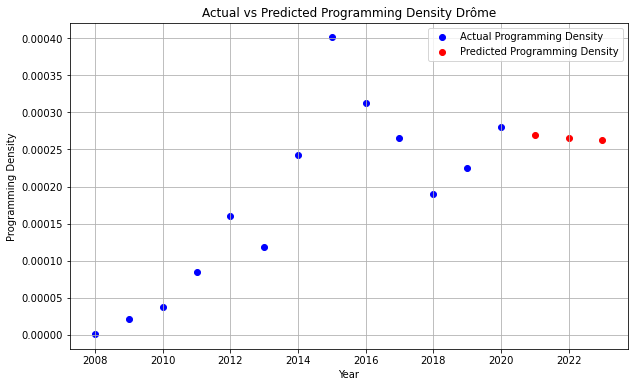

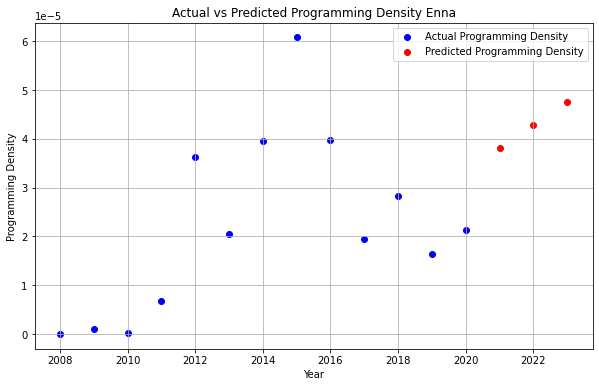

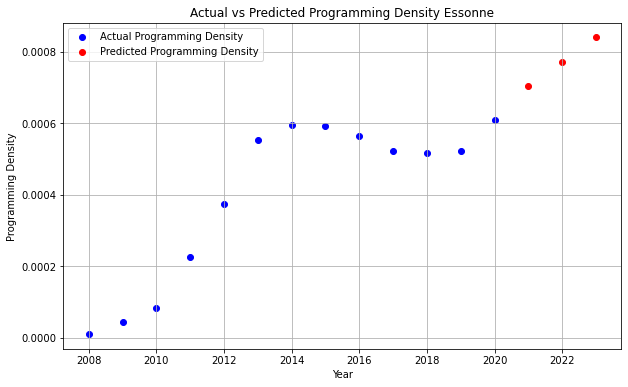

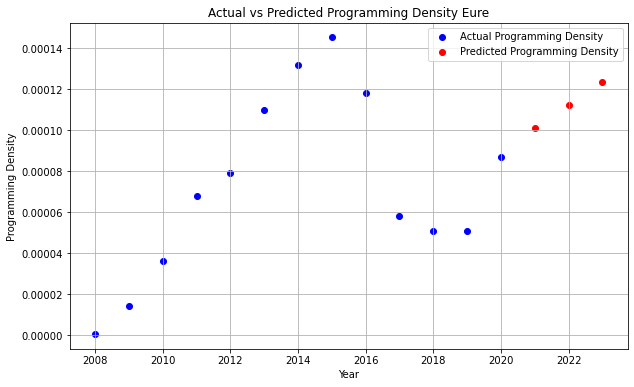

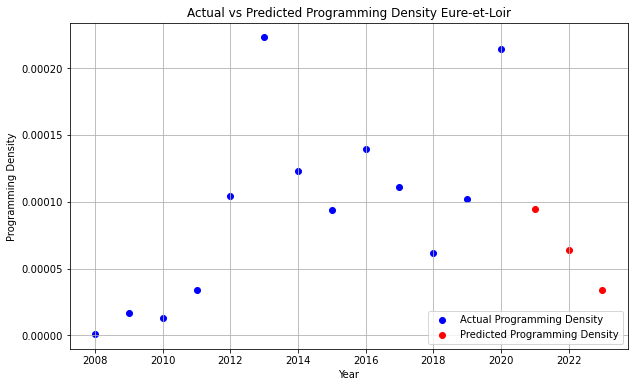

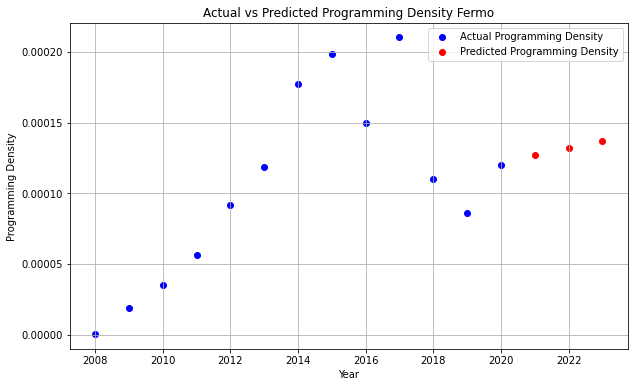

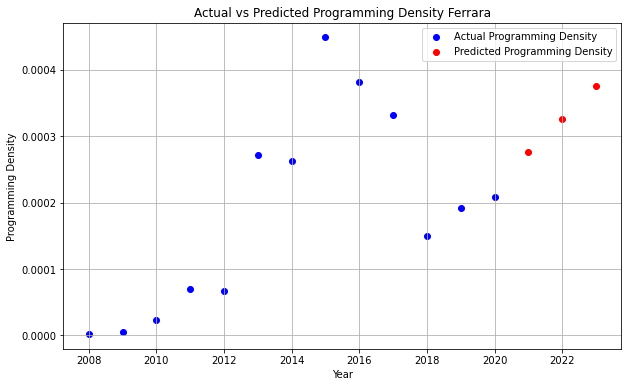

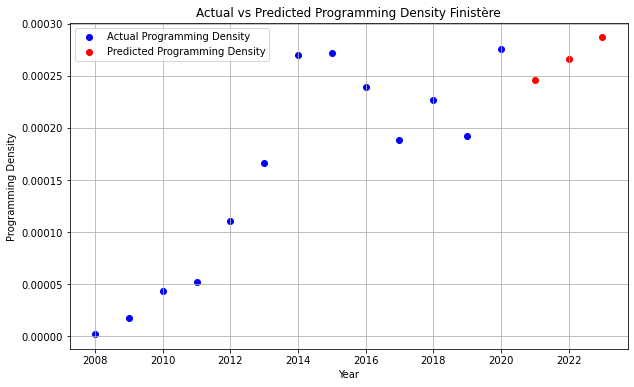

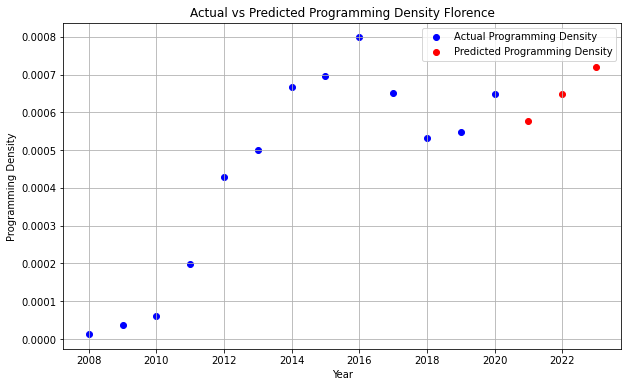

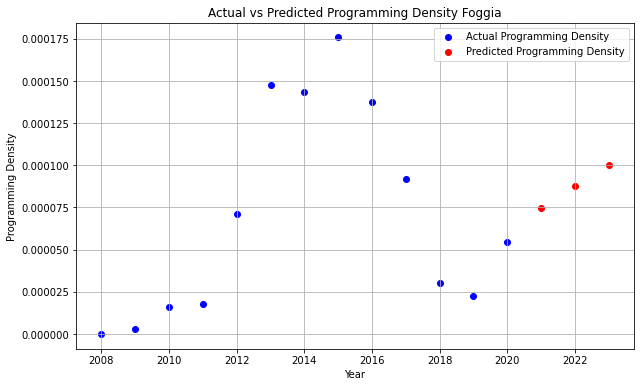

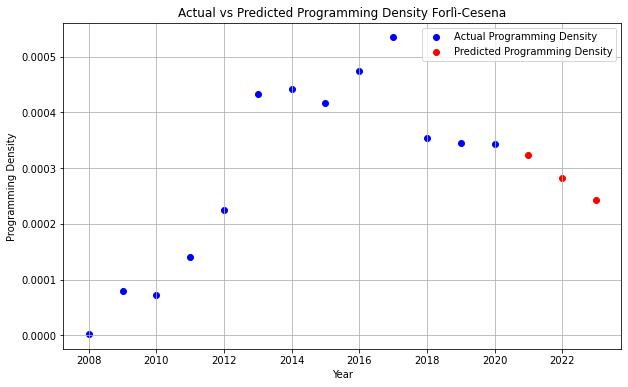

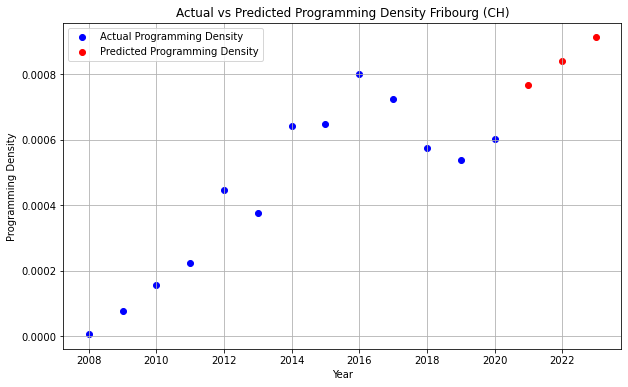

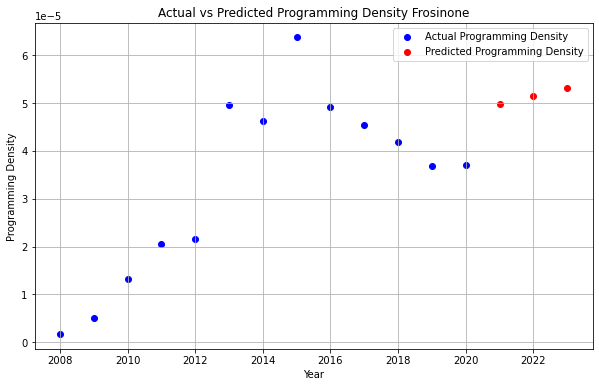

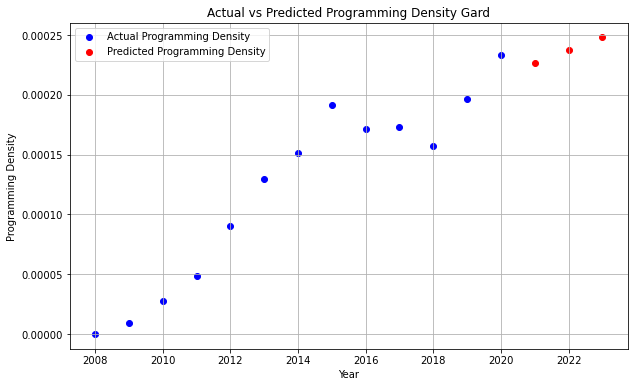

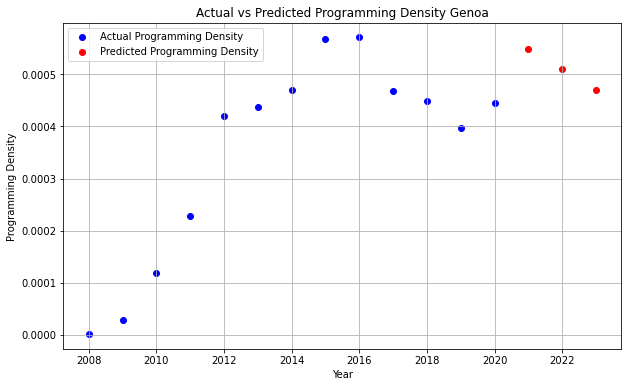

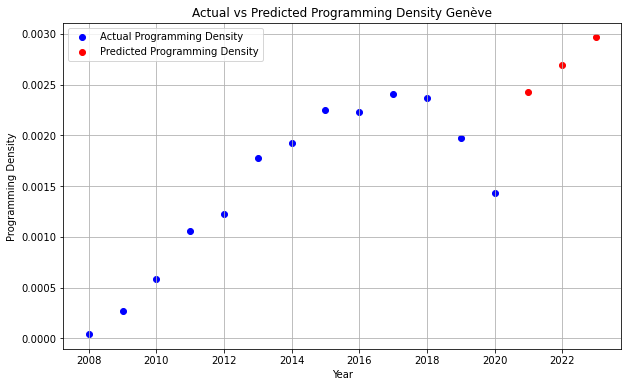

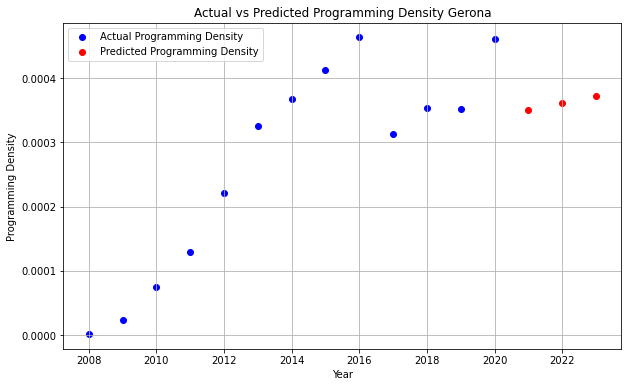

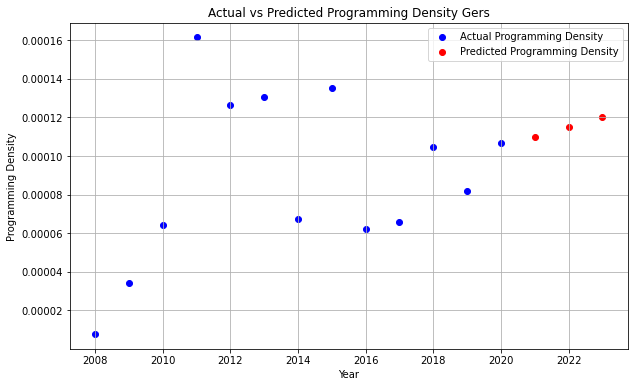

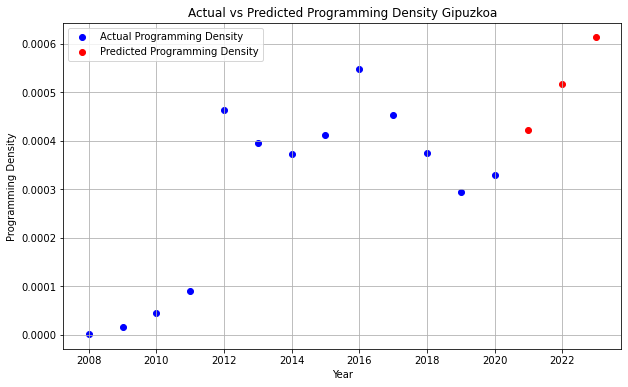

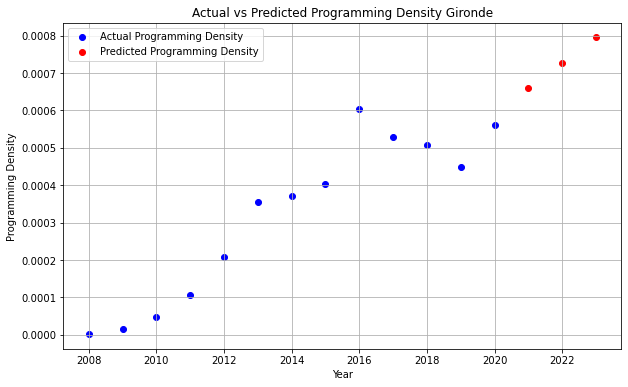

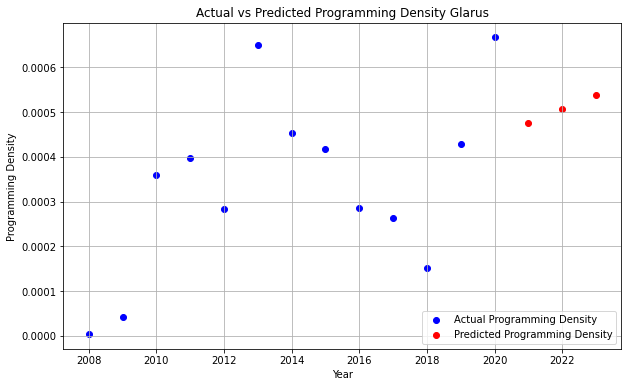

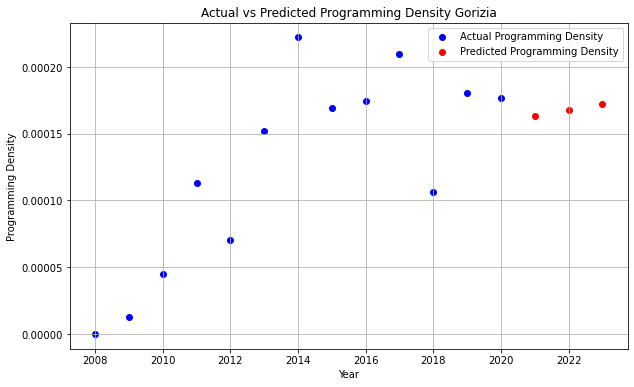

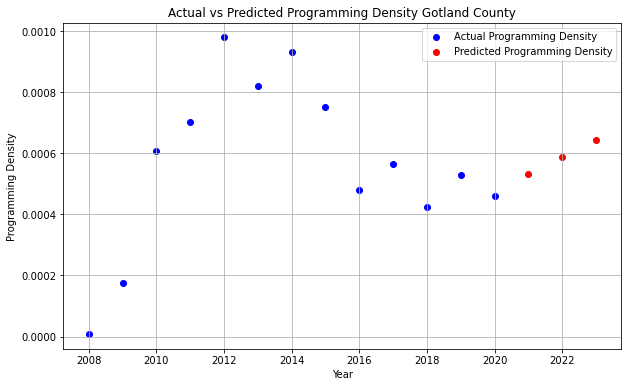

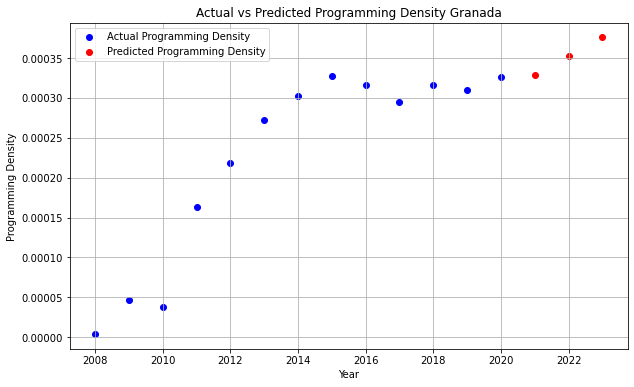

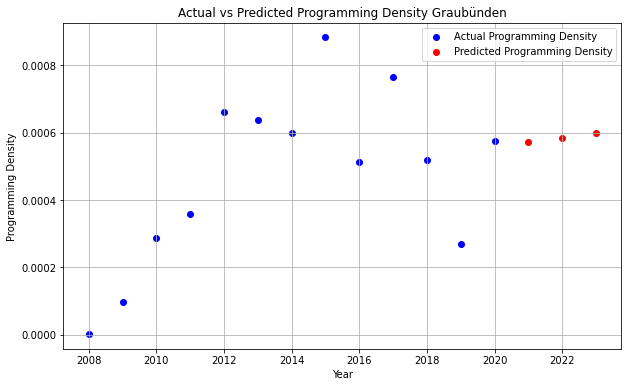

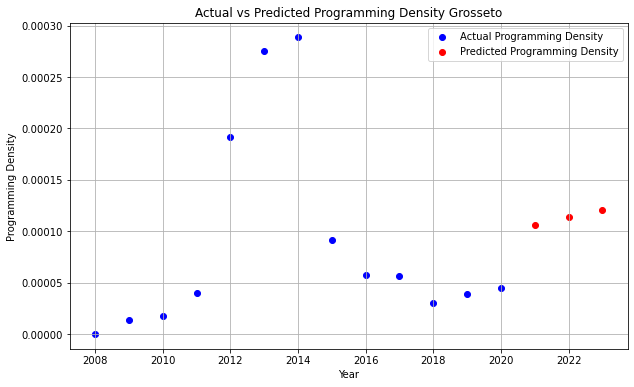

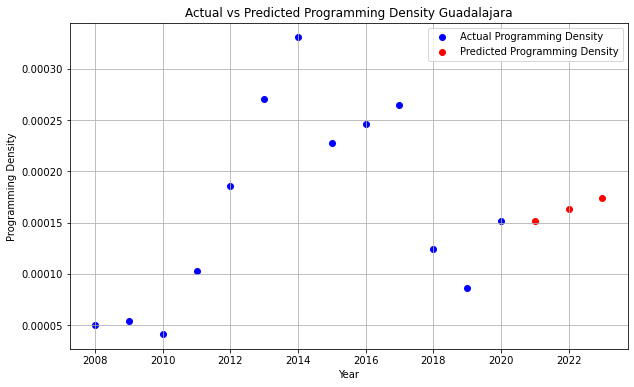

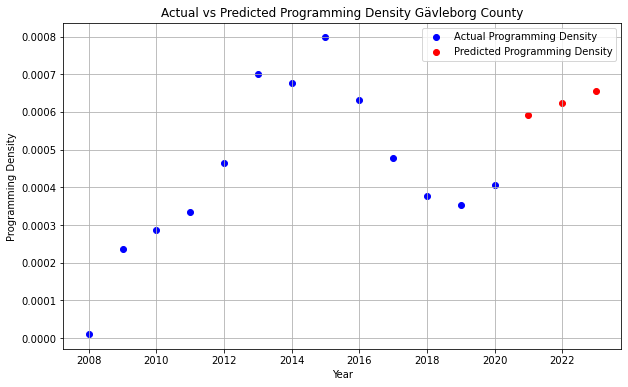

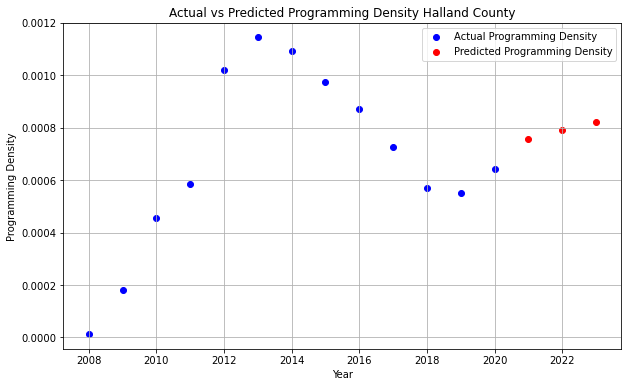

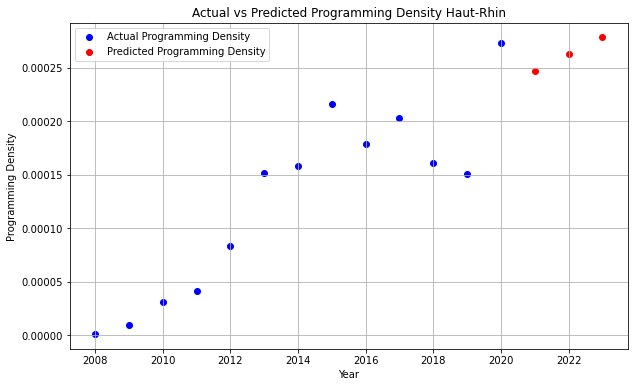

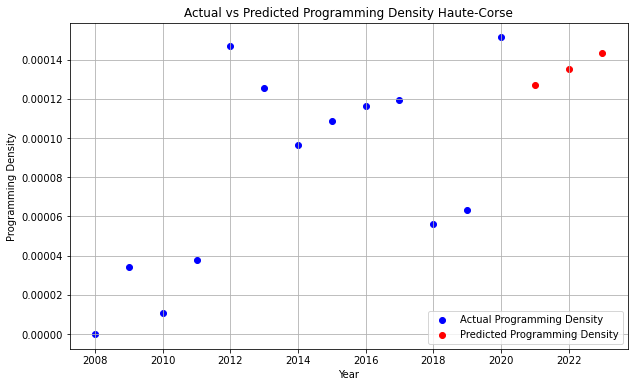

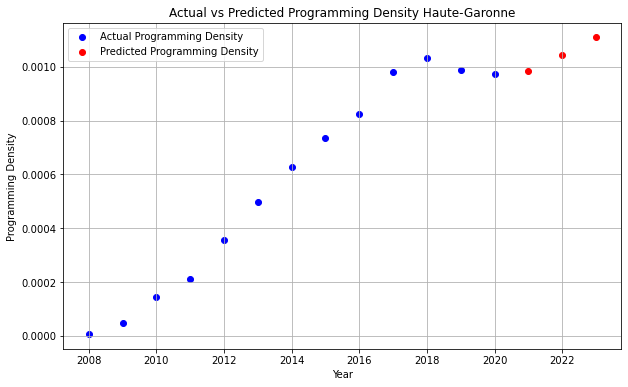

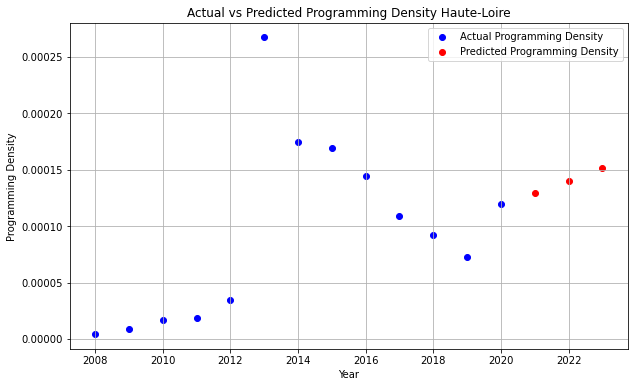

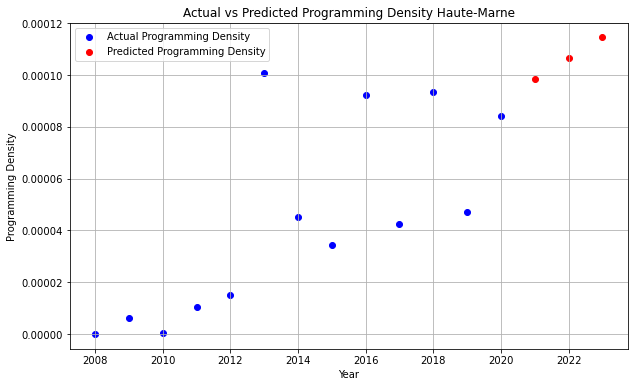

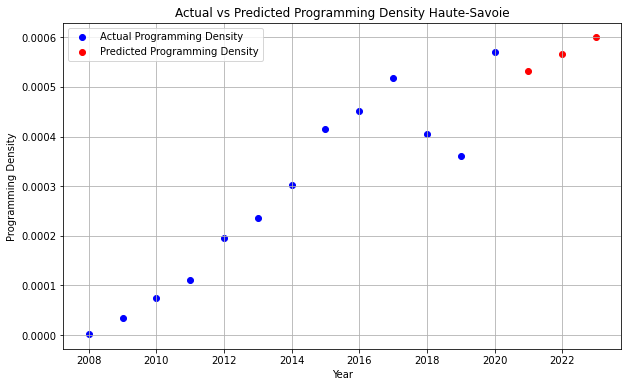

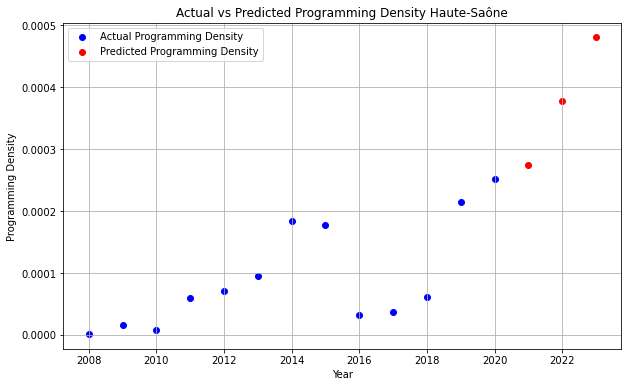

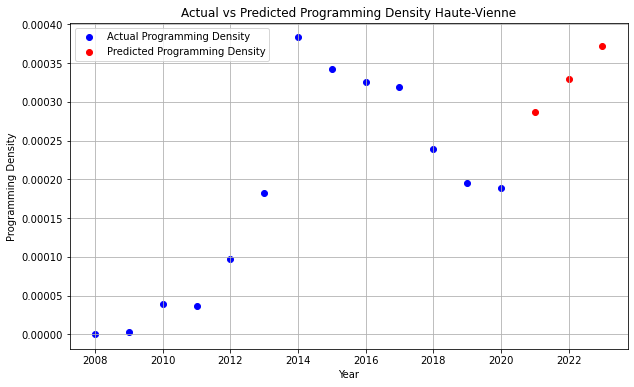

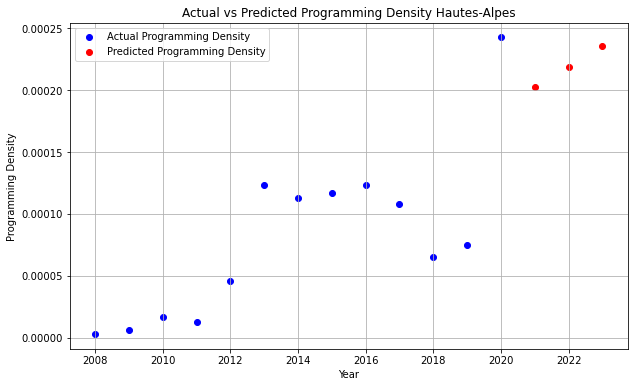

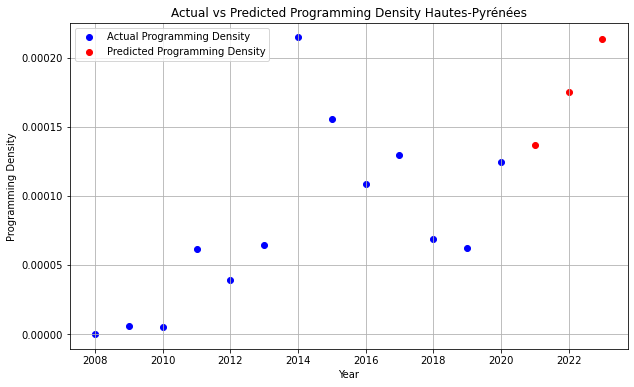

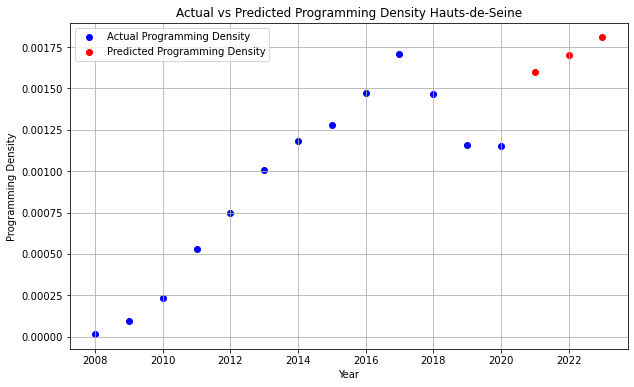

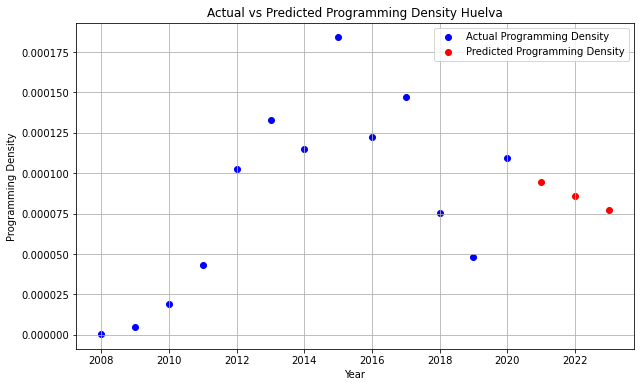

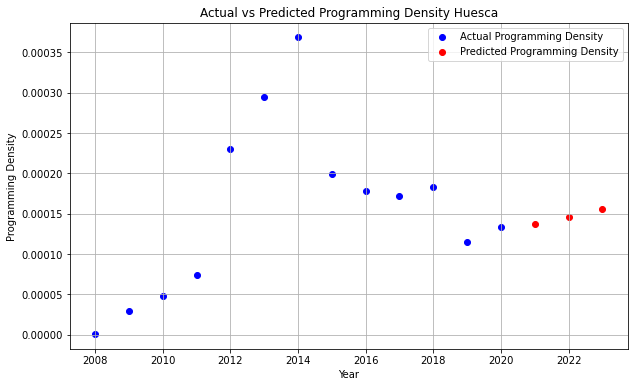

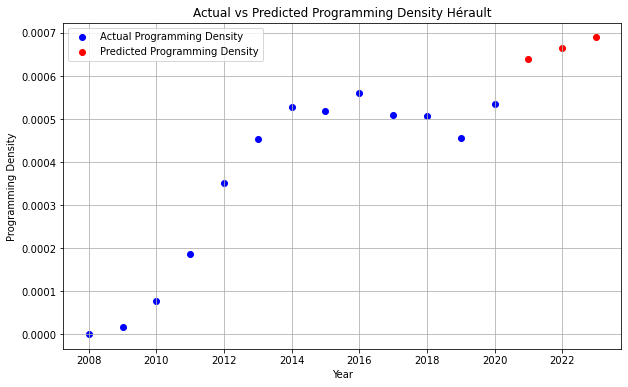

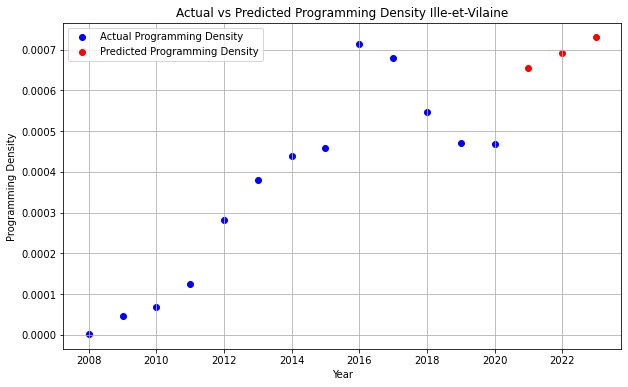

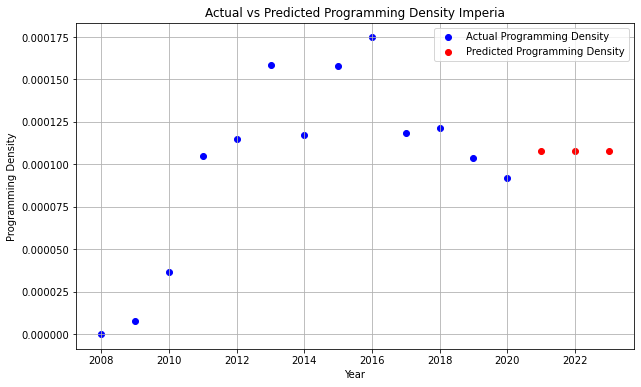

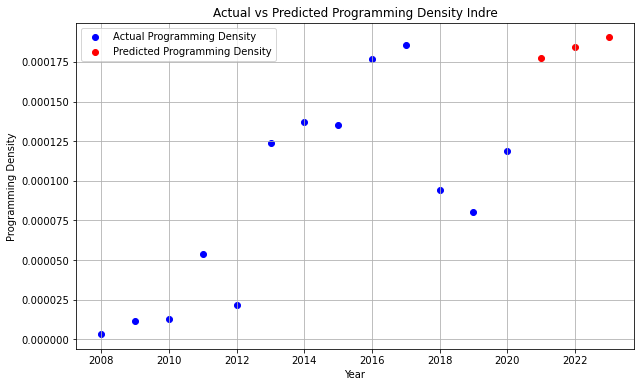

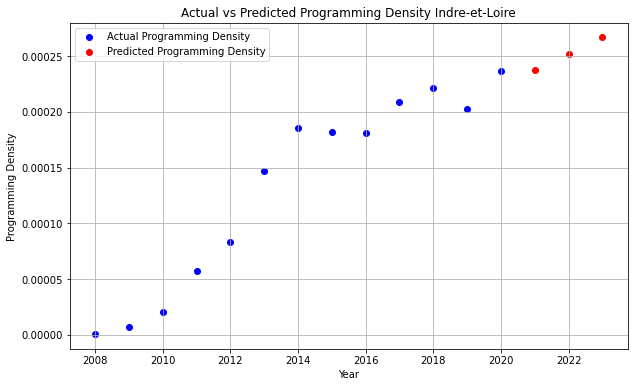

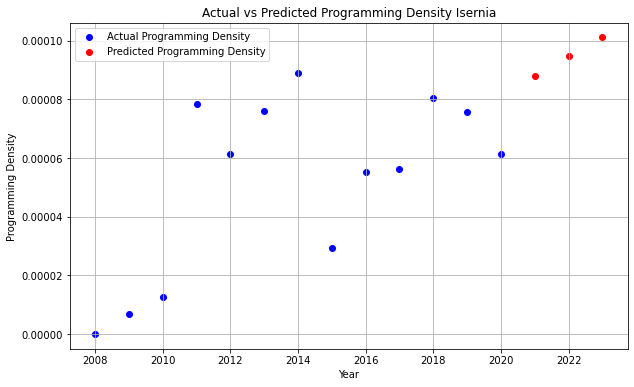

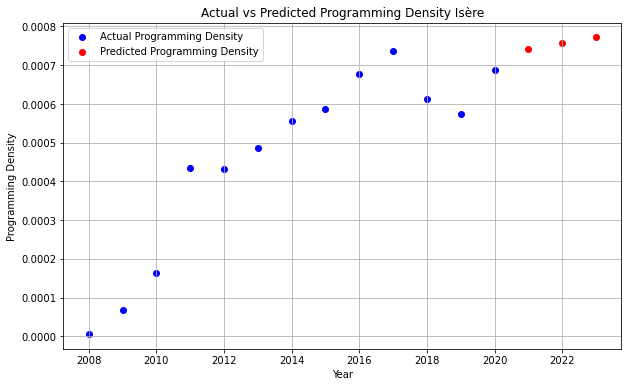

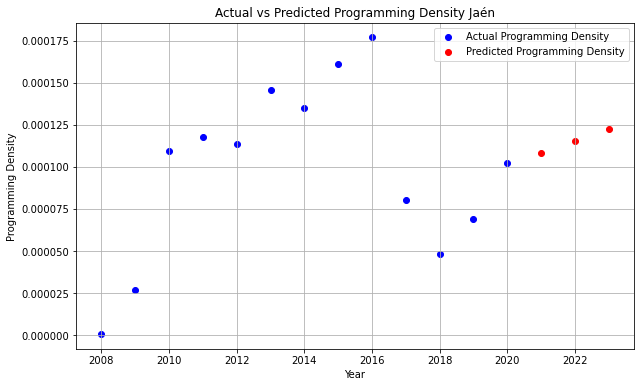

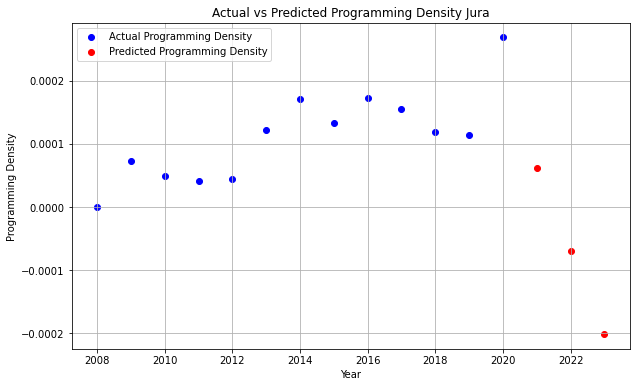

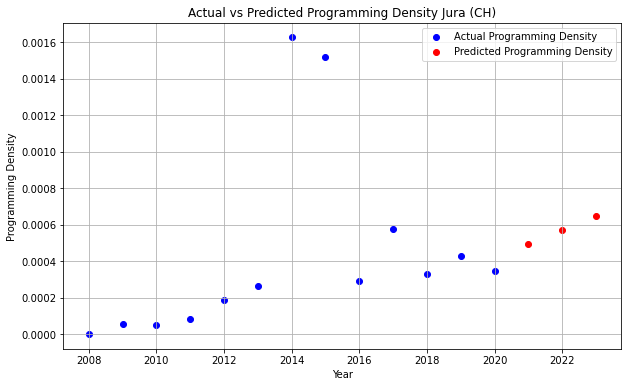

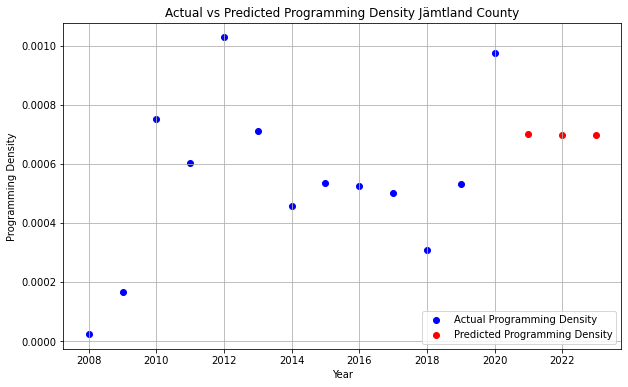

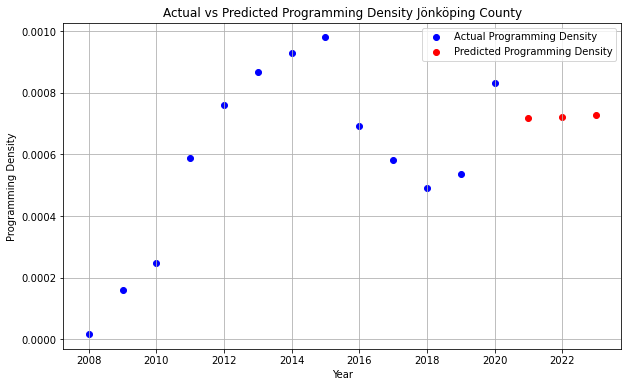

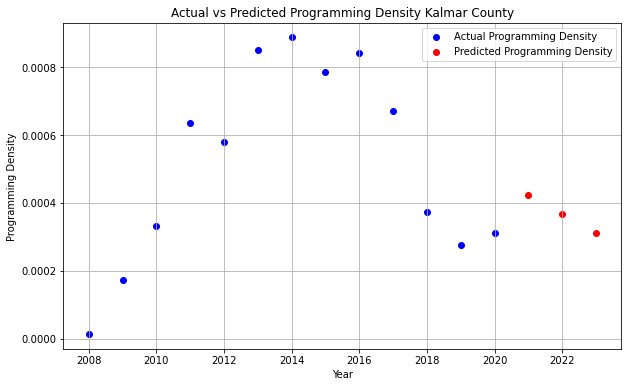

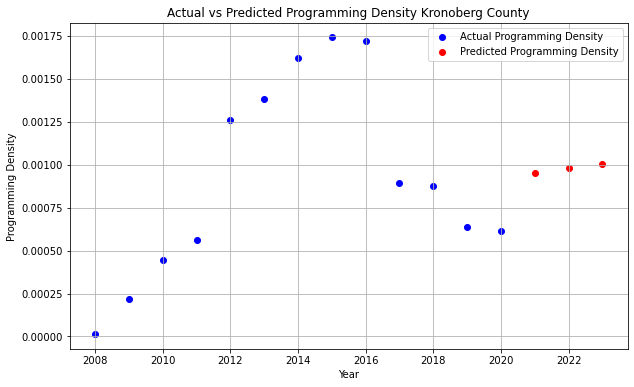

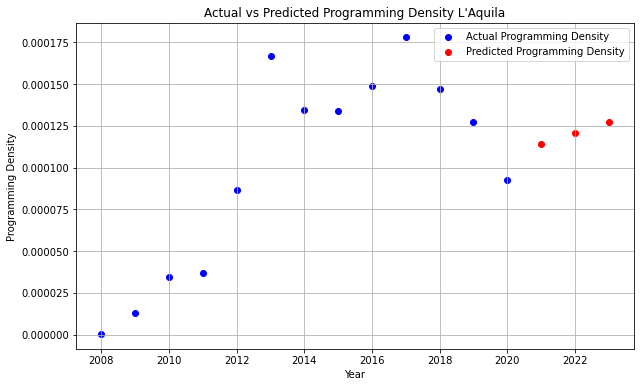

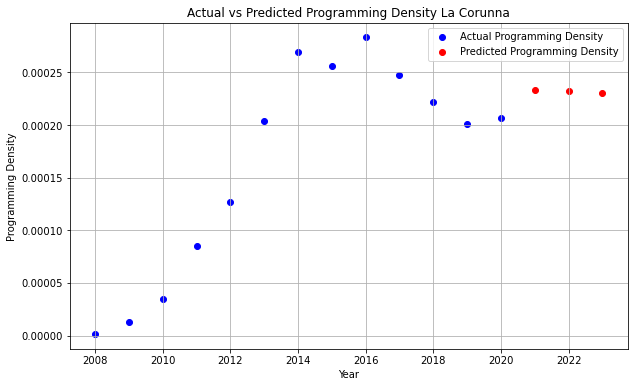

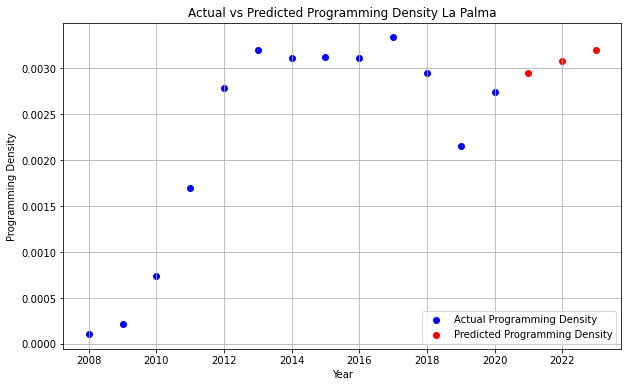

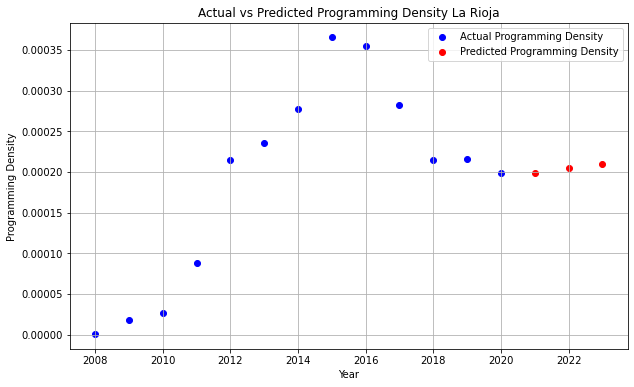

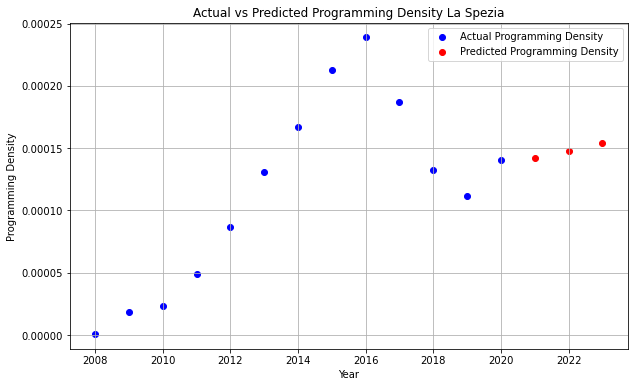

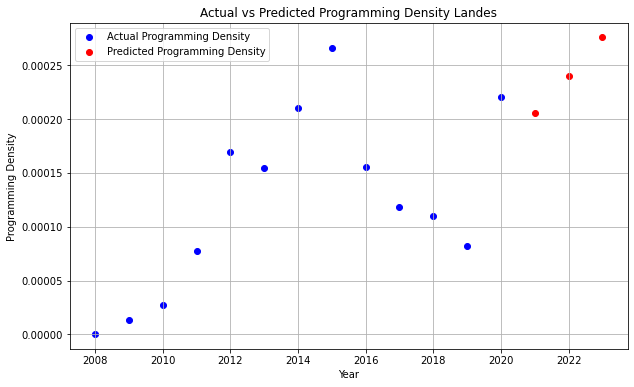

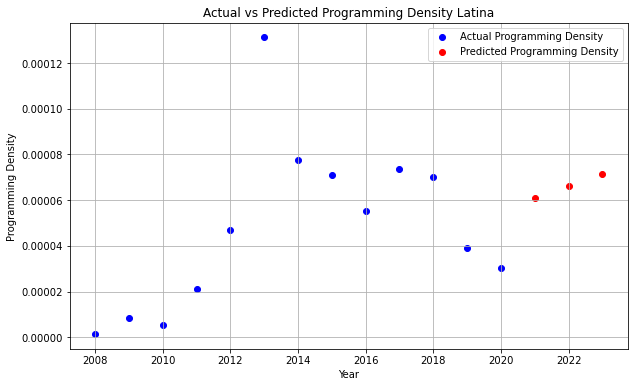

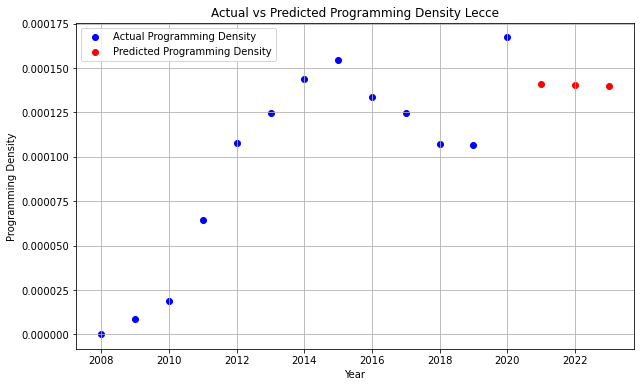

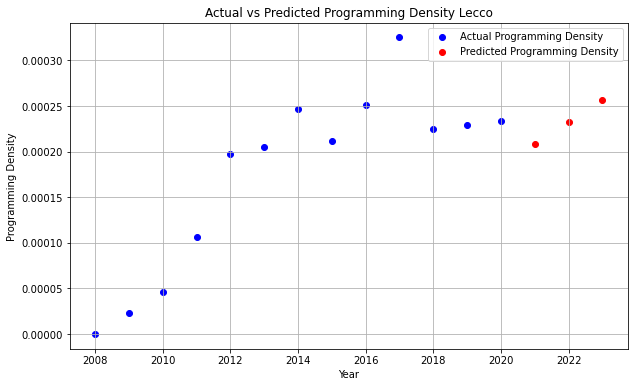

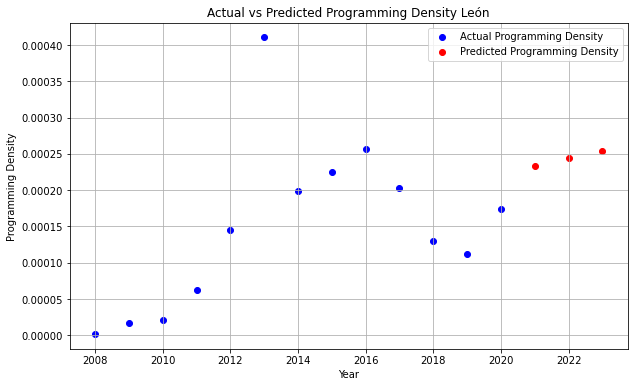

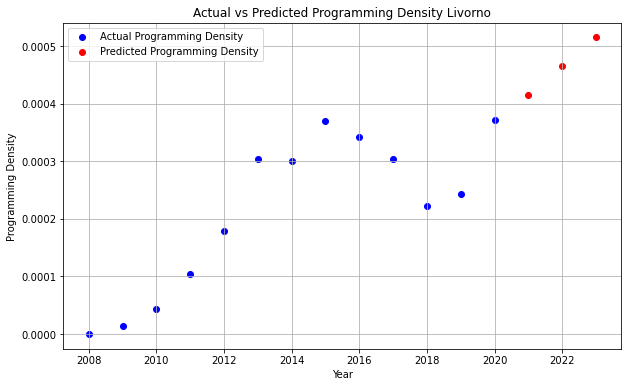

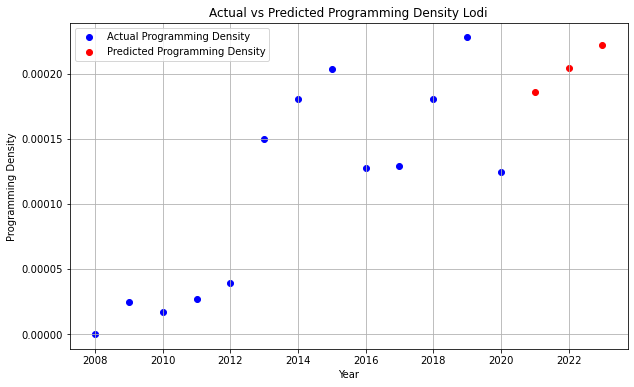

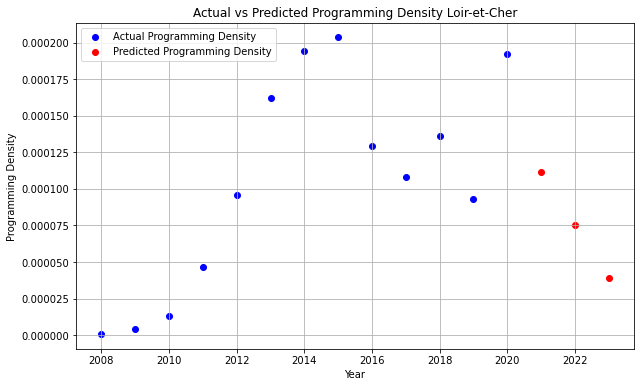

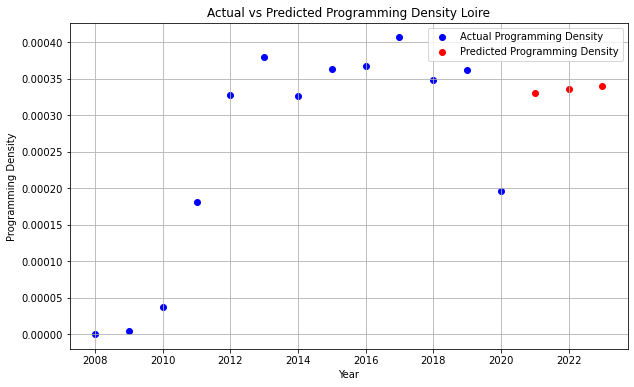

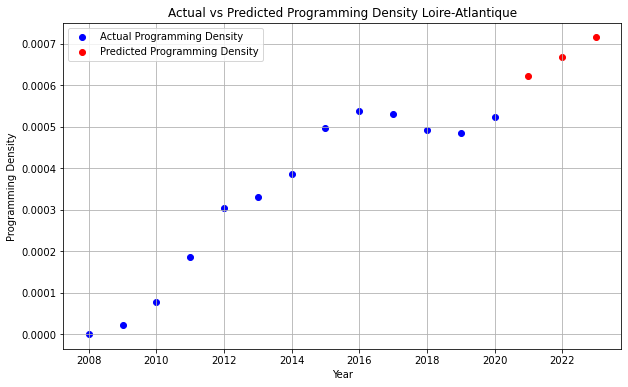

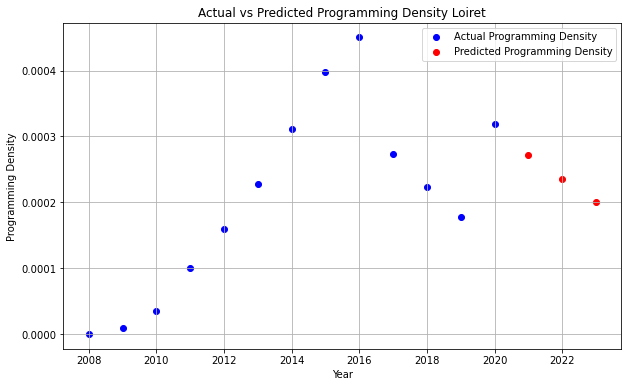

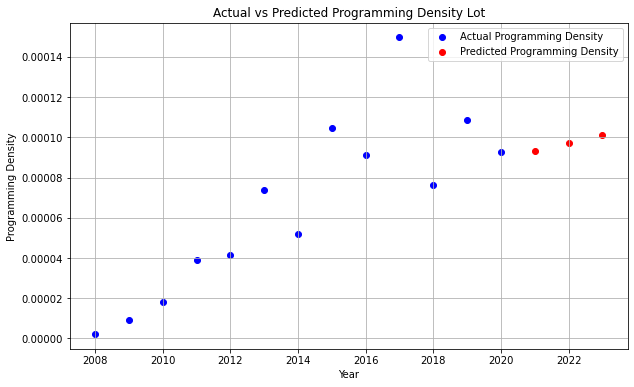

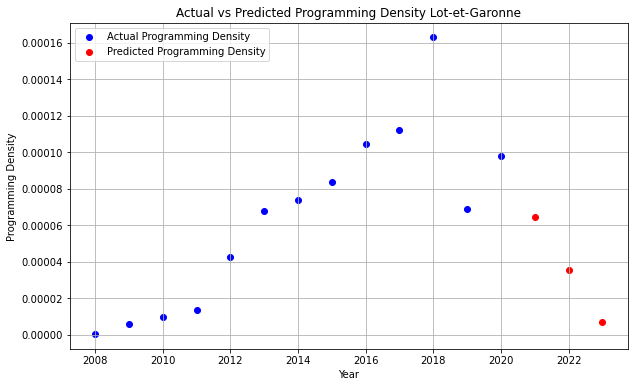

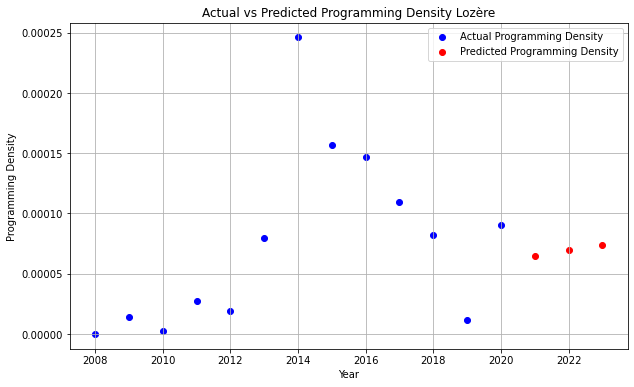

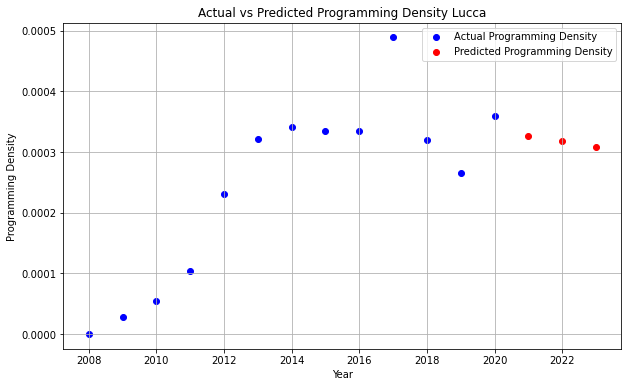

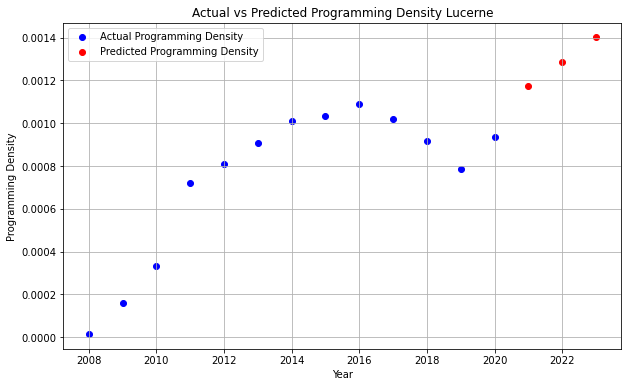

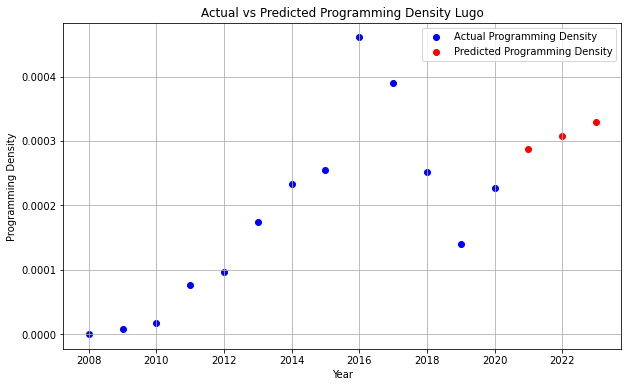

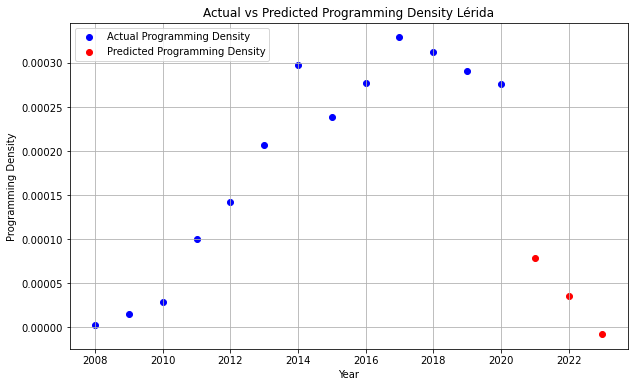

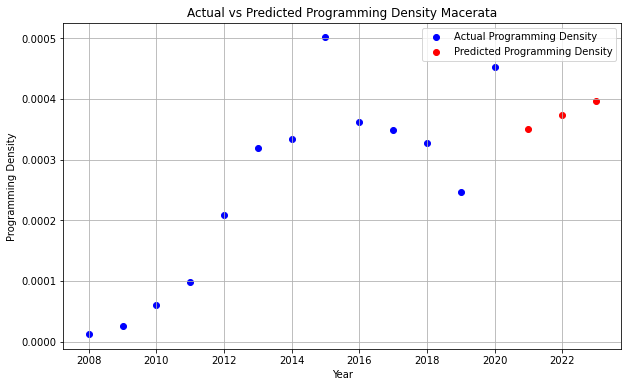

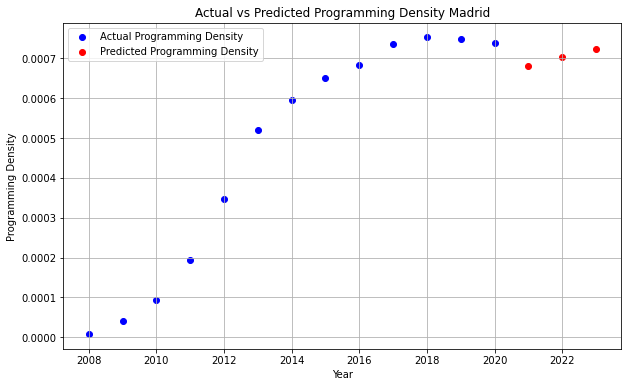

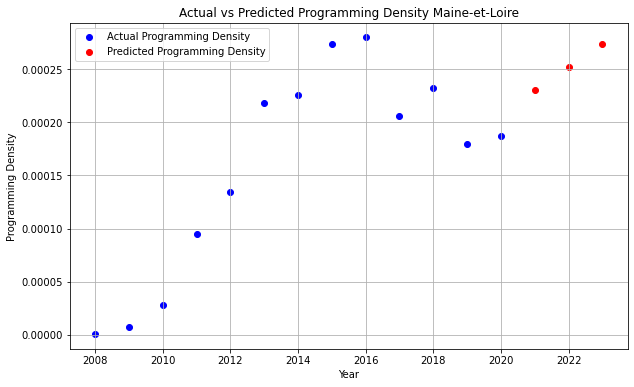

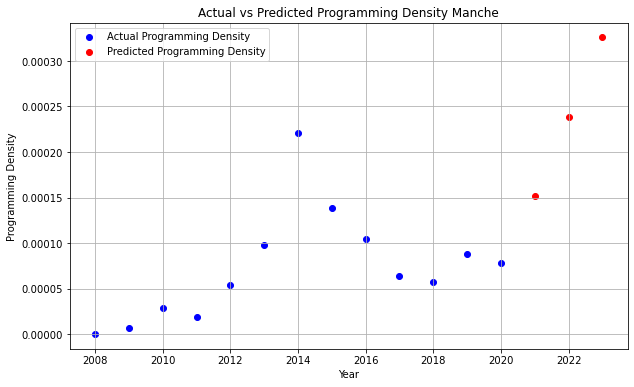

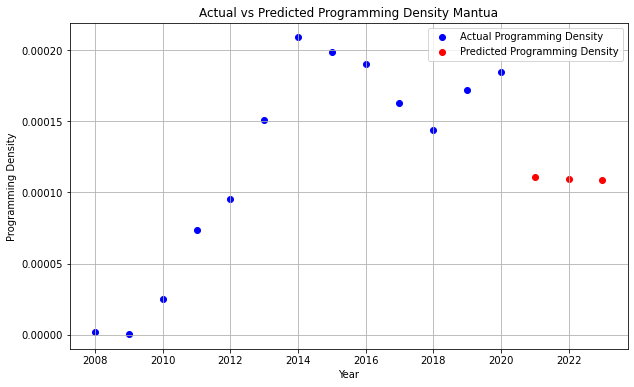

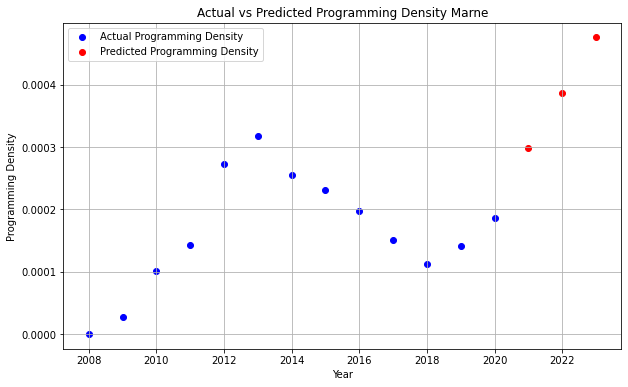

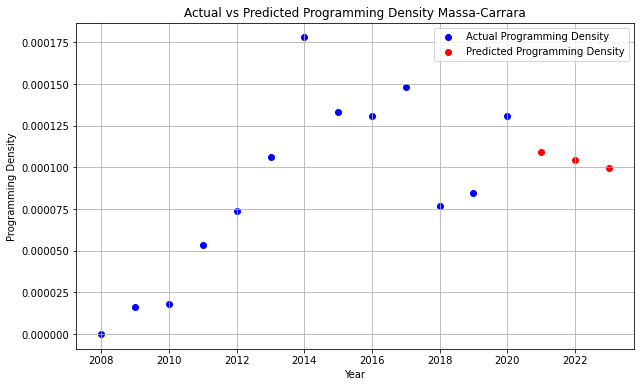

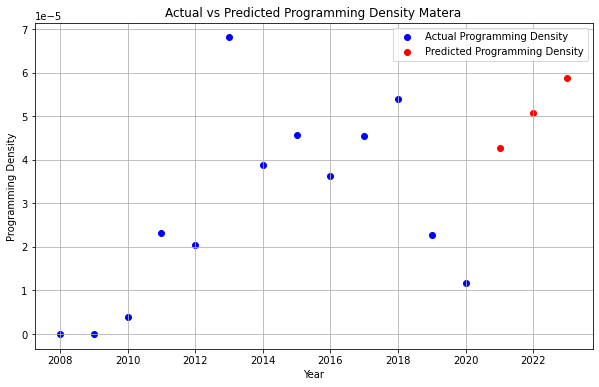

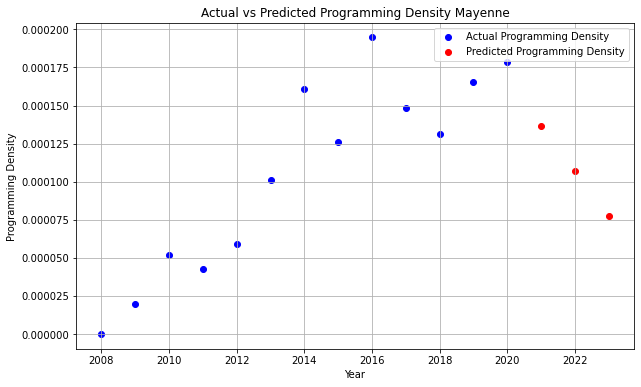

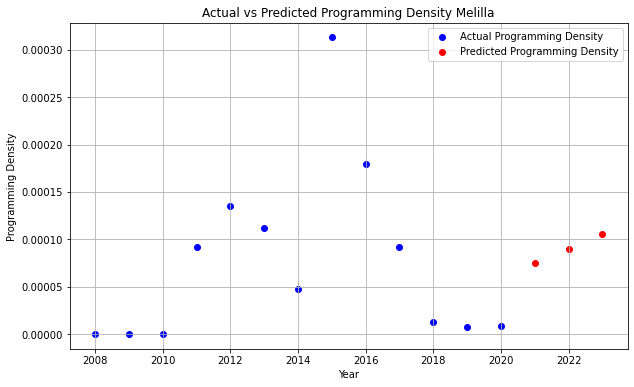

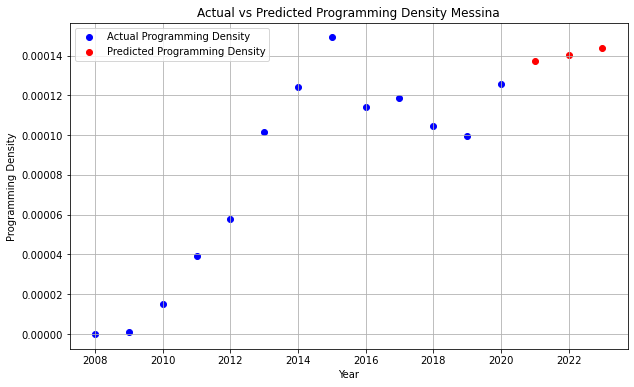

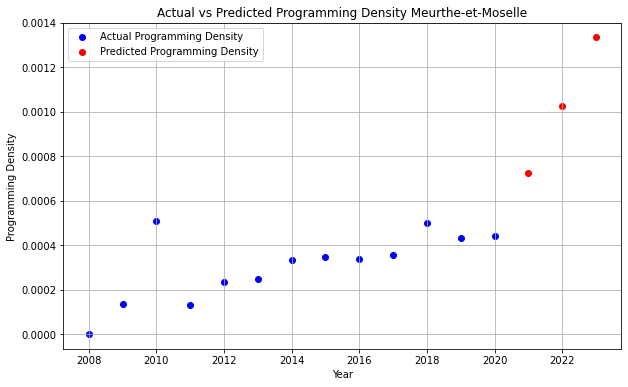

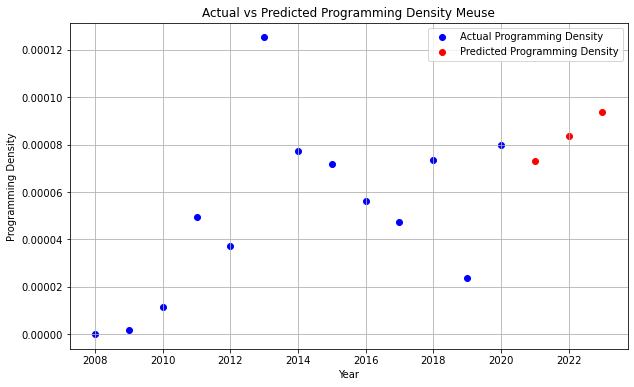

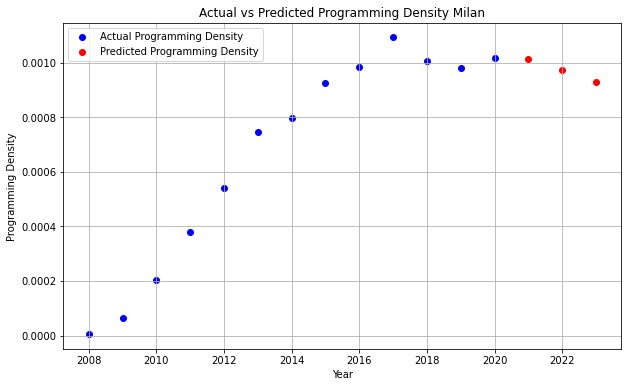

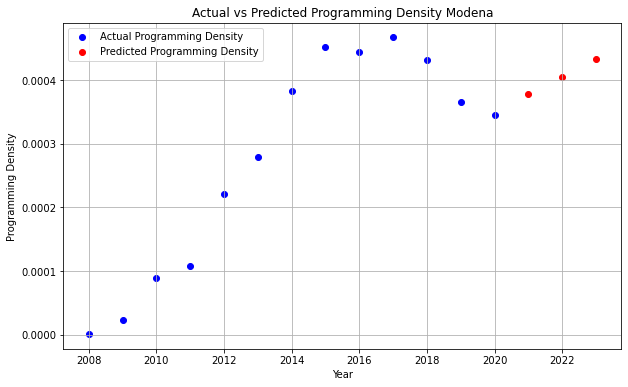

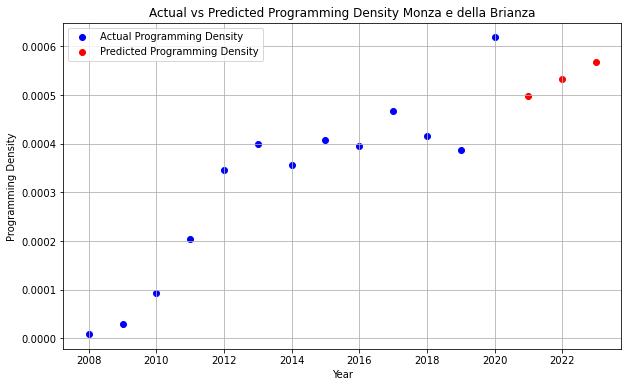

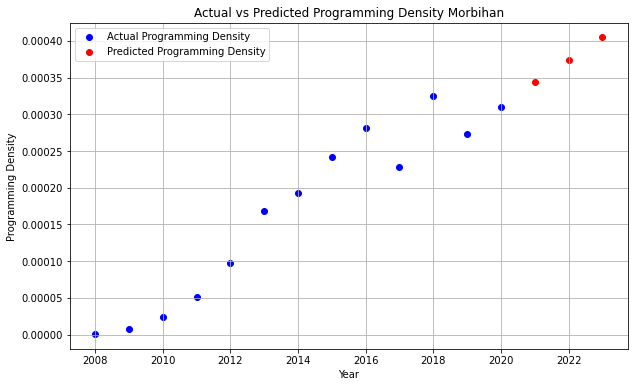

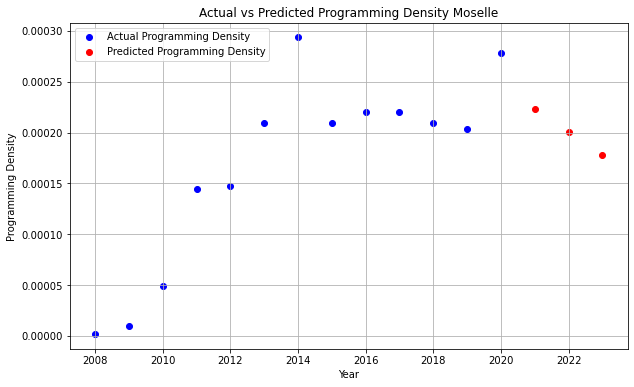

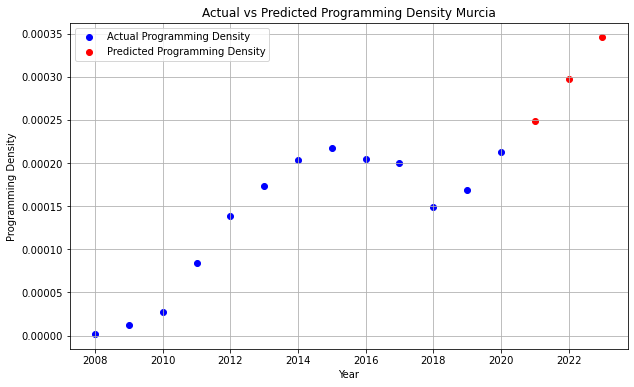

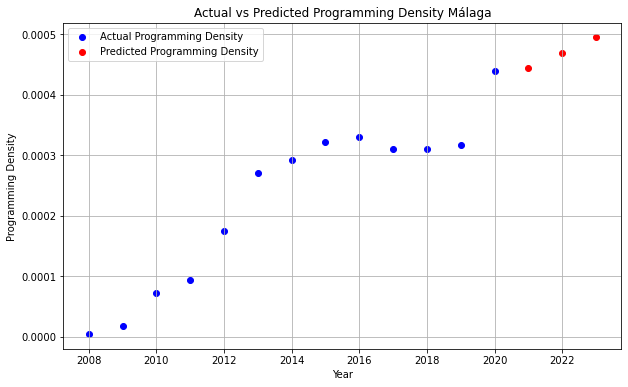

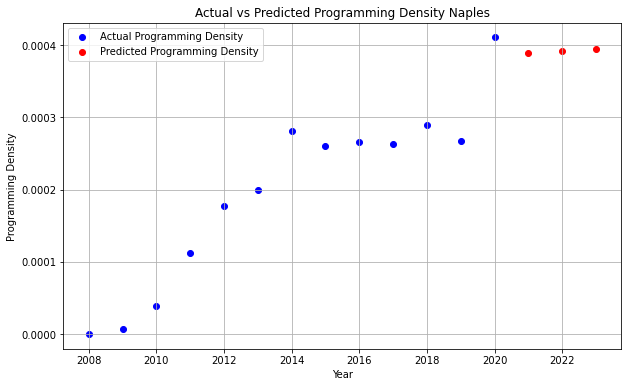

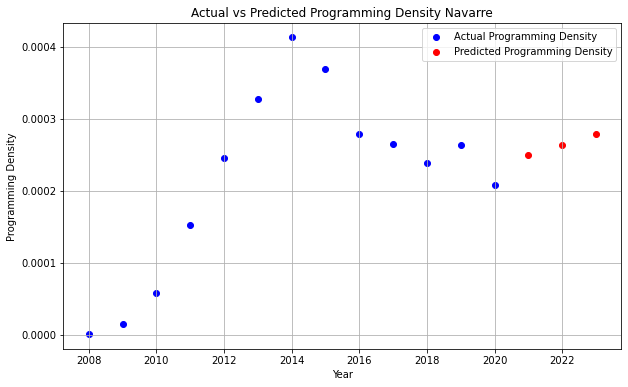

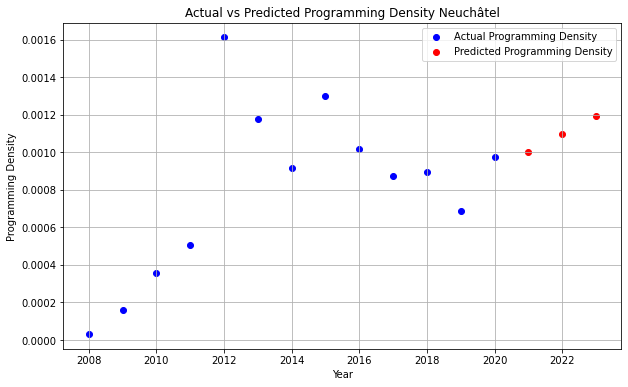

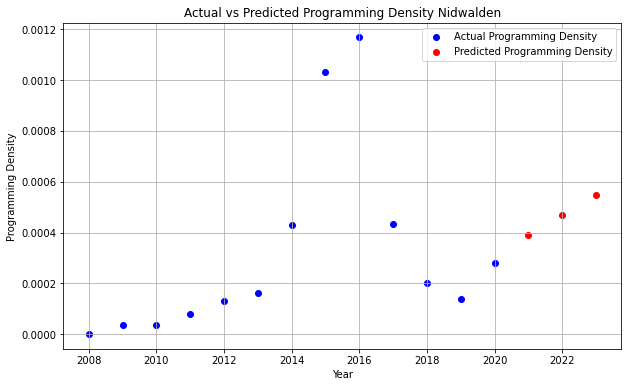

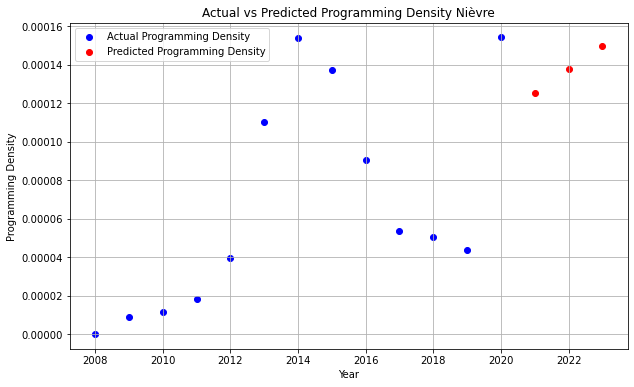

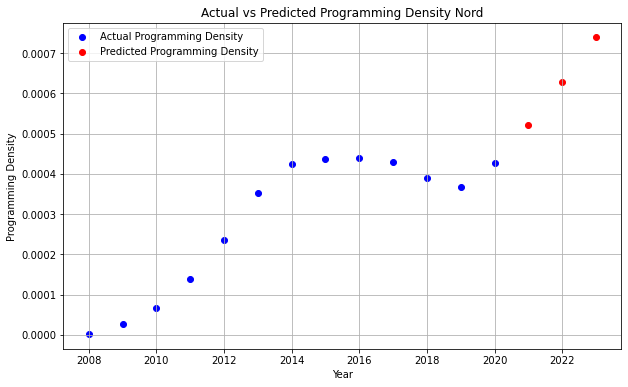

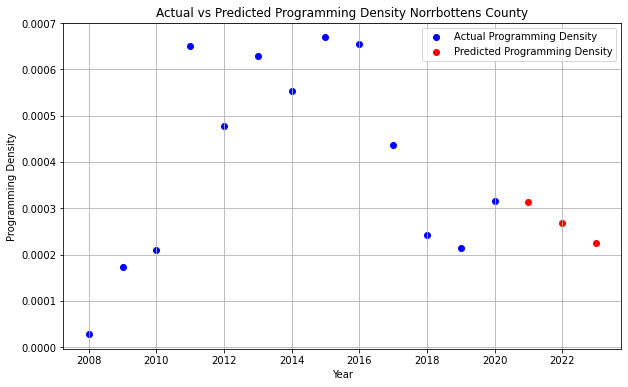

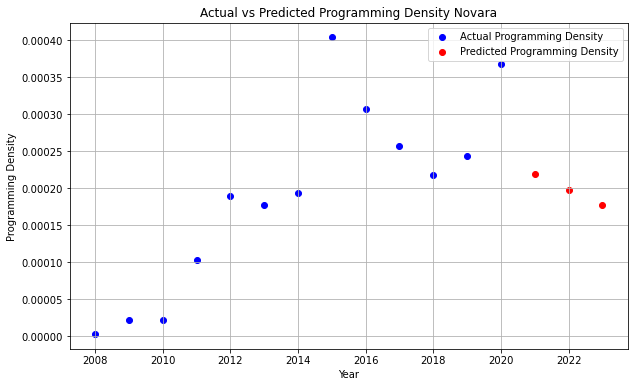

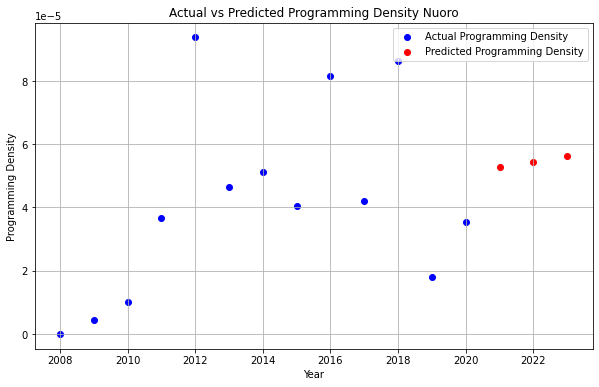

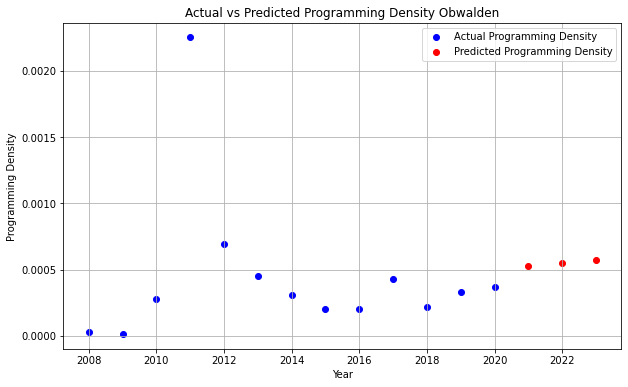

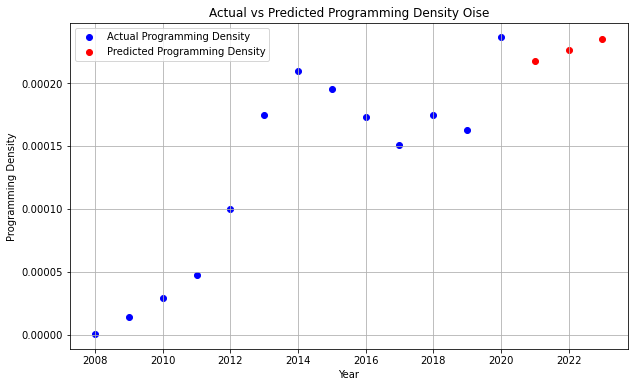

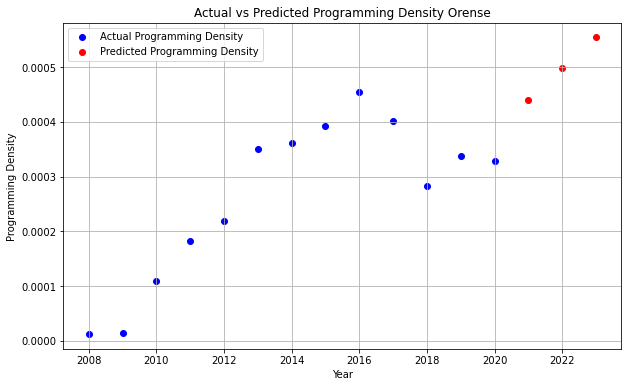

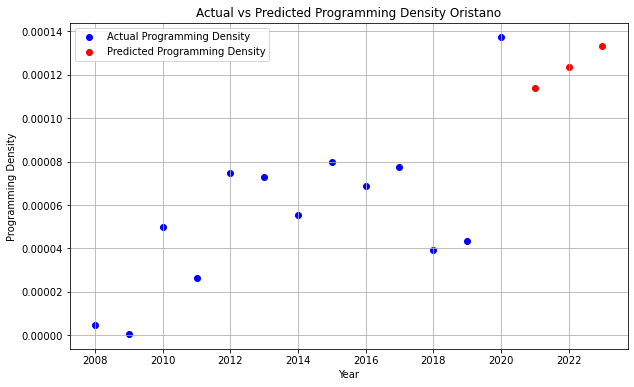

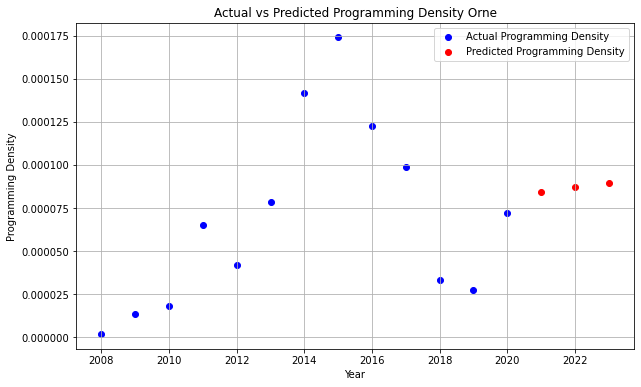

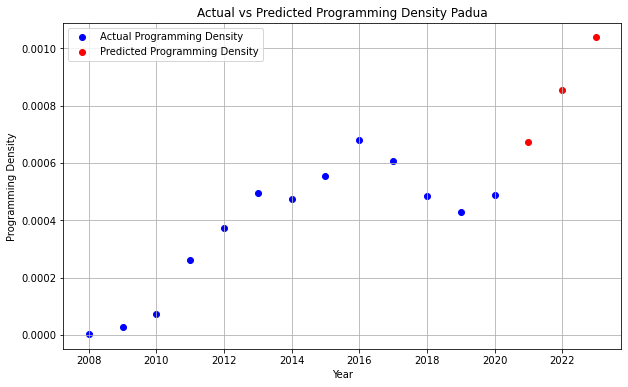

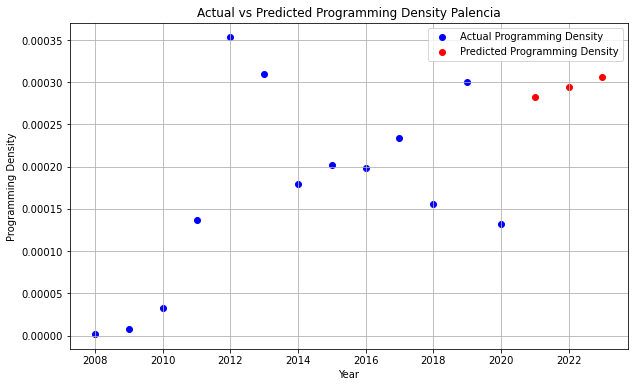

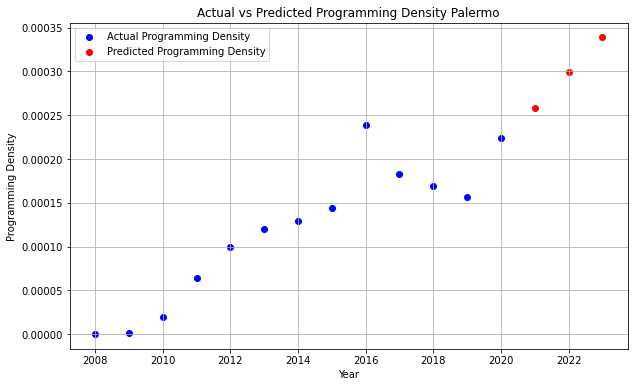

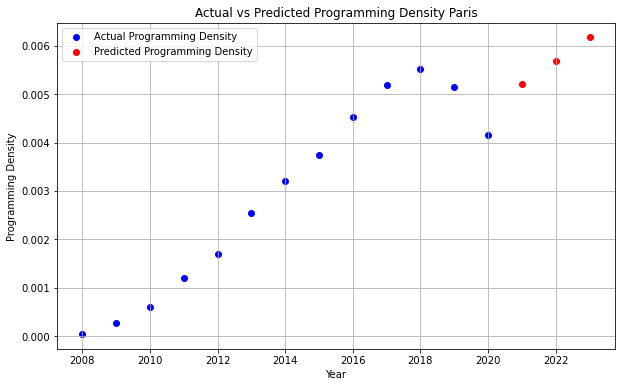

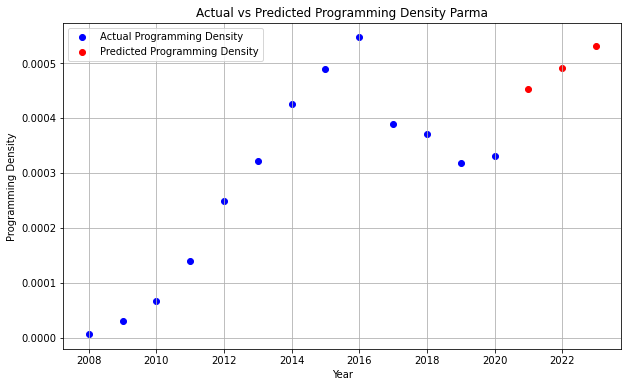

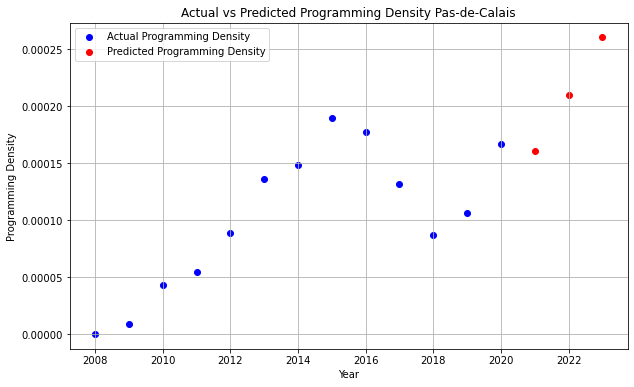

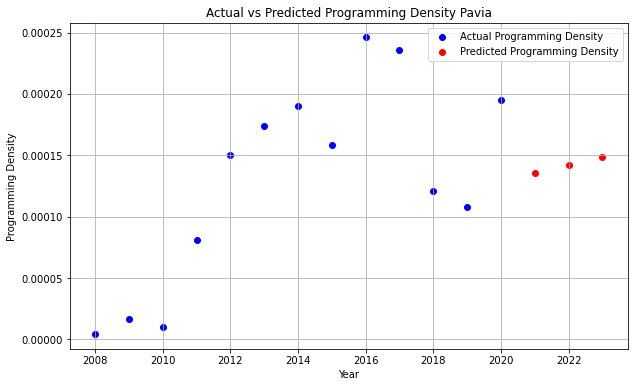

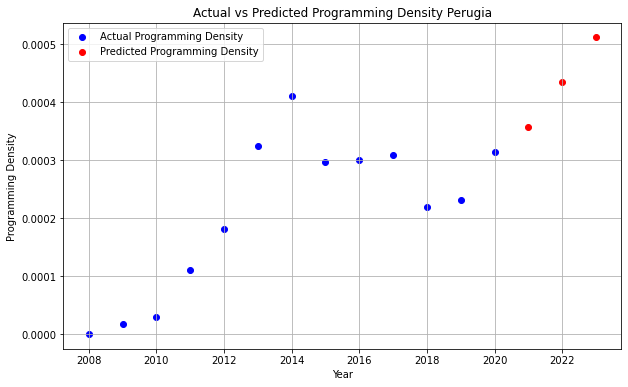

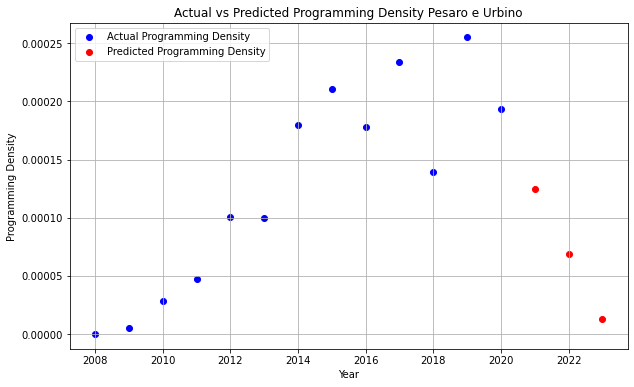

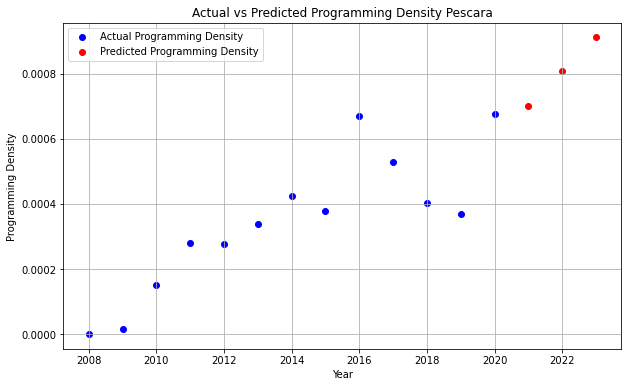

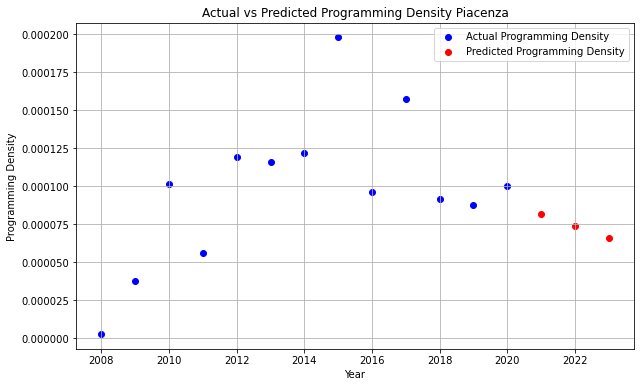

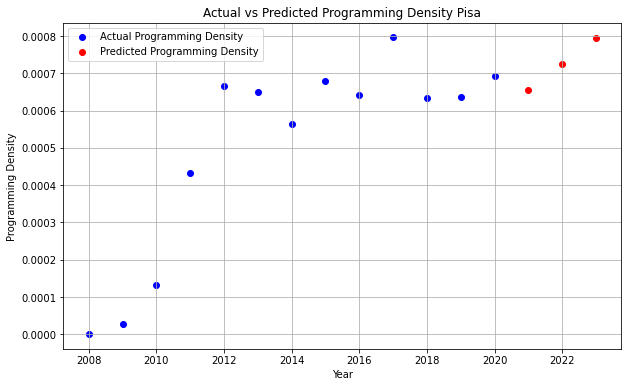

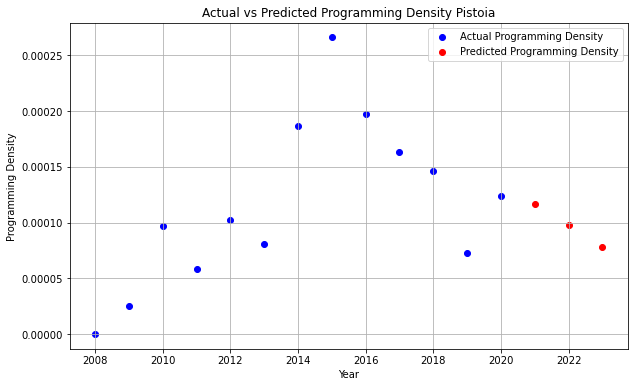

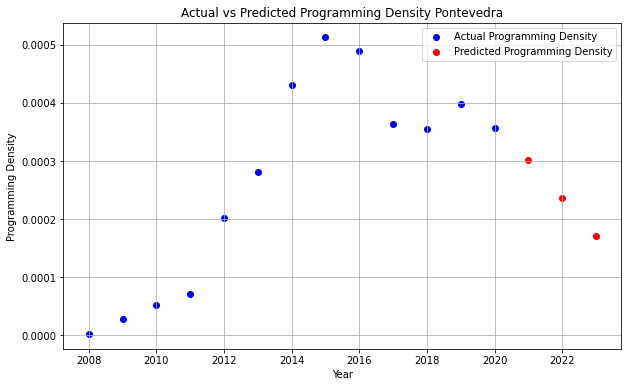

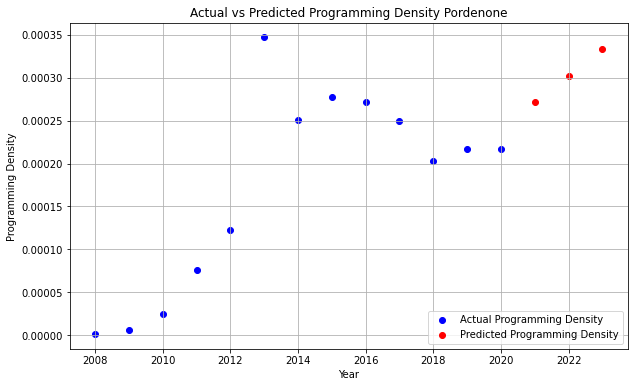

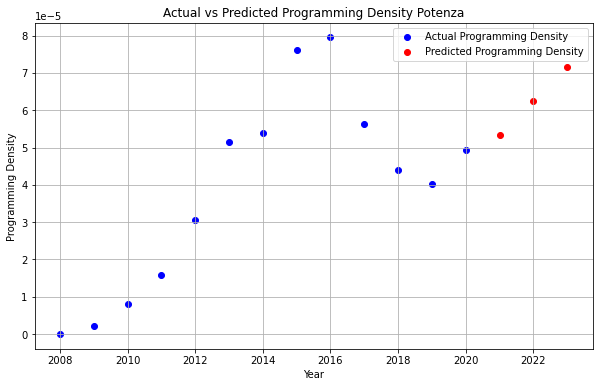

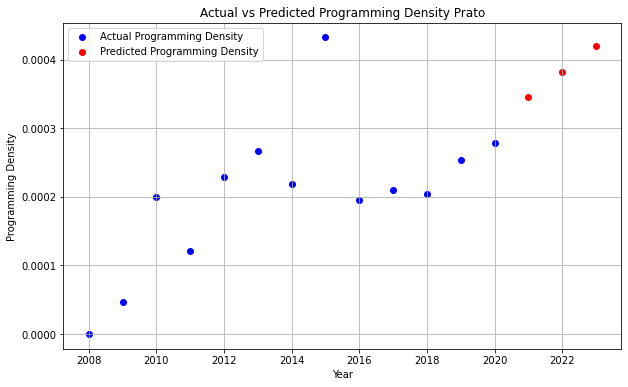

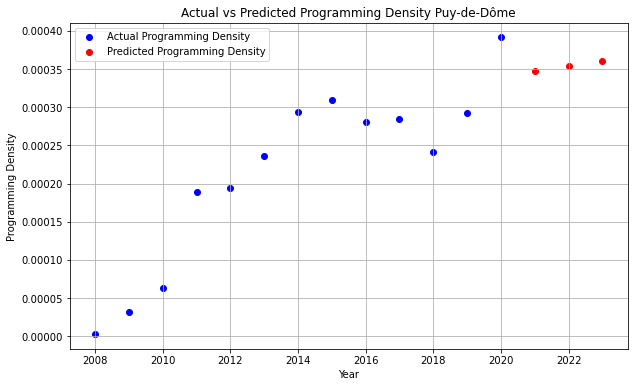

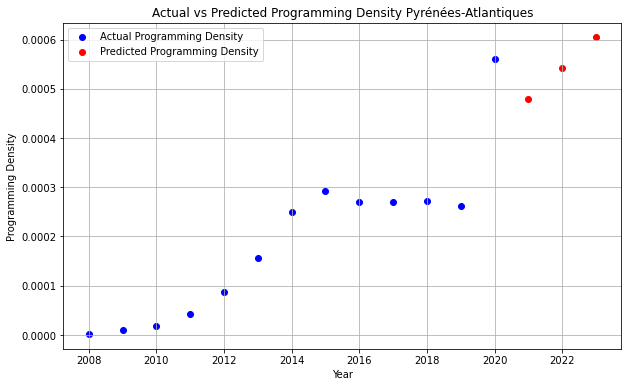

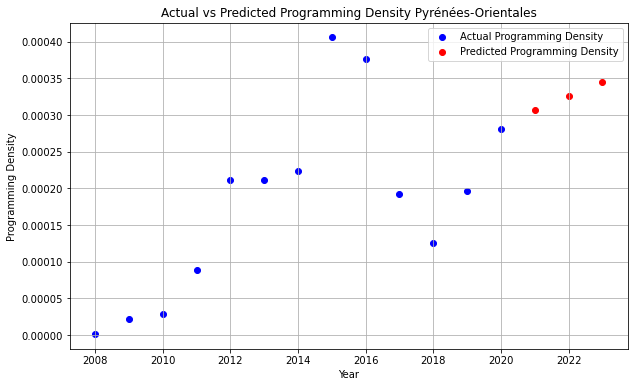

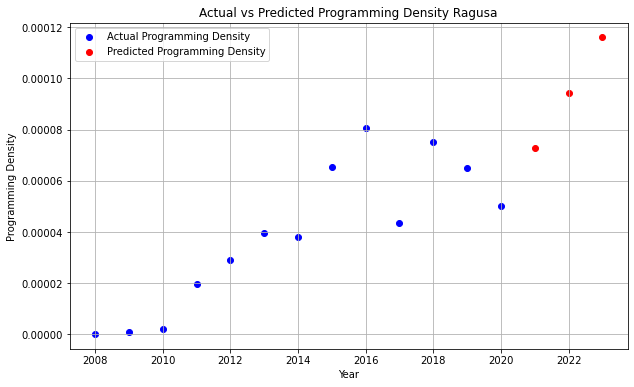

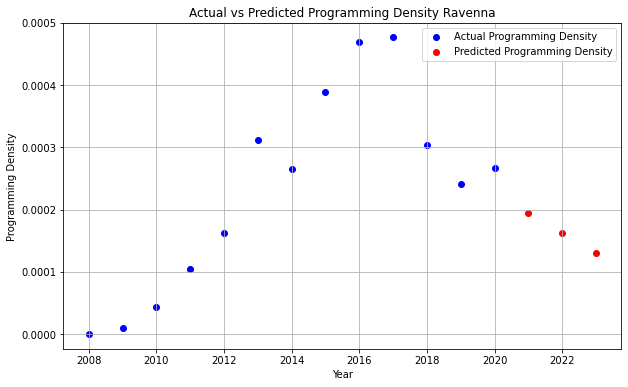

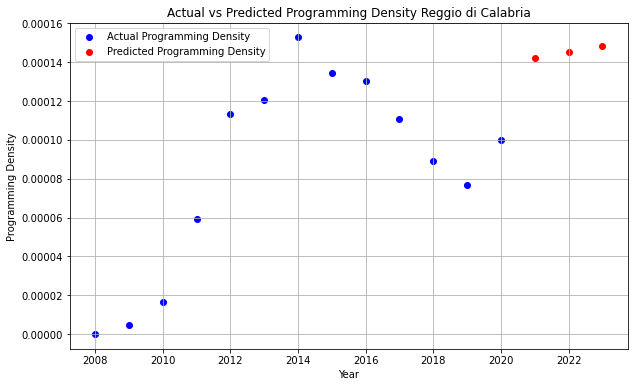

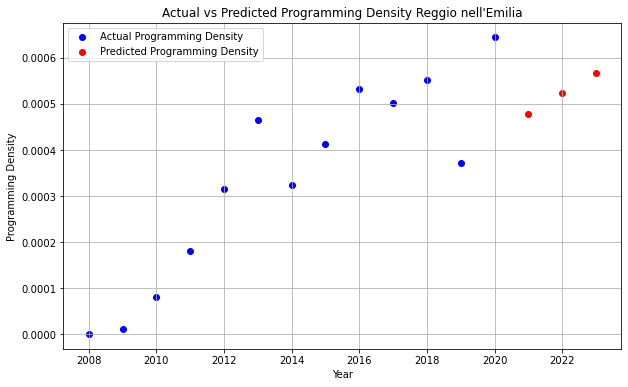

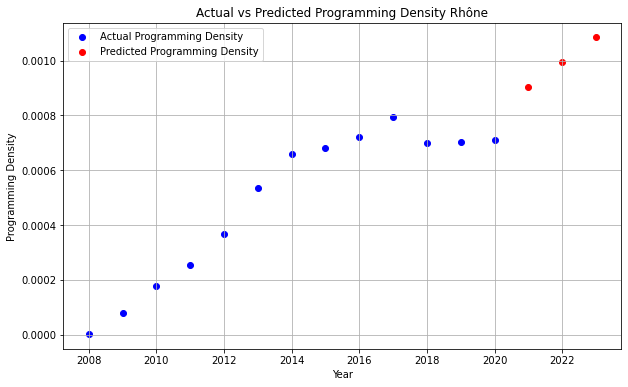

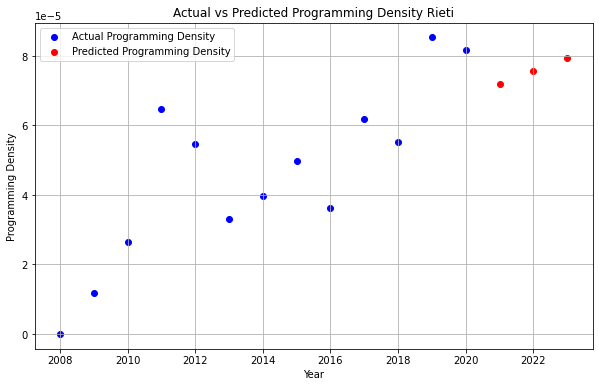

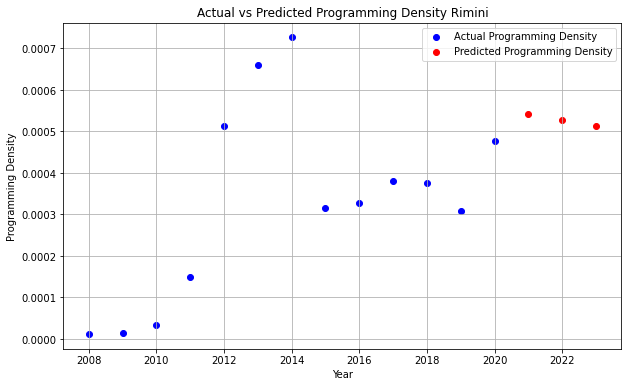

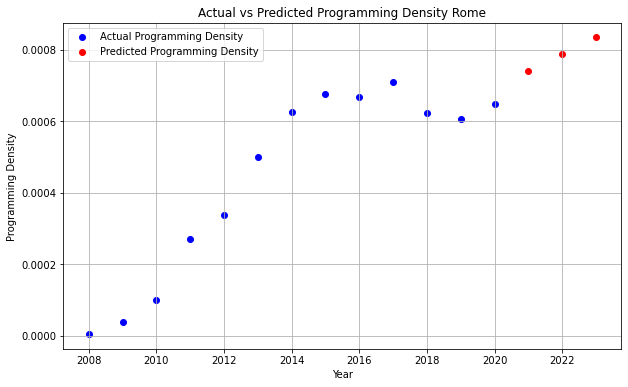

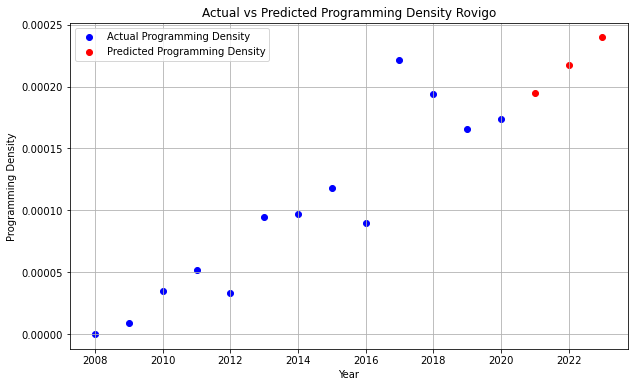

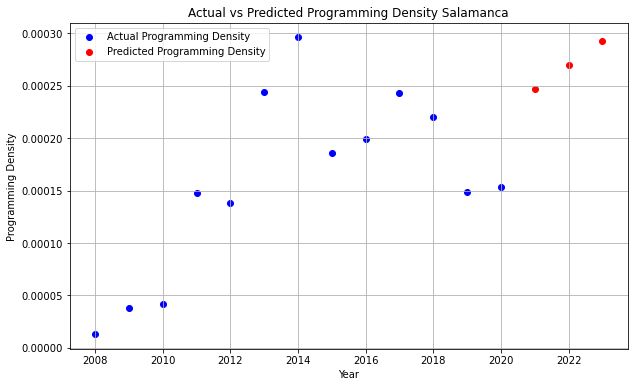

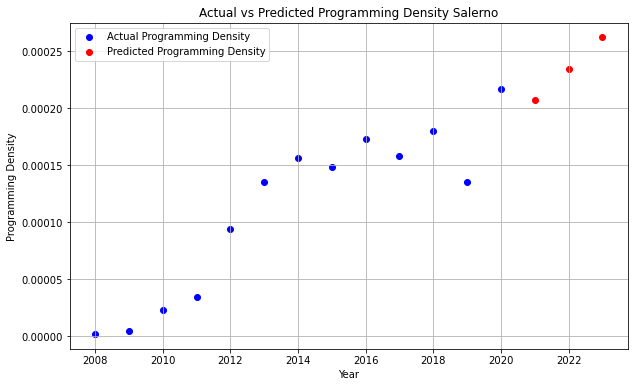

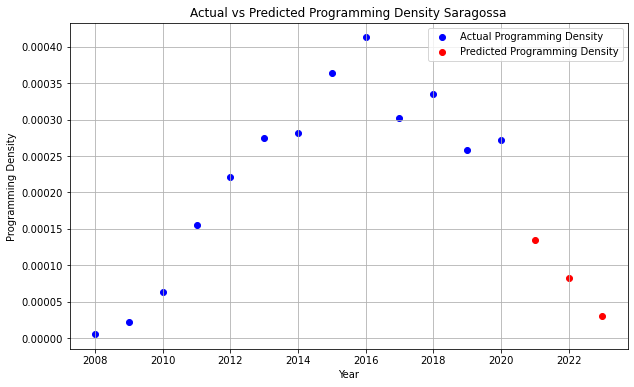

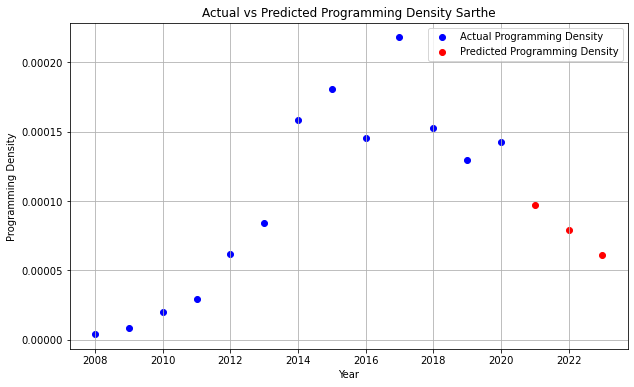

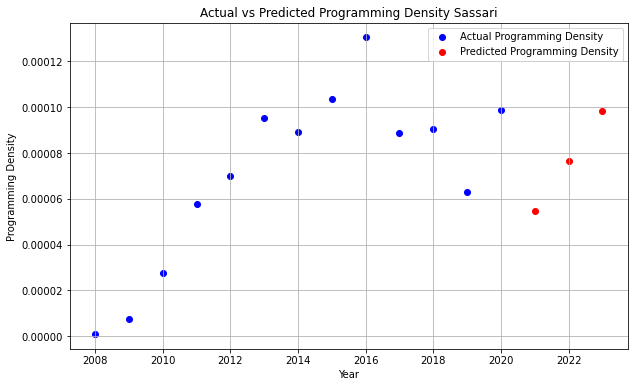

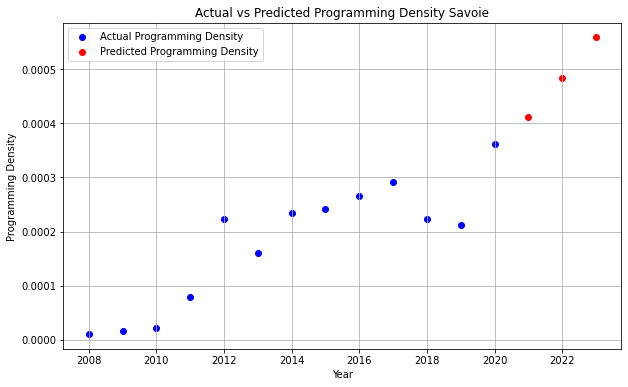

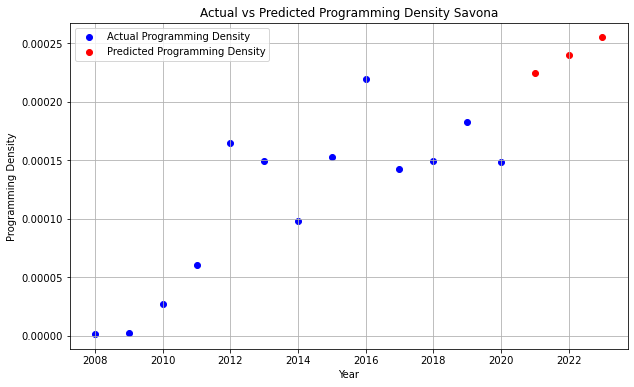

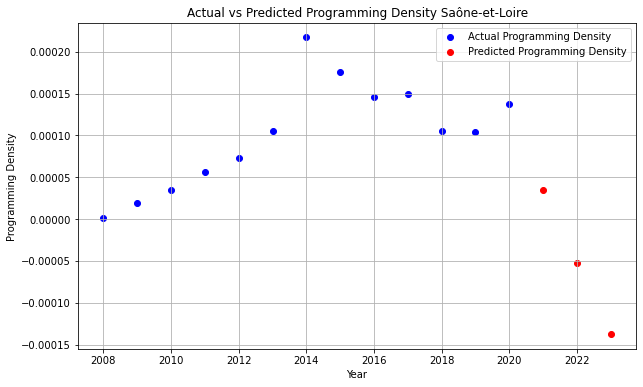

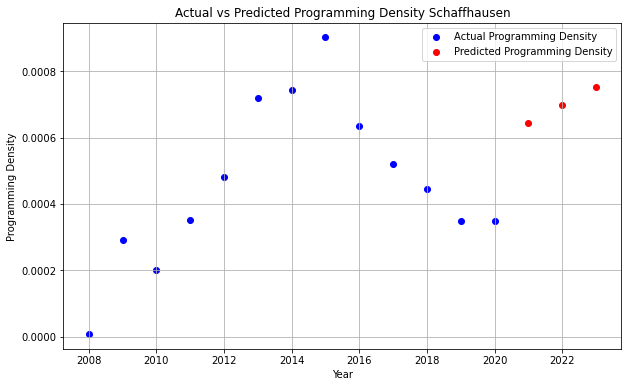

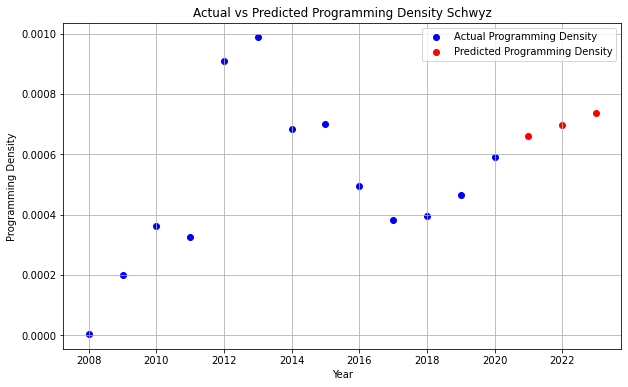

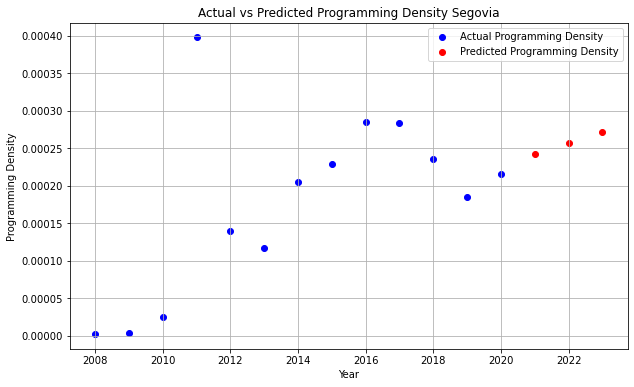

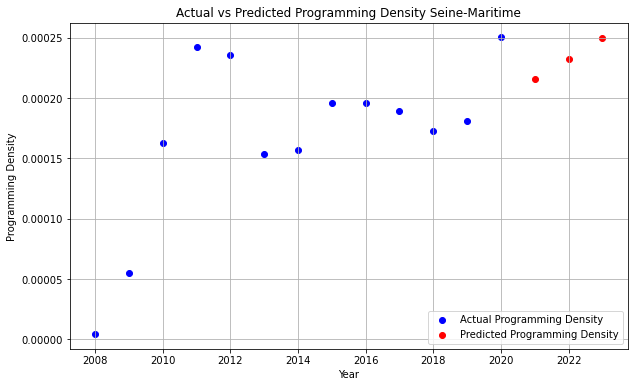

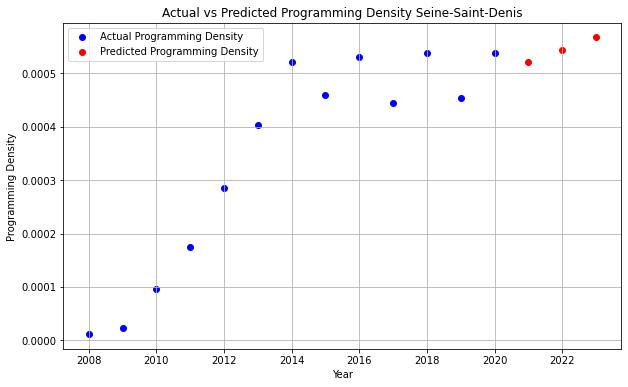

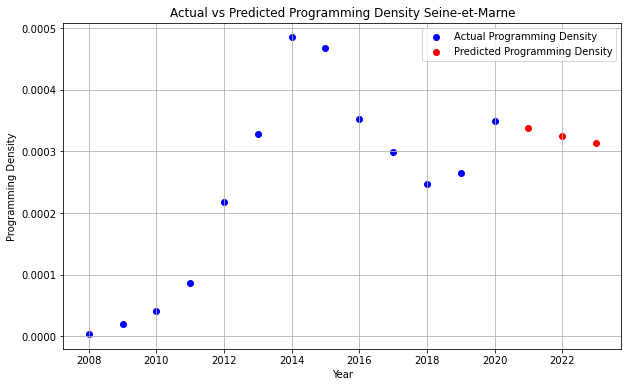

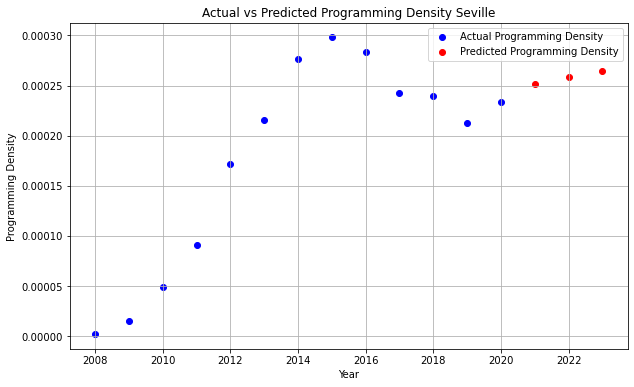

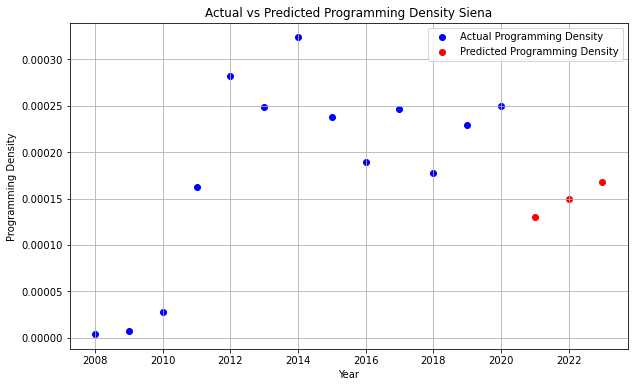

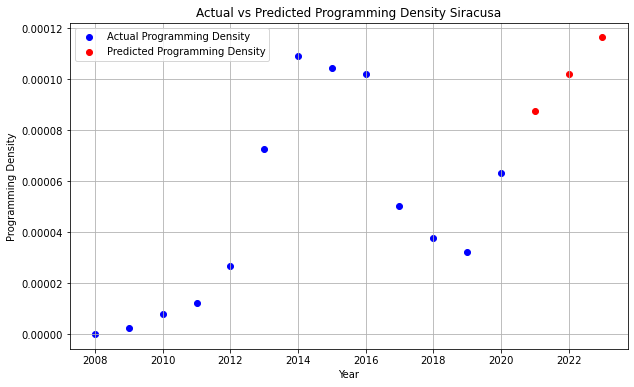

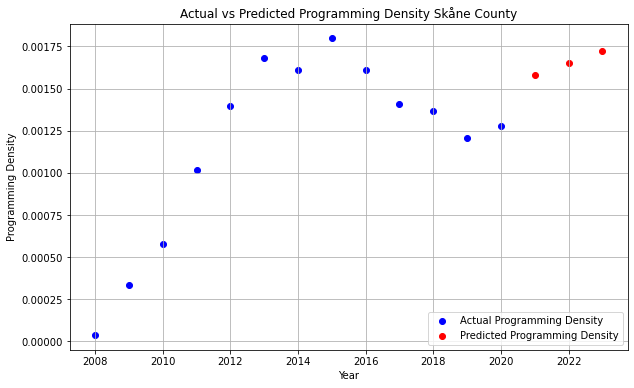

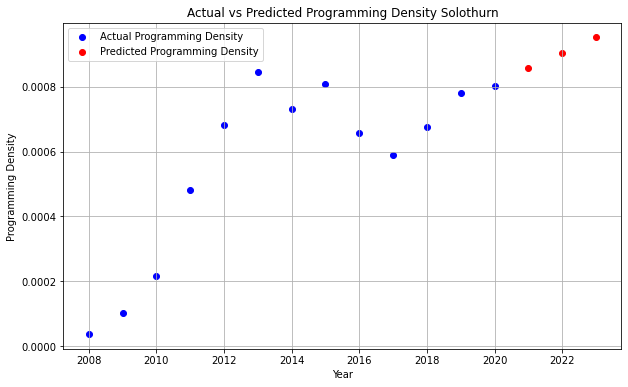

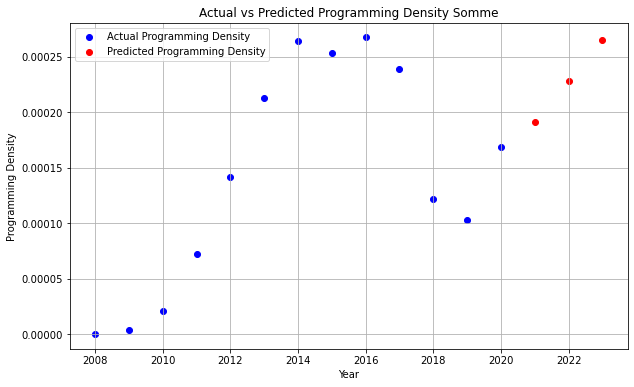

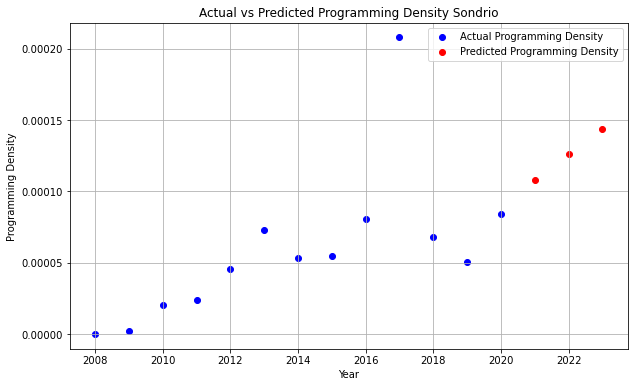

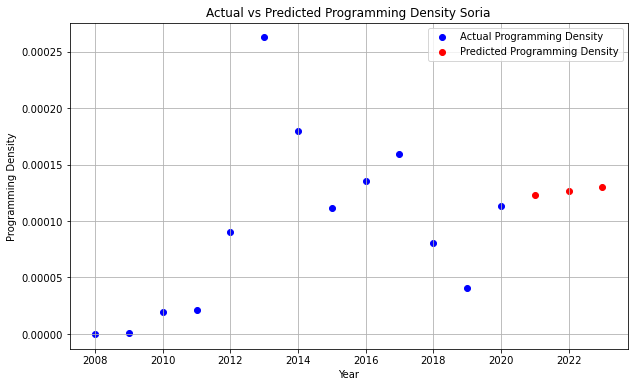

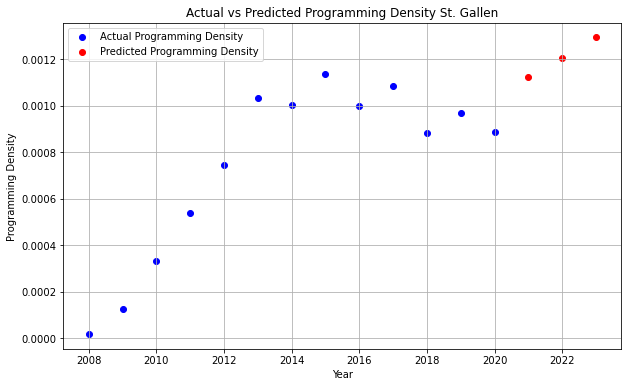

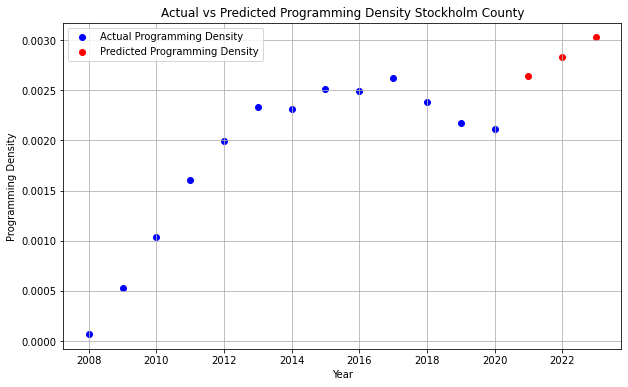

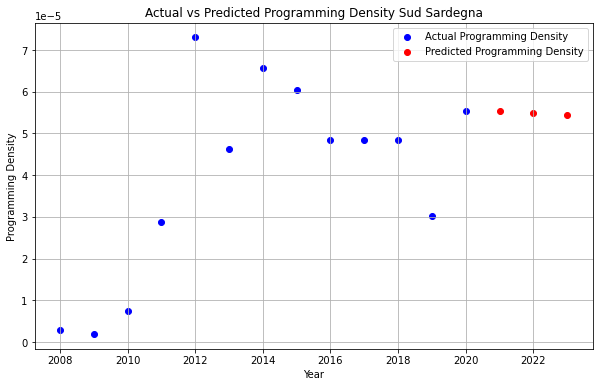

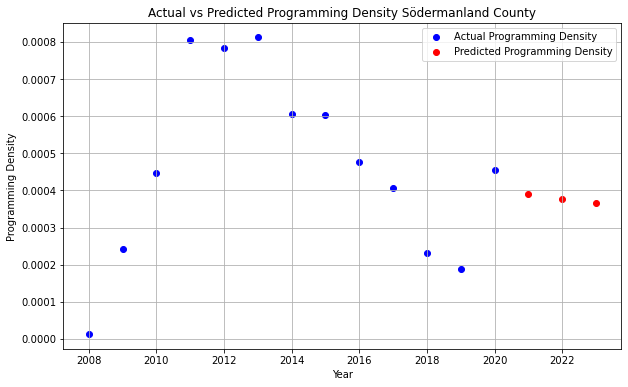

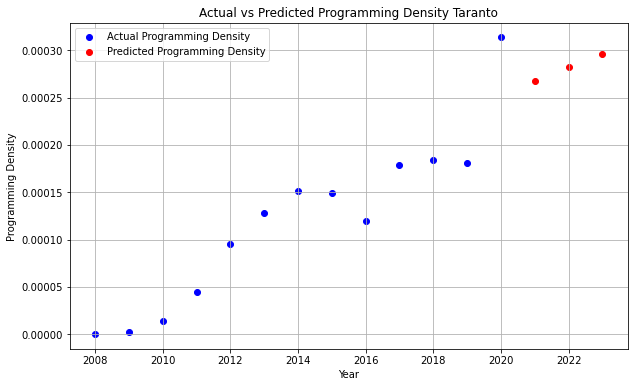

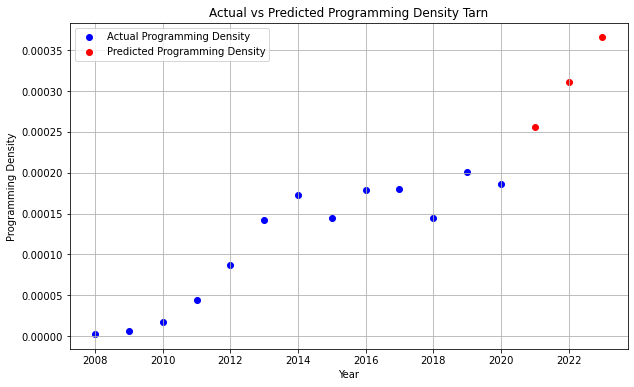

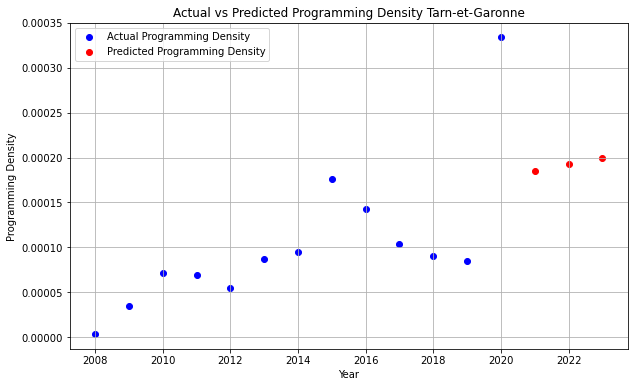

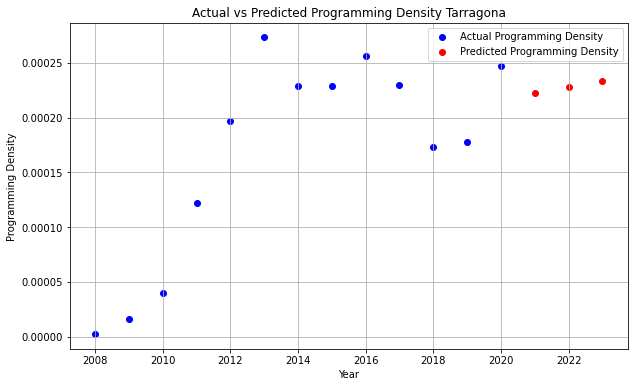

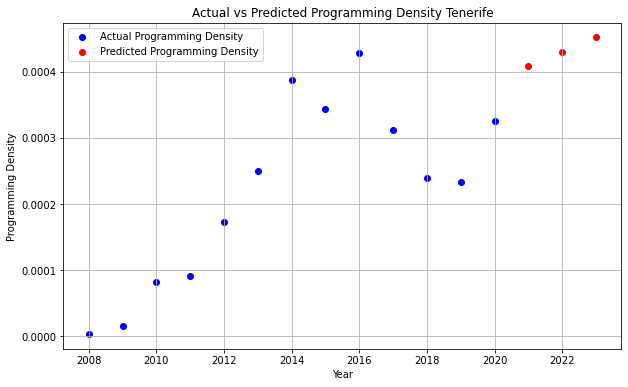

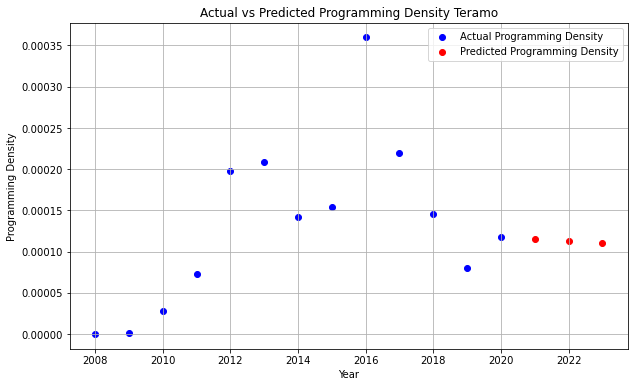

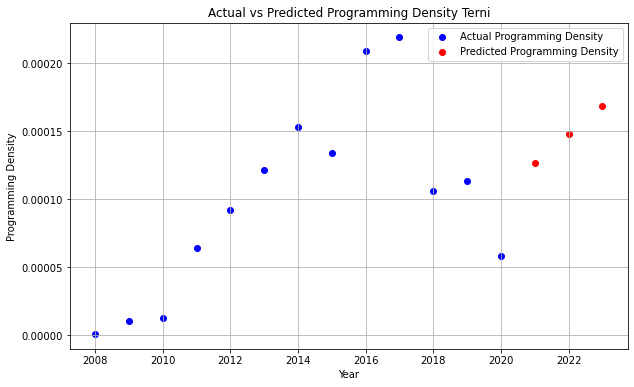

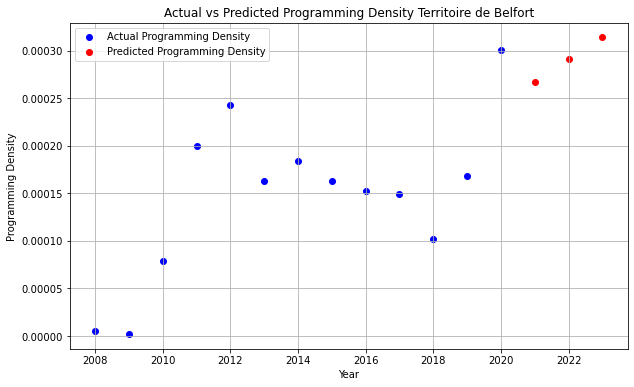

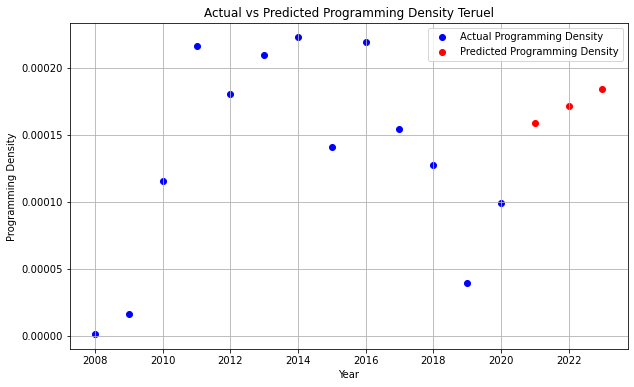

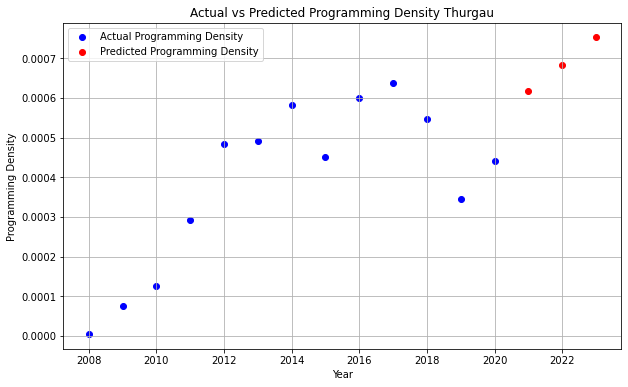

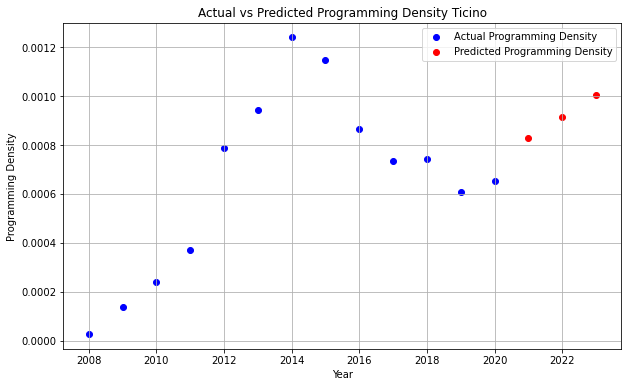

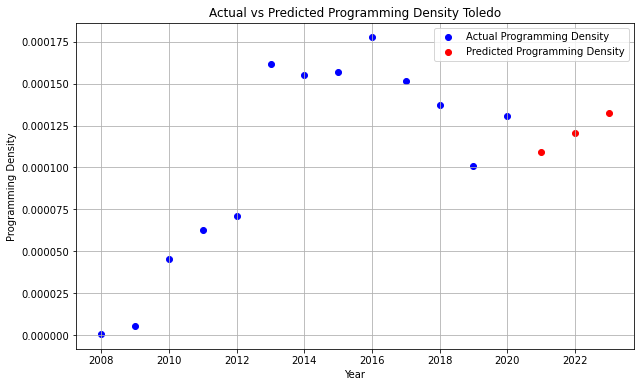

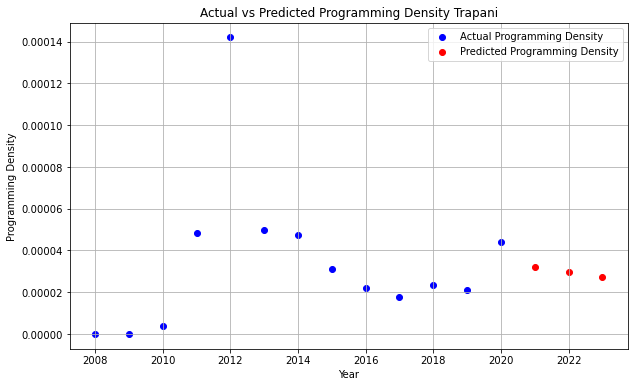

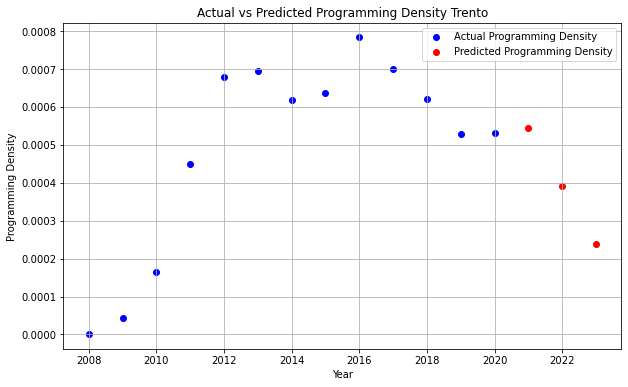

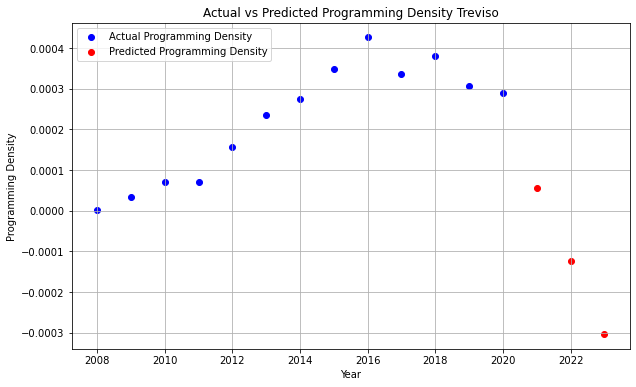

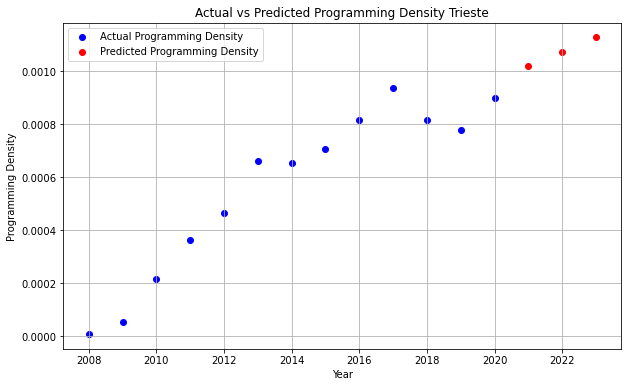

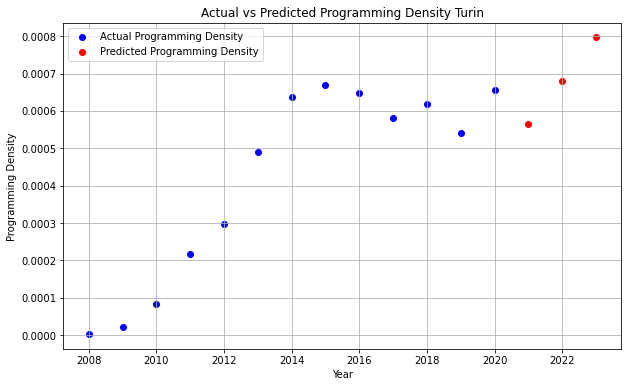

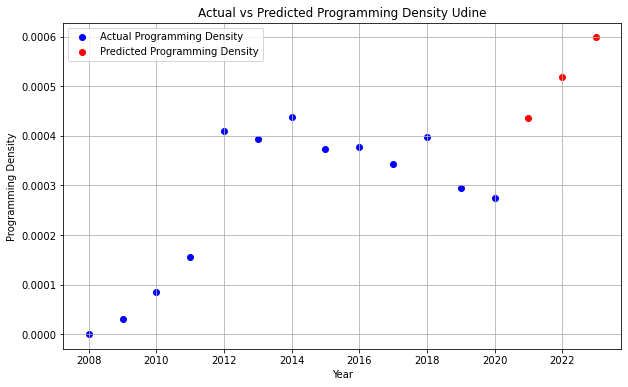

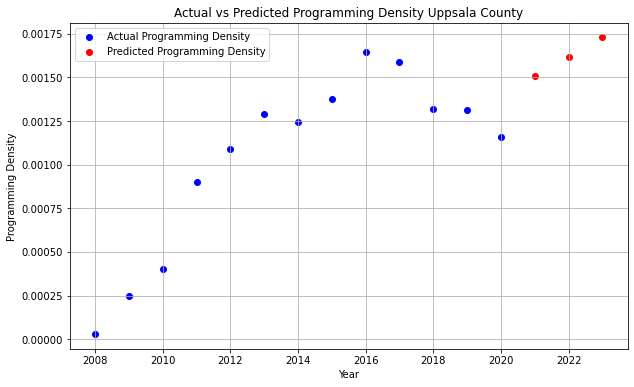

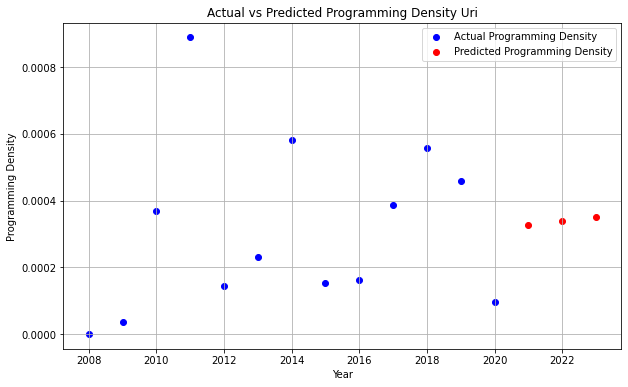

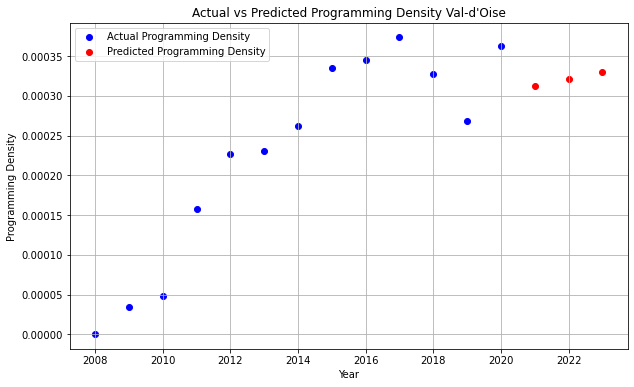

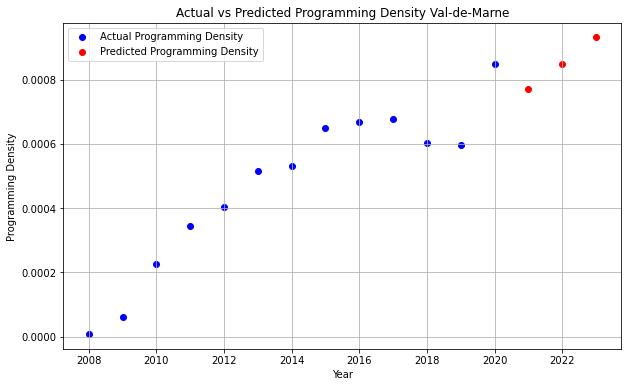

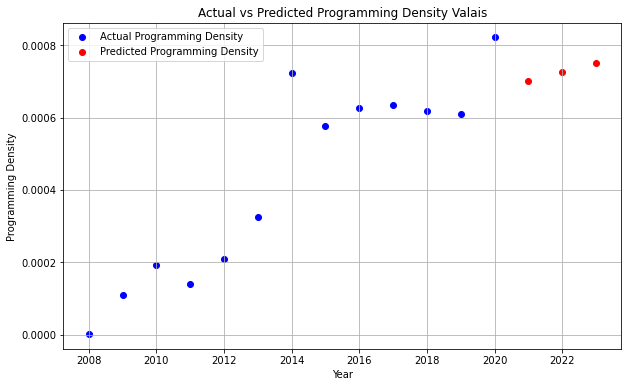

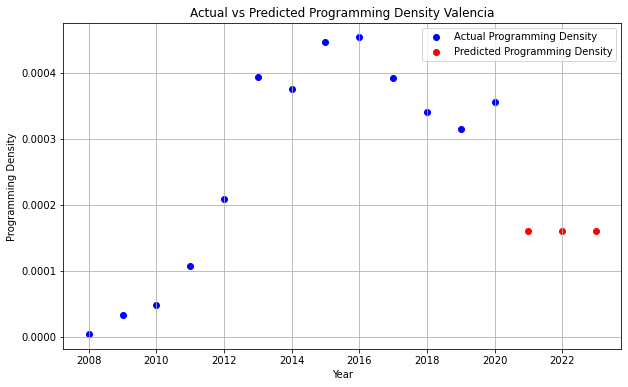

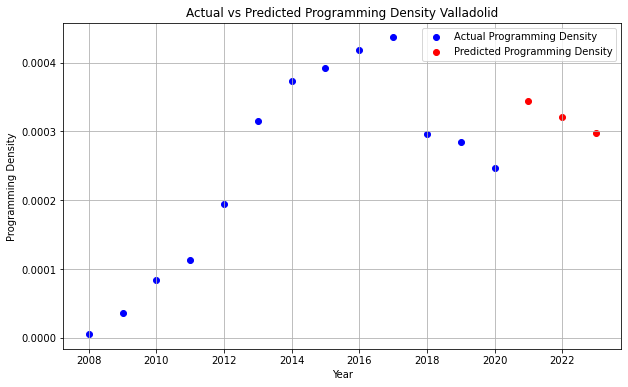

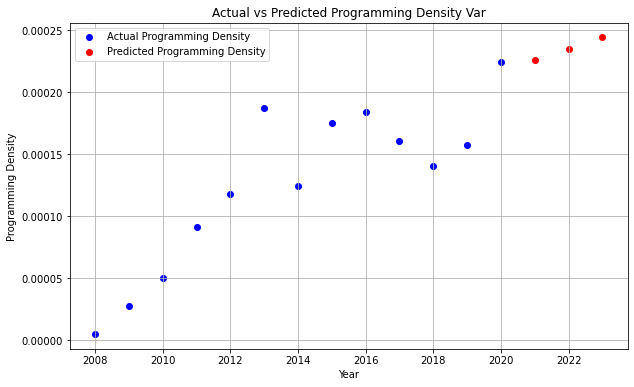

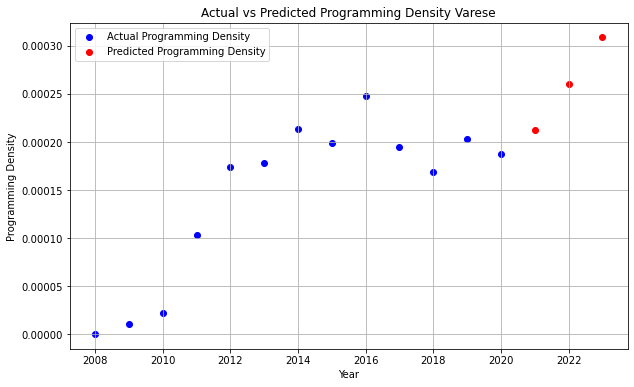

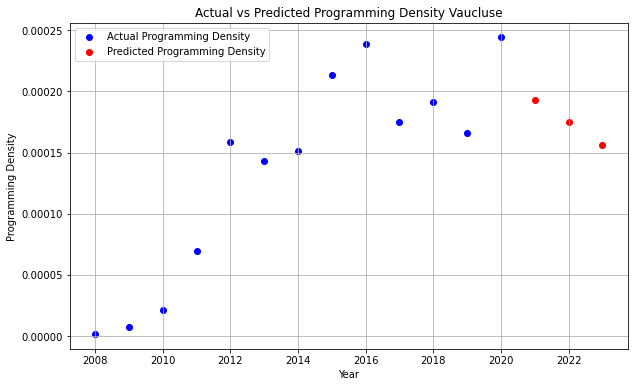

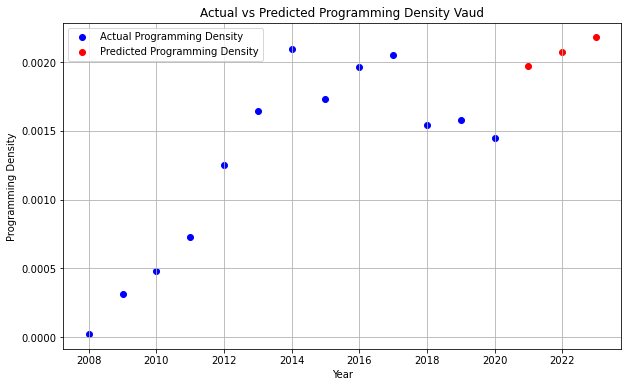

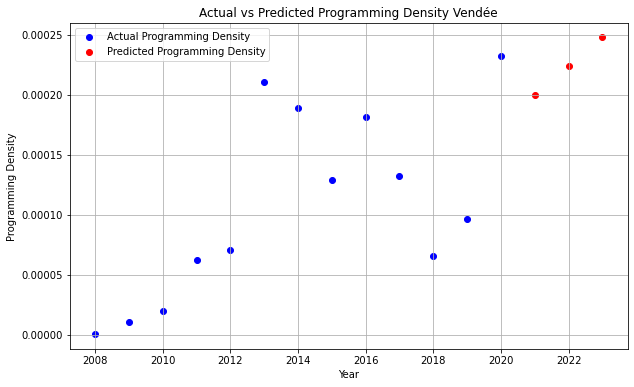

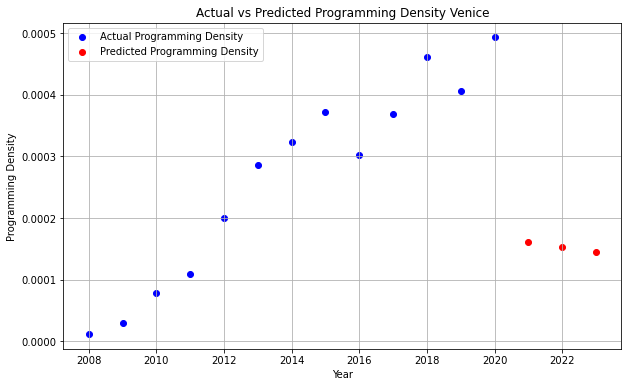

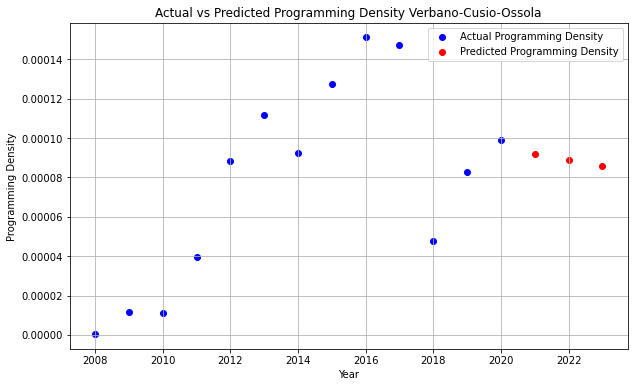

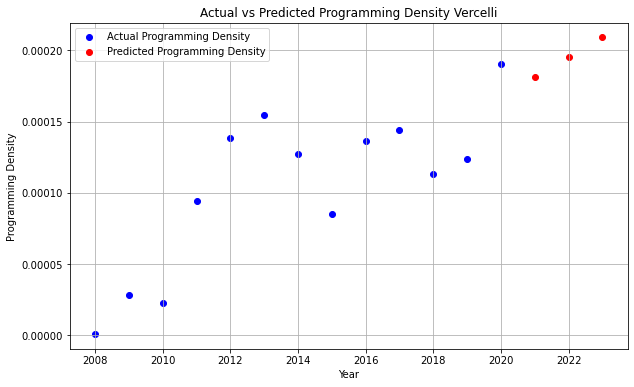

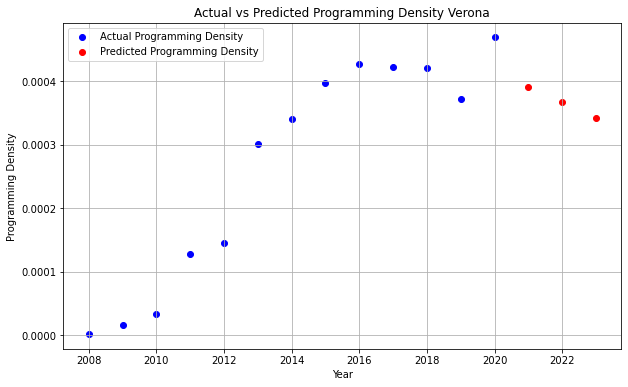

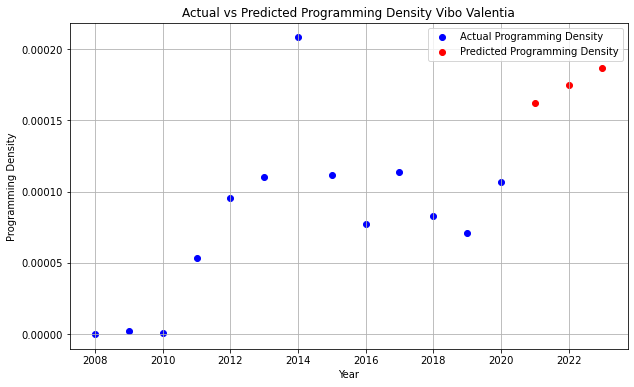

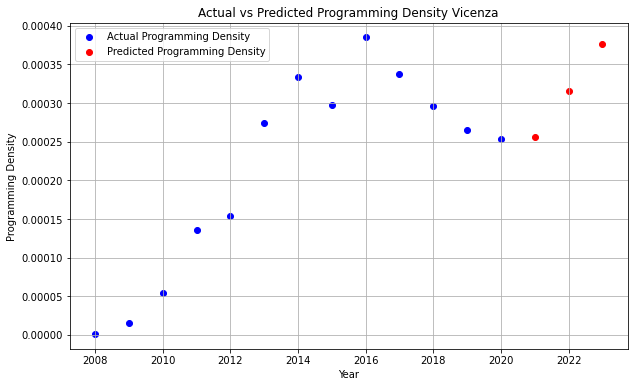

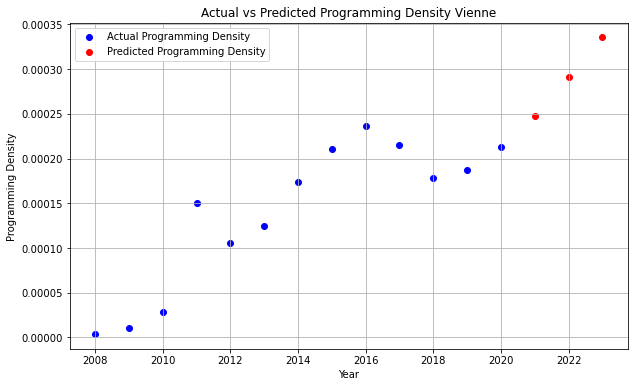

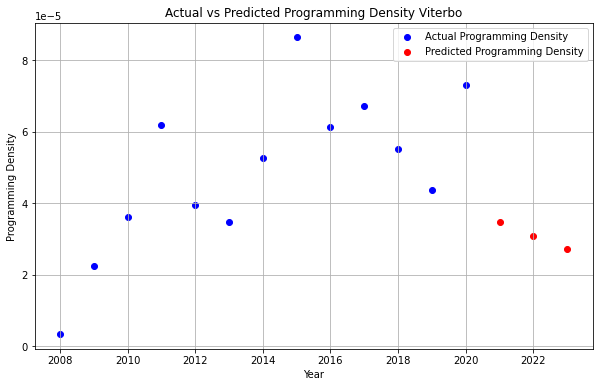

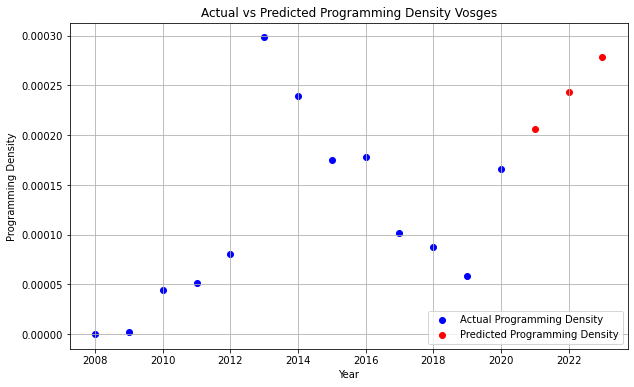

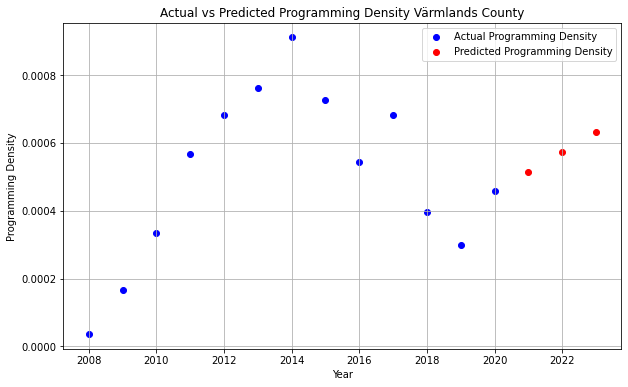

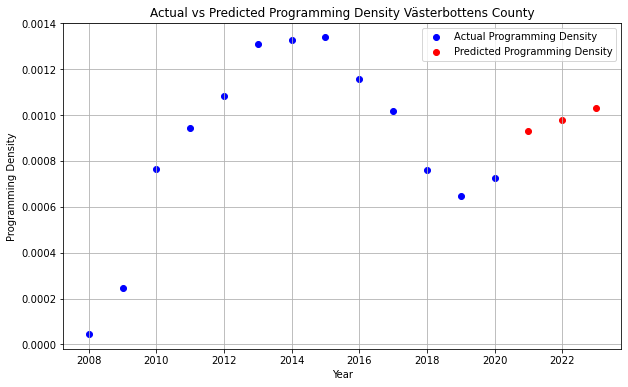

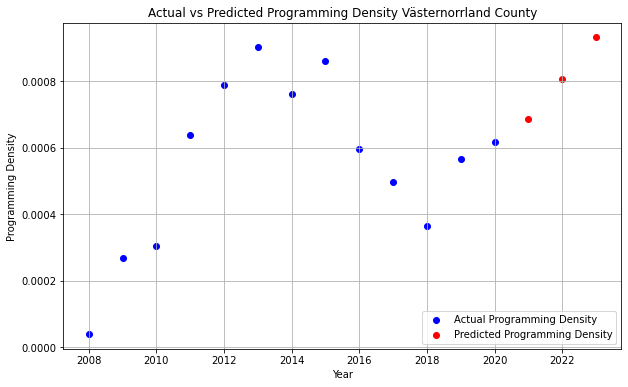

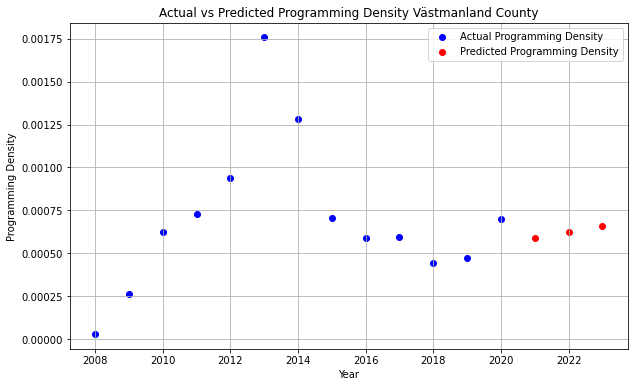

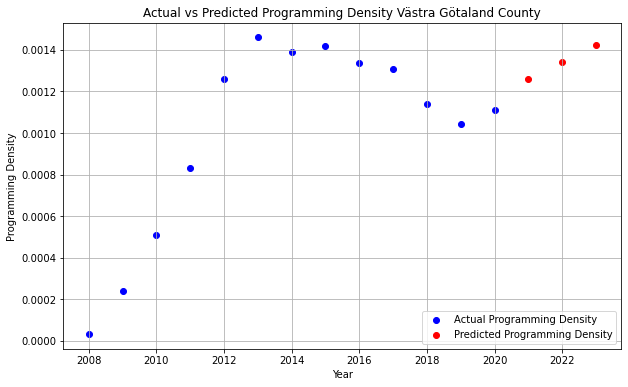

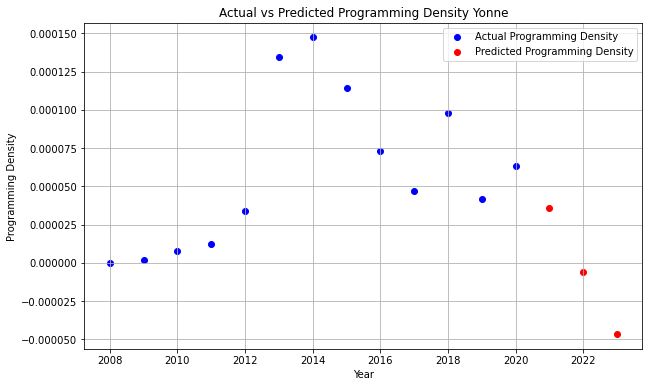

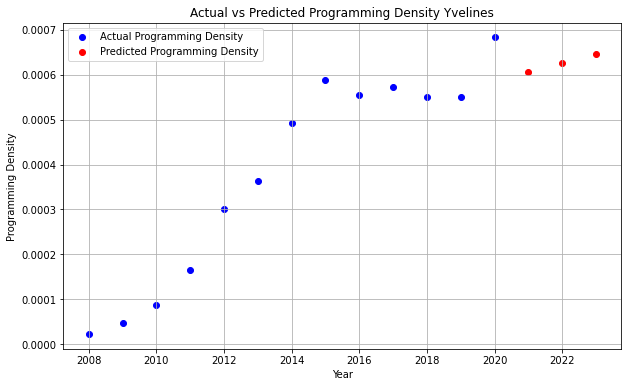

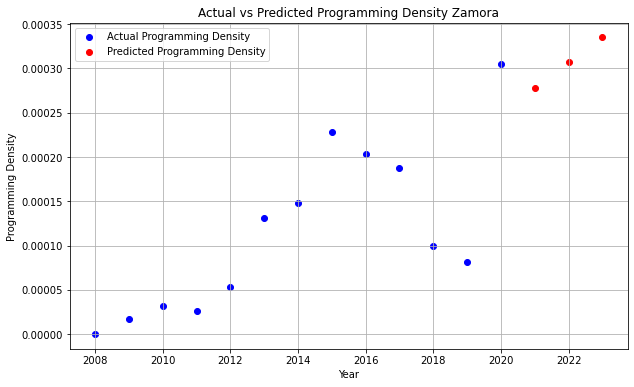

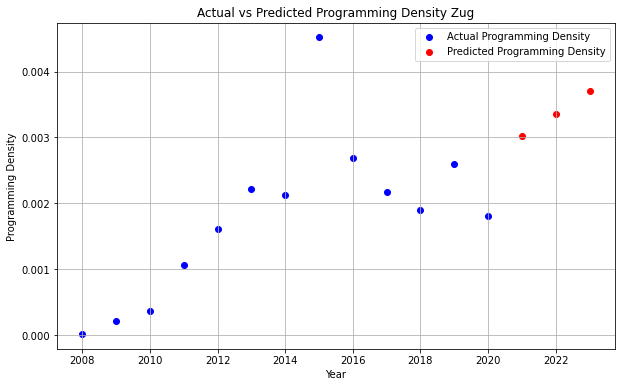

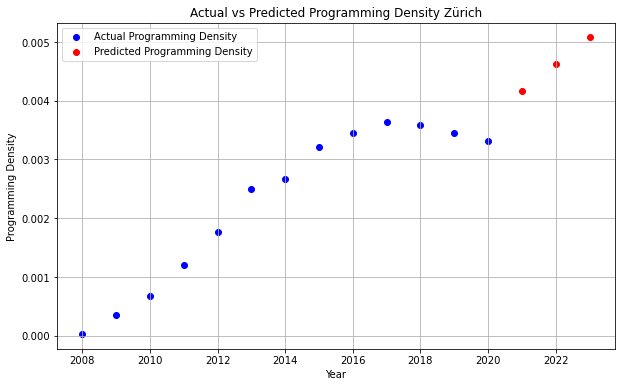

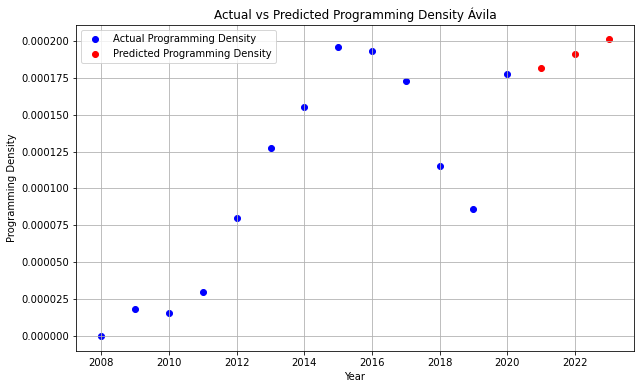

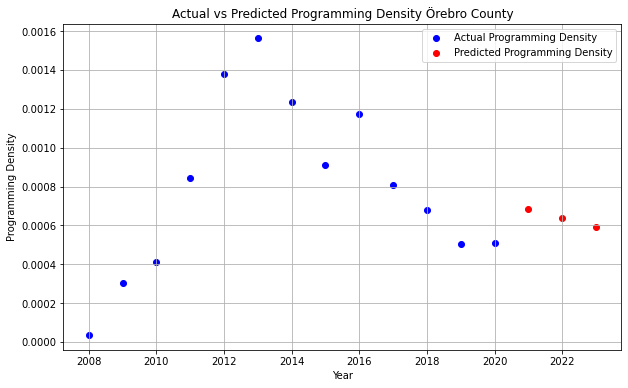

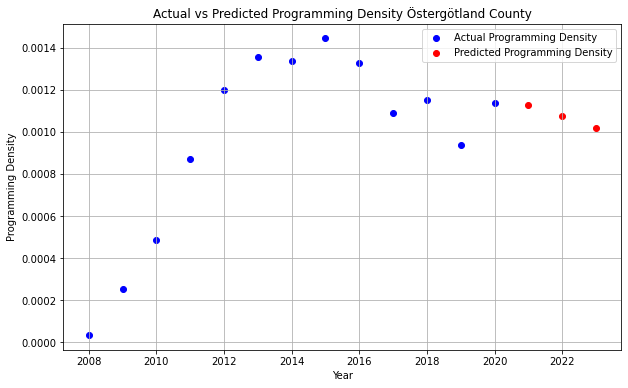

In [16]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import Ridge
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Get unique values from 'nuts3_name' column
unique_nuts3_names = df_cleaned['nuts3_name'].unique()

# Create an empty DataFrame to store predictions
predictions_data = pd.DataFrame(columns=new_data.columns)

# Loop through each unique 'nuts3_name' value
for nuts3_name in unique_nuts3_names:
    # Filter data for the current 'nuts3_name'
    current_data = df_cleaned[df_cleaned["nuts3_name"] == nuts3_name]

    #Create an empty dataframe
    new_data_copy = pd.DataFrame({
                    'GDP_per_capita': [np.nan] * 3,
                    'EMP (THS)': [np.nan] * 3,
                    'GDP (MIO_EUR)': [np.nan] * 3,
                    'POP (THS)': [np.nan] * 3,
                    'nuts3_name': [nuts3_name] * 3,
                    'year': [2021, 2022, 2023]
                })

    for variable in ['GDP_per_capita', 'EMP (THS)','GDP (MIO_EUR)','POP (THS)']:
        current_value = current_data[variable].iloc[-1]  
        for i, row in new_data_copy.iterrows():
            if np.isnan(row[variable]):
                current_value *= (1 + randomized_growth_rates.loc[row['nuts3_name'], variable])
                new_data_copy.at[i, variable] = current_value

    # Sort the DataFrame by year and region
    new_data_copy = new_data_copy.sort_values(by=['year', 'nuts3_name']).reset_index(drop=True)

    # Separate features and target variable
    features = ['GDP_per_capita', 'EMP (THS)','GDP (MIO_EUR)','POP (THS)', 'nuts3_name', 'year']
    target = 'Programming_Density'

    # Create a transformer that does not need to be fit separately
    transformer = ColumnTransformer(
        transformers=[
            ('num', make_pipeline(StandardScaler()), ['GDP_per_capita', 'EMP (THS)','GDP (MIO_EUR)','POP (THS)']),
            ('cat', make_pipeline(OneHotEncoder(sparse=False, handle_unknown='ignore')), ['nuts3_name', 'year'])
        ],
        remainder='passthrough'
    )

    X_train, y_train = transformer.fit_transform(current_data[features]), current_data[target]

    # Create a linear regression model
    ridge_model = Ridge(alpha=1.0)

    # Fit the model to the data
    ridge_model.fit(X_train, y_train)

    # Use the model to make predictions for the new data
    new_data_encoded_scaled = transformer.transform(new_data_copy[features])
    new_predictions = ridge_model.predict(new_data_encoded_scaled)
    new_data_copy['Predicted_Programming_Density'] = new_predictions

    old_data = df_cleaned[df_cleaned["nuts3_name"] == nuts3_name]

    # Plotting
    plt.figure(figsize=(10, 6))

    # Plot the actual programming density from the training data
    plt.scatter(old_data['year'], old_data['Programming_Density'], label='Actual Programming Density', color='blue')

    # Plot the predicted programming density for the next three years
    plt.scatter(new_data_copy['year'], new_data_copy['Predicted_Programming_Density'], label='Predicted Programming Density', color='red')

    # Customize the plot
    plt.title('Actual vs Predicted Programming Density'+ " " + nuts3_name)
    plt.xlabel('Year')
    plt.ylabel('Programming Density')
    plt.legend()
    plt.grid(True)
    plt.show()
